In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Camera Calibration

### 1. Briefly state how you computed the camera matrix and distortion coefficients. 


In this project, we will use the image captured by the camera to mesure the lateral position of the vehicle as a function of the lane as well as mesuring the lane curvatures. Unfortunately, images captured by cameras don't come without distorsions.
The most [common](https://en.wikipedia.org/wiki/Distortion_(optics) distorsion is the radial distorsion: the image sensed tend to be curve lines around the edges (radial distorsion) or distorts angles. 
So, before we can use the camera to measure space, we need to compensate distorsions induced by camera lenses. 

The process of calibrating the camera allows us to build a mathematical model of the optical distorsions.
We can then use this model to correct the distorsions.

First, we will compute the camera calibration matrix and distortion coefficients given a set of chessboard images. 
Then, we will store the camera calibration matrix and distortion coefficients in order to rectify all images recorded.

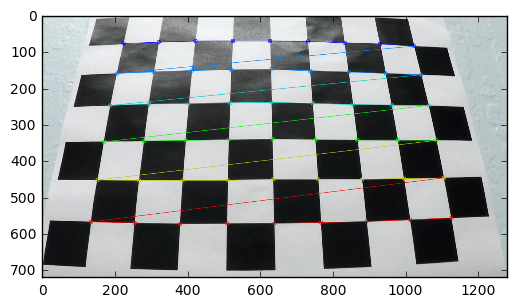

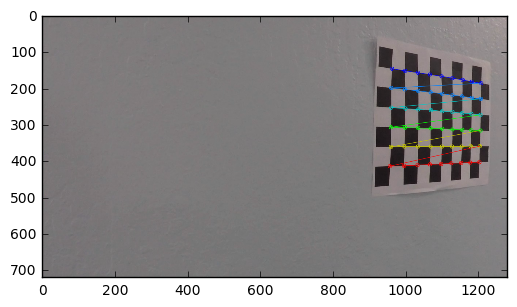

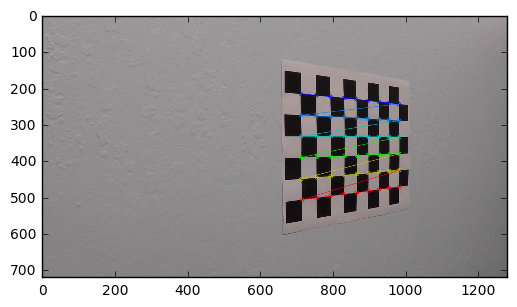

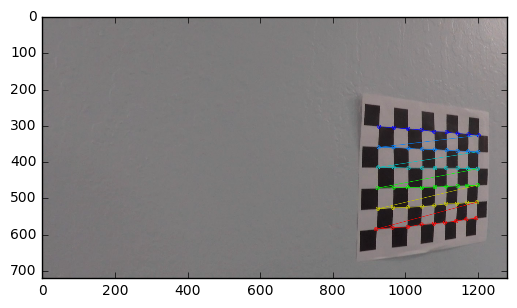

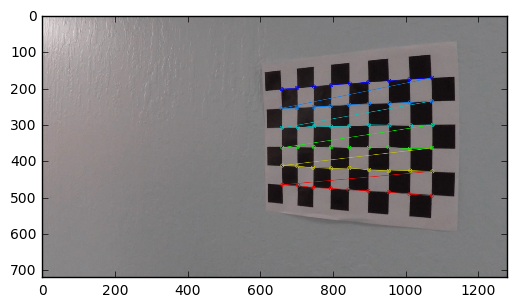

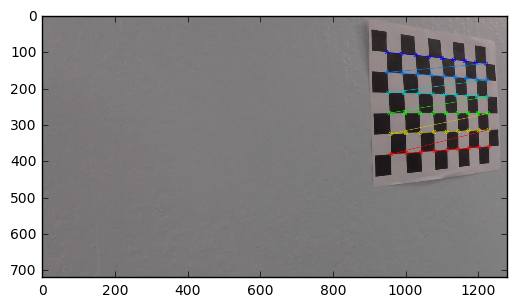

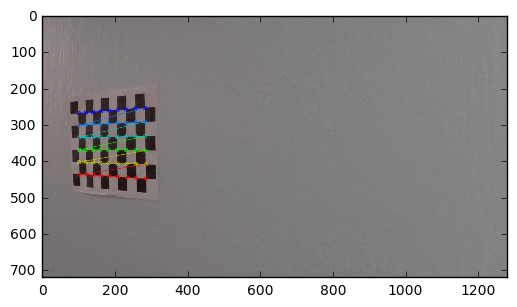

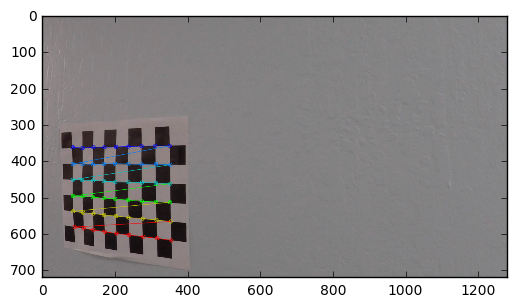

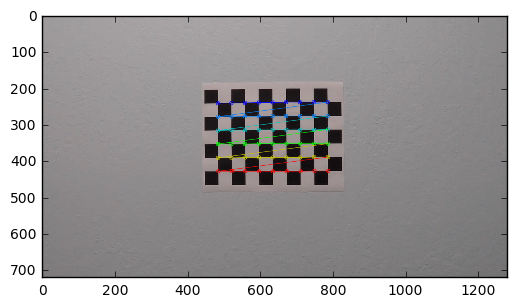

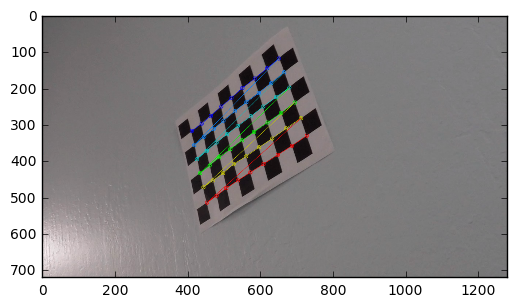

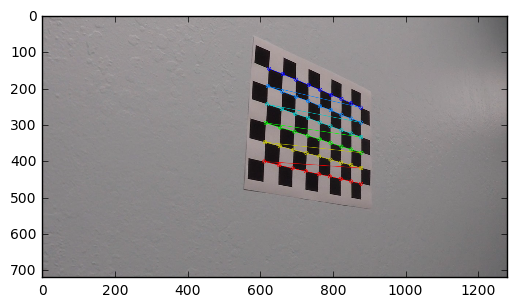

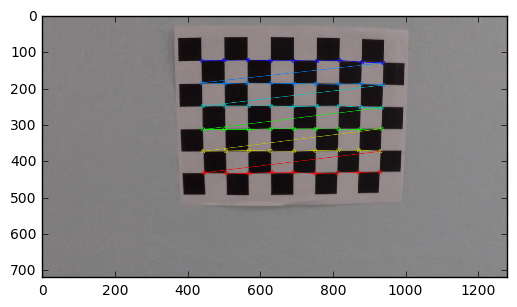

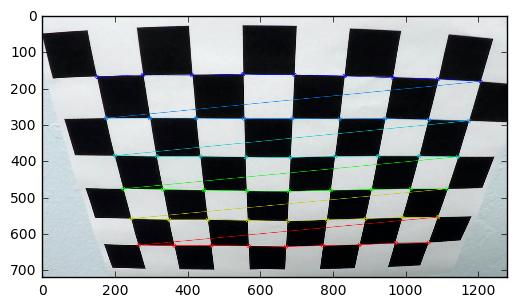

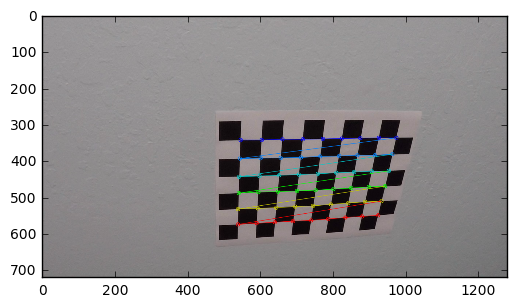

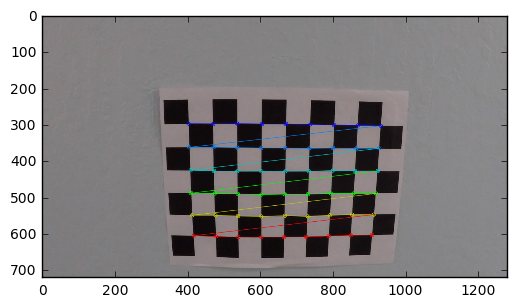

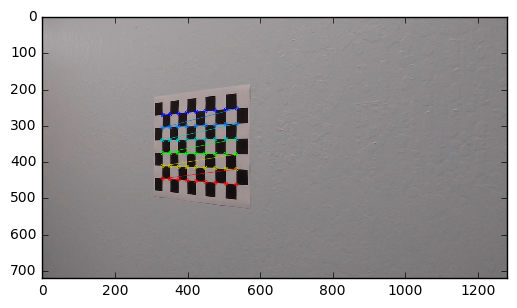

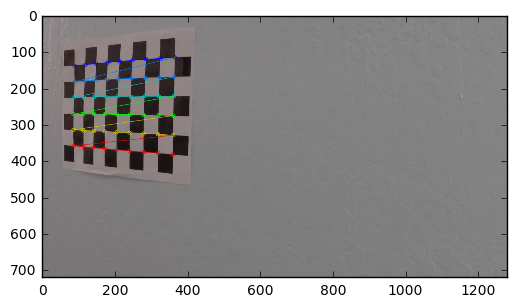

In [2]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        plt.show()
        

ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
def cal_undistort(img, cameraMatrix, distCoeffs):
    # Use cv2.calibrateCamera() and cv2.undistort()
    undist = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix)
    return undist



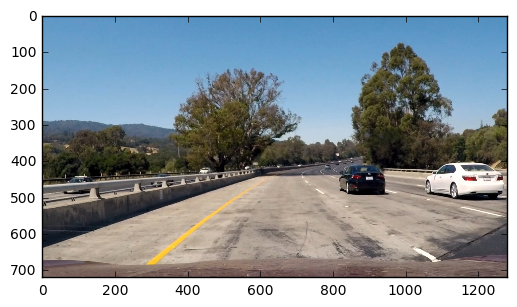

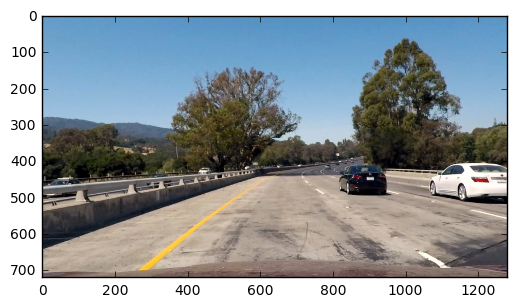

In [3]:
example_image = plt.imread('./test_images/test1.jpg')
plt.imshow(example_image)
plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)
plt.show()

#### 2. Creating a thresholded binary image.

In [4]:
class WidgetCom:
    """ Stores data for handling with interactive widget """
    value = dict()
WidgetCom.value['mutex'] = False
WidgetCom.value['image'] = img_undist
WidgetCom.value['H_chan_min'] = 10
WidgetCom.value['H_chan_max'] = 30
WidgetCom.value['S_chan_min'] = 60
WidgetCom.value['V_chan_min'] = 80
WidgetCom.value['gray_min'] = 190
WidgetCom.value['sobel_angle_min'] = -15.0
WidgetCom.value['sobel_angle_max'] = 15.0
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['clipLimit'] = 2 # CLAHE histogram
WidgetCom.value['tileGridSize'] = 8 # CLAHE histogram
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['image'] = img_undist
# Hmin : 15
# Hmax : 30
# Smin : 60
# Vmin : 80
# gray : 190

In [5]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
# Using widget to help calibrating computer vision parameters
    
def handle_slider_h_chan_min_change(change):
    WidgetCom.value['H_chan_min'] = change.new
    display_image()    
        
def handle_slider_h_chan_max_change(change):
    WidgetCom.value['H_chan_max'] = change.new
    display_image()
    
def handle_slider_s_chan_change(change):
    WidgetCom.value['S_chan_min'] = change.new
    display_image()
    
def handle_slider_v_chan_change(change):
    WidgetCom.value['V_chan_min'] = change.new
    display_image()
    
def handle_slider_gray_min_change(change):
    WidgetCom.value['gray_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_min_change(change):
    WidgetCom.value['sobel_angle_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_max_change(change):
    WidgetCom.value['sobel_angle_max'] = change.new
    display_image()
    
def handle_slider_sobel_mag_change(change):
    WidgetCom.value['sobel_mag'] = change.new
    display_image()
    
def handle_slider_clipLimit_clahe_change(change):
    WidgetCom.value['clipLimit'] = change.new
    display_image()
    
def handle_slider_tileGridSize_clahe_change(change):
    WidgetCom.value['tileGridSize'] = change.new
    display_image()
    
from ipywidgets import widgets
slider_h_min_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_min'], description='H min')
slider_h_max_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_max'], description='H max')
slider_s_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['S_chan_min'], description='S min')
slider_v_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['V_chan_min'], description='V min')
slider_gray_min = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['gray_min'], description='gray')
slider_sobel_angle_min = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_min'], description='sobel angle min')
slider_sobel_angle_max = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_max'], description='sobel angle max')
slider_sobel_mag = widgets.FloatSlider(min=0.1, max=100, value=WidgetCom.value['sobel_mag'], description='sobel mag')
slider_tileGridSize_clahe_mag = widgets.IntSlider(min=8, max=512, value=WidgetCom.value['tileGridSize'], description='tileGridSize')
slider_clipLimit_clahe_mag = widgets.IntSlider(min=1, max=256.0, value=WidgetCom.value['clipLimit'], description='clipLimit')

slider_h_min_chan.observe(handle_slider_h_chan_min_change, names='value')
slider_h_max_chan.observe(handle_slider_h_chan_max_change, names='value')
slider_s_chan.observe(handle_slider_s_chan_change, names='value')
slider_v_chan.observe(handle_slider_v_chan_change, names='value')
slider_gray_min.observe(handle_slider_gray_min_change, names='value')
slider_sobel_angle_min.observe(handle_slider_sobel_angle_min_change, names='value')
slider_sobel_angle_max.observe(handle_slider_sobel_angle_max_change, names='value')
slider_sobel_mag.observe(handle_slider_sobel_mag_change, names='value')
slider_tileGridSize_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')
slider_clipLimit_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')

In [6]:
# Let's get the yellow in the image
def segment_image(img_undist, S_chan_min,V_chan_min, gray_min):
    
    # Let's perform some histogram based brightness compensation
    img_yuv = cv2.cvtColor(img_undist, cv2.COLOR_RGB2YUV)
    gray = img_yuv[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=WidgetCom.value['clipLimit'], 
                            tileGridSize=(WidgetCom.value['tileGridSize'] ,WidgetCom.value['tileGridSize'] ))
    gray_clahe = clahe.apply(gray)
    mask = np.uint8(gray_clahe>gray_min)*255
    
    #plt.imshow(np.hstack((gray,gray_clahe)), cmap='gray')
    #plt.show()
    
    img_yuv[:,:,0] = gray_clahe
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    im_white = cv2.bitwise_and(img,img, mask= mask)
    
    
    # Look for yellow, for color segmentation
    lower_yellow = np.array([WidgetCom.value['H_chan_min'], S_chan_min, V_chan_min], np.uint8)
    upper_yellow = np.array([WidgetCom.value['H_chan_max'], 255, 255], np.uint8)

    # Calculate mask for color segmentation
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    im_yellow = cv2.bitwise_and(img,img, mask= mask)
    
    #im_white = cv2.bitwise_and(im_white,im_white, mask= gray_slice)
    return np.clip(im_white.astype('uint16')//2+ im_yellow.astype('uint16')//2,
                   0,255).astype('uint8')

def sobel_angle_image(img, thresh_min, thresh_max, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mask_mag = np.zeros_like(gradmag).astype('uint8')
    mask_mag[gradmag >= mag_thresh] = 1
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.float32(absgraddir)*180.0/np.pi
    #binary_output =  np.zeros_like(absgraddir).astype('uint8')
    direction_im = np.bitwise_and((absgraddir>thresh_min).astype('uint8'),
                                   (absgraddir<thresh_max).astype('uint8')).astype('uint8')
    
    binary_output = cv2.bitwise_and(direction_im,mask_mag, mask=mask_mag)
    
    #print('thresh_min:',thresh_min,'thresh_max:', thresh_max)
    #print('absgraddir:',np.max(absgraddir),np.min(absgraddir))
    #print('direction_im',np.max(direction_im),np.min(direction_im))
    return binary_output*1.0



# Let's get the yellow in the image


import time
from IPython import display
def compute_image(image):
    S_chan_min = WidgetCom.value['S_chan_min']
    V_chan_min = WidgetCom.value['V_chan_min']
    gray_min =   WidgetCom.value['gray_min']
    thresh_min = WidgetCom.value['sobel_angle_min']
    thresh_max = WidgetCom.value['sobel_angle_max']
    mag_thresh = WidgetCom.value['sobel_mag']
    img = segment_image(image, S_chan_min, V_chan_min, gray_min)
    edge_img = sobel_angle_image(img, thresh_min, thresh_max, mag_thresh)
    return img, edge_img
        
def display_image():
    if WidgetCom.value['mutex'] == False:
        WidgetCom.value['mutex'] = True
        
        img, edge_img = compute_image(WidgetCom.value['image'])

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(1, 3, 1)
        plt.title('Original Image')
        ax.imshow(WidgetCom.value['image'])
        ax = fig.add_subplot(1, 3, 2)
        plt.title('Masked Image')
        ax.imshow(img)
        ax = fig.add_subplot(1, 3, 3)
        ax.imshow(edge_img, cmap='gray')
        plt.title('Edges')
        plt.show()
        plt.close(fig)
        display.clear_output(wait=True)
        WidgetCom.value['mutex'] = False
    
    

In [7]:
# Display interactive sliders
from IPython import display
from ipywidgets import HBox

display.display(HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag]))
display.display(HBox([slider_s_chan, slider_v_chan, slider_gray_min, ]))
display.display(HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag]))

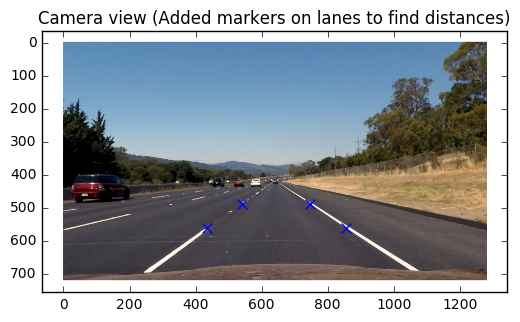


Transformation matrix: 
 [[ -2.97321429e-02  -2.37600446e-01   1.18513214e+02]
 [ -4.00287442e-16   1.11383929e-01  -7.58750000e+01]
 [ -9.53928505e-18  -2.38839286e-03   1.00000000e+00]]

Transformation matrix inverse: 
 [[ -3.36336336e+01  -2.18920452e+01   2.32497110e+03]
 [  5.41371989e-13  -1.43193895e+01  -1.08648368e+03]
 [  9.72168173e-16  -3.42003276e-02  -1.59494986e+00]]


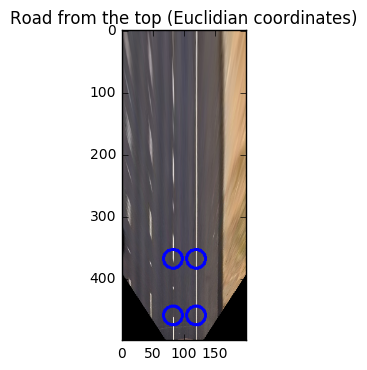

In [8]:
# Find PROJECTIVE transform for the road to find better masking region
# On an highway we could assume for this exercise (not safe in real car, just like masking with a 
# a triangle, that the lines should be fairly parallel to the direction of the vehicle.
# Minimum lane width: Minimum lane width of 12 feet (3.7 m)
# Each dashed line measures 10 feet (3.0 m), and the empty spaces in-between measure 30 feet (9.0m).


example_image = plt.imread('./test_images/straight_lines2.jpg')
#plt.imshow(example_image)
#plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)

image_proj_work = img_undist.copy()
plt.imshow(image_proj_work)
plt.title('Camera view (Added markers on lanes to find distances)')

# Mark known points in image
points_px = np.float32( [ [436, 560], [540, 488],   [856, 560], [746, 488] ] )
plt.scatter(points_px[0][0], points_px[0][1], s=50, c='blue', marker='x')
plt.scatter(points_px[1][0], points_px[1][1], s=50, c='blue', marker='x')
plt.scatter(points_px[2][0], points_px[2][1], s=50, c='blue', marker='x')
plt.scatter(points_px[3][0], points_px[3][1], s=50, c='blue', marker='x')
plt.show()

# Points in meters
pt_distance_to_car = 4.0
dash_line_len = 9.0
lane_width = 3.7
center_of_car = 10
points_dest_px = np.float32( [ [center_of_car-lane_width/2, pt_distance_to_car],
                        [center_of_car-lane_width/2, pt_distance_to_car+dash_line_len],
                        [center_of_car+lane_width/2, pt_distance_to_car],
                        [center_of_car+lane_width/2, pt_distance_to_car+dash_line_len] ] )
meters_to_px = 10.0
points_m = meters_to_px * points_dest_px

transfM = cv2.getPerspectiveTransform(points_px,points_m)
print('\nTransformation matrix: \n', transfM)

transfMInv = np.linalg.inv(transfM)
print('\nTransformation matrix inverse: \n', transfMInv)

wrappedIm = cv2.warpPerspective(image_proj_work, transfM, (center_of_car*2*int(meters_to_px),500))


plt.imshow(wrappedIm)
plt.title('Road from the top (Euclidian coordinates)')

#cv2.imwrite('foo.png',wrappedIm)
radius = 15
color_circle = (0,0,255)
thickness = 4
wrappedIm_copy = wrappedIm.copy()

for line in range(points_px.shape[0]):
    points_dest_px2 = np.matmul(transfM, np.concatenate((points_px[line],[1]), axis=0)[np.newaxis].T)
    points_dest_px2 = points_dest_px2/points_dest_px2[2]
    wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)

wrappedIm = cv2.flip(wrappedIm,0) #Vertical flip

plt.imshow(wrappedIm)
plt.show()


In [9]:
# Saving calibration data in "static" object for kater global access
class CameraCalibration:
    """
    Saving calibration data in "static" object for kater global access.
    Description of the dictionary field 'value' 
        cameraMatrix: camera matrix
        distCoeffs : camera distorsion coefficients
        transfM : transformation matrix (from pixels to 0.1 meters on the road), use on undistorted image
        transfMInv : transformation matrix inverse (from pixels to 0.1 meters on the road)
        center_of_car : Lateral position of car in the lane
    """
    value = dict()
    def undistort(img):
        """
        Undistort image using the cameraMatrix and the distorsion coefficients
        """
        undist = cv2.undistort(img, CameraCalibration.value['cameraMatrix'], 
                               CameraCalibration.value['distCoeffs'], None,
                               CameraCalibration.value['cameraMatrix'])
        return undist
    def birdview(img):
        """
        Apply wrap perspective transform to undistorted image
        """
        wrappedIm = cv2.warpPerspective(img, CameraCalibration.value['transfM'], 
                                        (CameraCalibration.value['center_of_car'] * 
                                         2*int(CameraCalibration.value['meters_to_px']),500))
        return wrappedIm

# Initialize camera calibration parameter (see parameter definitions above)
CameraCalibration.value['cameraMatrix'] = cameraMatrix
CameraCalibration.value['distCoeffs'] = distCoeffs
CameraCalibration.value['transfM'] = transfM
CameraCalibration.value['transfMInv'] = transfMInv
CameraCalibration.value['center_of_car'] = center_of_car 
CameraCalibration.value['meters_to_px'] = meters_to_px 


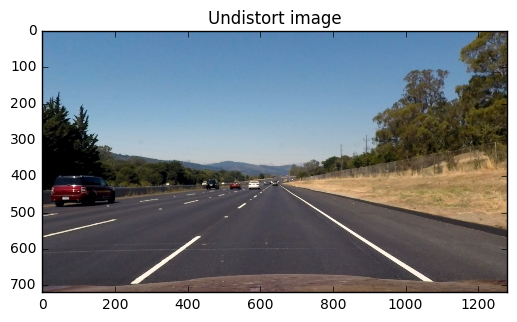

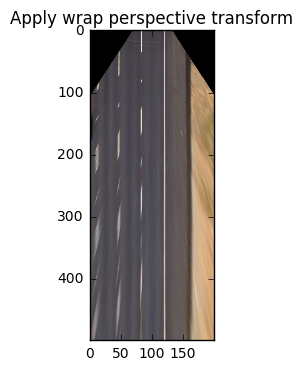

In [10]:
# Testing undistort function
plt.imshow(CameraCalibration.undistort(example_image))
plt.title('Undistort image')
plt.show()
plt.imshow(CameraCalibration.birdview(CameraCalibration.undistort(example_image)))
plt.title('Apply wrap perspective transform')
plt.show()

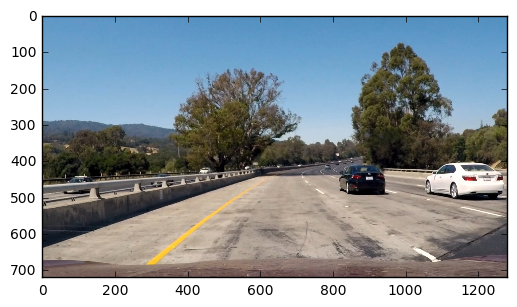

In [11]:
example_image = plt.imread('./test_images/test1.jpg')
#example_image = plt.imread('./test_images/test2.jpg')
#example_image = plt.imread('./test_images/straight_lines2.jpg')
plt.imshow(example_image)
plt.show()

In [12]:
example_image = plt.imread('./test_images/test4.jpg')

from ipywidgets import HBox
WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(example_image))
boxColor = HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag])
boxSV = HBox([slider_s_chan, slider_v_chan,slider_gray_min])
boxSobel = HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag])

display.display(boxColor,boxSV, boxSobel)


# Experimenting with histogram
# Hmin : 17
# Hmax : 27
# Smin : 88
# Vmin : 1
# gray : 235
# tileGridSize: 8
# clipLimit : 2
# sobel mag : 40


./test_images/straight_lines2.jpg


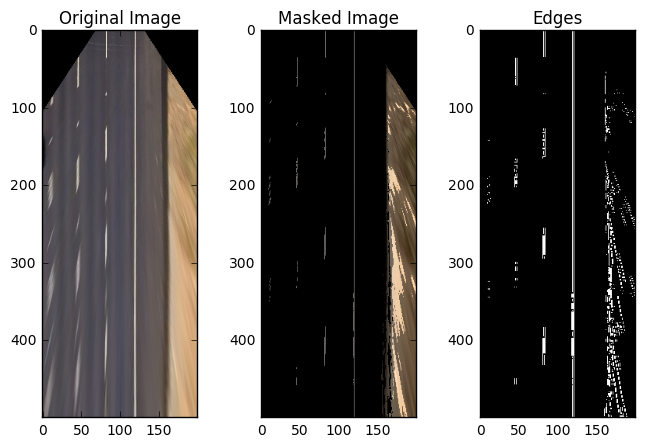

./test_images/test1.jpg


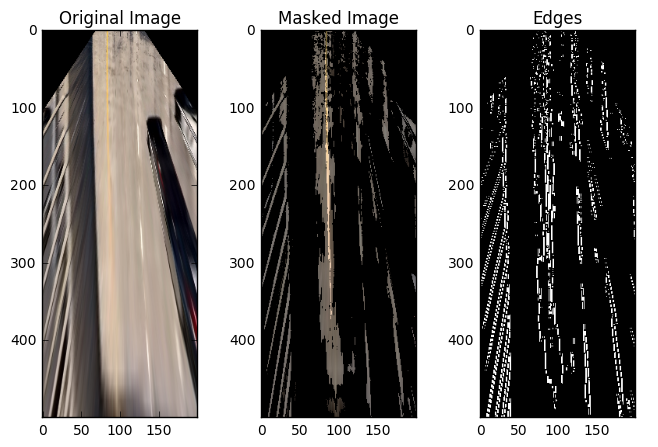

./test_images/test6.jpg


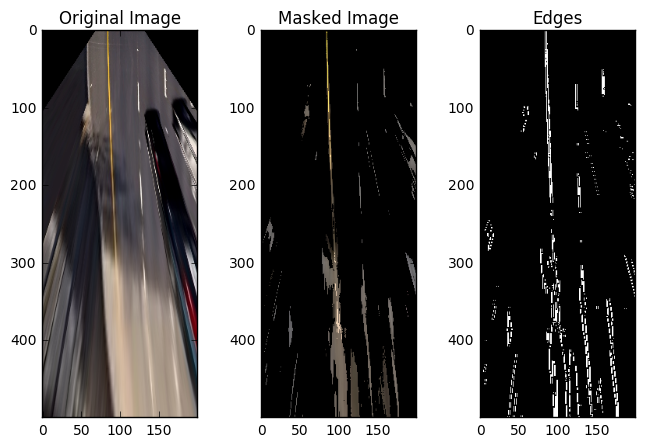

./test_images/test3.jpg


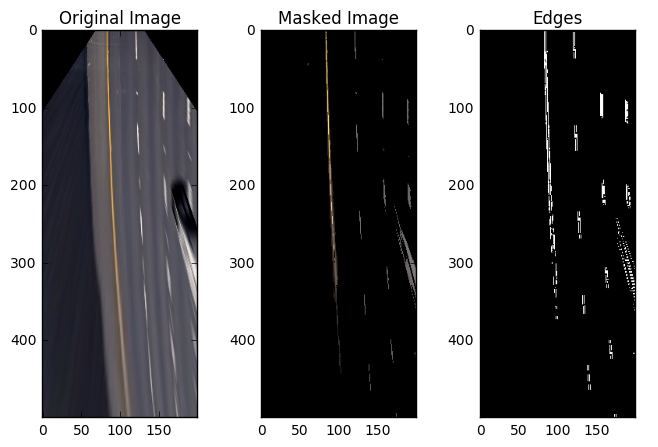

./test_images/test2.jpg


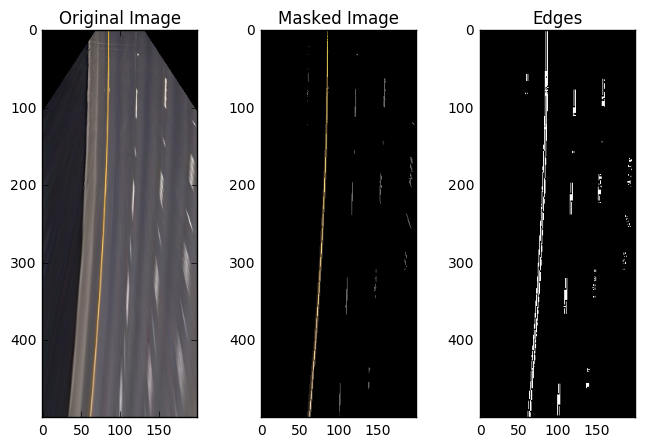

./test_images/test5.jpg


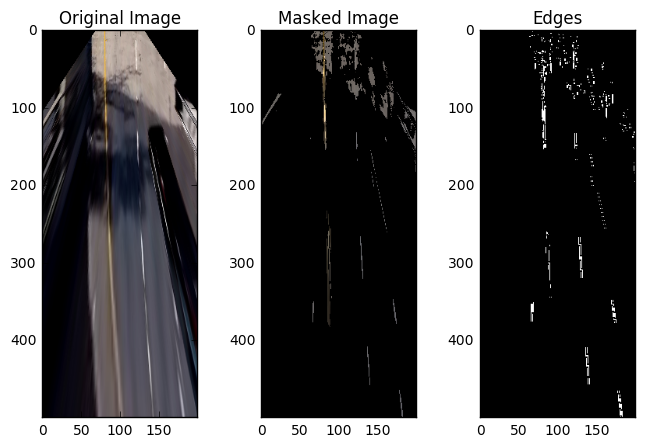

./test_images/test4.jpg


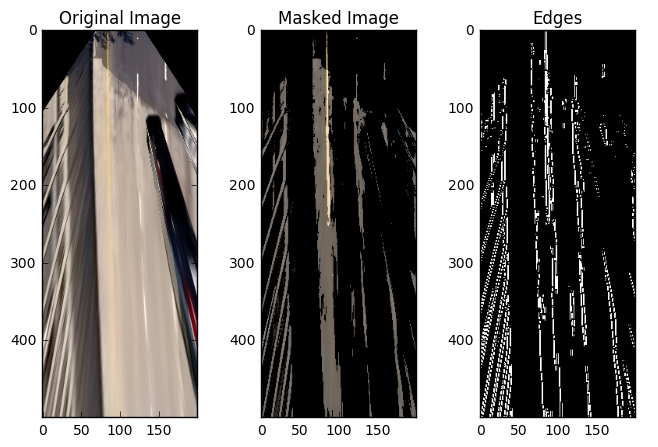

./test_images/straight_lines1.jpg


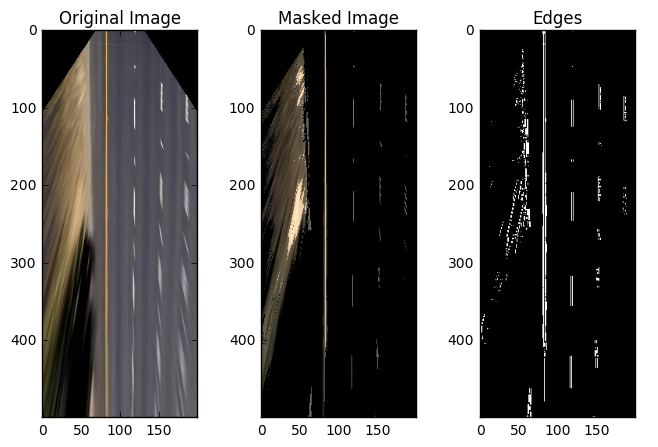

In [13]:
## Display all test images
list_images = glob.glob('./test_images/*.jpg')

for image_file in list_images:
    print(image_file)
    image = plt.imread(image_file)
    WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(image))

    img, edge_img = compute_image(WidgetCom.value['image'])

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 3, 1)
    plt.title('Original Image')
    ax.imshow(WidgetCom.value['image'])
    ax = fig.add_subplot(1, 3, 2)
    plt.title('Masked Image')
    ax.imshow(img)
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(edge_img, cmap='gray')
    plt.title('Edges')
    plt.show()
    plt.close(fig)

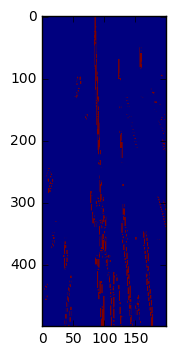

Image shape: (500, 200)


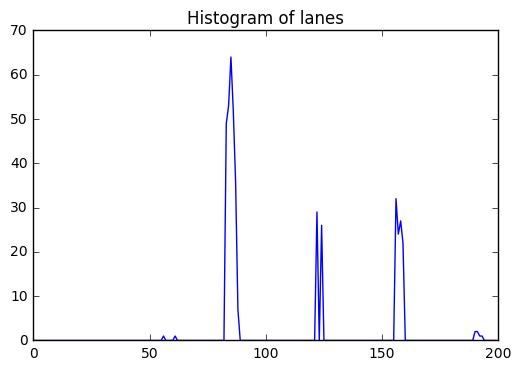

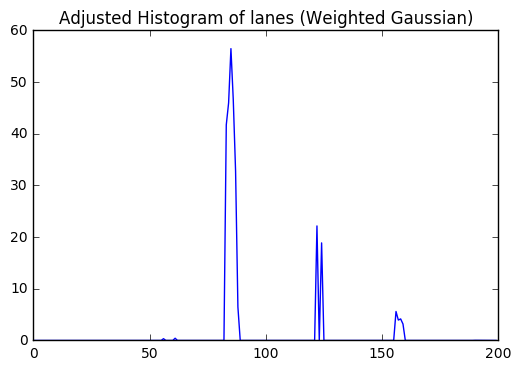

Left lane position : 85
Right lane position : 122


In [14]:


image = plt.imread('./test_images/test6.jpg')
birdview_img = CameraCalibration.birdview(CameraCalibration.undistort(image))
img, edge_img = compute_image(birdview_img)

def find_lanes_peaks(edge_img,debug=False):
    binary_warped = edge_img.astype('uint8')
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    histogram = np.sum(binary_warped[:binary_warped.shape[1]//2,:], axis=0)

    
    if debug:
        plt.imshow(binary_warped)
        plt.show()
        print('Image shape:',binary_warped.shape)
        plt.plot(histogram)
        plt.title('Histogram of lanes')
        plt.show()
        
    x = np.arange(histogram.shape[0])

    def gaussian(x, mu, sig):
        return np.exp(-np.square(x - mu) / (2 * np.square(sig)))

    histogram_gauss = histogram*(gaussian(x,histogram.shape[0]/2,30))

    if debug:
        plt.plot(x,histogram_gauss)
        plt.title('Adjusted Histogram of lanes (Weighted Gaussian)')
        plt.show()

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram_gauss.shape[0]/2)
    leftx_base = np.argmax(histogram_gauss[:midpoint])
    rightx_base = np.argmax(histogram_gauss[midpoint:]) + midpoint
    if debug:
        print('Left lane position :',leftx_base)
        print('Right lane position :',rightx_base)
    
    return binary_warped, leftx_base, rightx_base, histogram_gauss

binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=True)

[  8.47359575e-05  -5.09407544e-03   8.55177234e+01]
[ -1.95540063e-04   1.17171942e-01   1.14704817e+02]
[  8.47359575e-05  -5.09407544e-03   8.55177234e+01]
[ -1.95540063e-04   1.17171942e-01   1.14704817e+02]


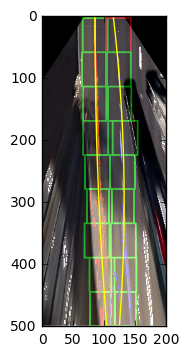

In [75]:

def lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss, debug=True):
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 20
    # Set minimum number of pixels found to recenter window
    minpix = 10
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Window color
    found_lane_color =  (0,255,0)
    no_lane_color =  (255,0,0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Step through the windows one by one
    for window in range(nwindows, -1, -1):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)


        left_window_color =  right_window_color = no_lane_color
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            left_window_color = found_lane_color
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            right_window_color = found_lane_color
            
        """if len(good_left_inds) > minpix and not len(good_right_inds) > minpix:
            # Draw circles
            radius = 15
            color_circle = (0,0,255)
            thickness = 4
            wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)"""
            
        # Draw the windows on the visualization image
        out_img = cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),left_window_color, 2) 
        out_img = cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),right_window_color, 2) 

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if debug:
        print(left_fit)
        print(right_fit)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    out_img = cv2.addWeighted(out_img,0.5,birdview_img,0.9,0)

    
    return left_fit, right_fit, out_img



def generate_plot_points(binary_warped, left_fit, right_fit):
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return ploty, left_fitx, right_fitx

left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss)
ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
print(left_fit)
print(right_fit)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, binary_warped.shape[1] )
plt.ylim(binary_warped.shape[0], 0)
plt.show()

In [77]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def poly_envelope_lane_search(binary_warped, left_fit, right_fit):
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    margin = 20
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    return left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds

left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds = poly_envelope_lane_search(binary_warped, left_fit, right_fit)

In [78]:
# Create an image to draw on and an image to show the selection window
def draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, debug=False):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty,rightx] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin = 20
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    if debug:
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, binary_warped.shape[1] )
        plt.ylim(binary_warped.shape[0], 0)


draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)

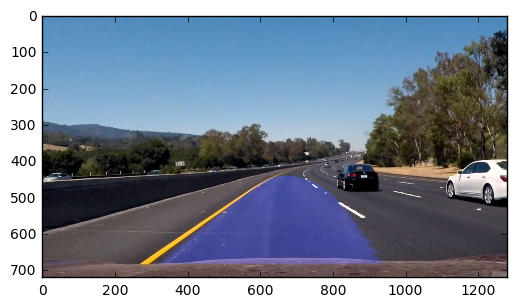

In [79]:
def add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))*0
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    overlay_color = (0,30, 255)
    color_warp = cv2.fillPoly(color_warp, np.int_([pts]), overlay_color)
    #plt.imshow(color_warp)
    #plt.show()

    # Warp the blank back to original image space using inverse perspective matrix
    newwarp = cv2.warpPerspective(color_warp, CameraCalibration.value['transfMInv'], (image.shape[1], image.shape[0])) 
    
    # Combine the result with the original image
    image = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return image
    
result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)

plt.imshow(result)
plt.show()

In [85]:
class Filter:
    """
    
    This class is a static class. 
    Just one instance of the parameters is needed.
    """
    value = dict()
    
    def apply_coef(left_fit, right_fit):
        Filter.value['left_fit_list'].append(left_fit)
        Filter.value['right_fit_list'].append(right_fit)
        coeffs = Filter.value['coeffs_stable'] if Filter.is_stable() else Filter.value['coeffs_unstable']
        #print('In = :', left_fit)
        if len(Filter.value['left_fit_list'])>len(coeffs):
            del Filter.value['left_fit_list'][0]
            del Filter.value['right_fit_list'][0]
            left_fit = np.zeros(3)
            right_fit = np.zeros(3)
            for lfit, rfit, coeff in zip(Filter.value['left_fit_list'], Filter.value['right_fit_list'], coeffs):
                left_fit  = left_fit + lfit*coeff
                right_fit = right_fit + rfit*coeff
        
        #print('Out = :', left_fit)
        return left_fit, right_fit
    
    def save_fit(left_fit, right_fit):
        Filter.value['left_fit_list'][-1] = left_fit
        Filter.value['right_fit_list'][-1] = right_fit  
    
    def radius(left_fit, right_fit):
        y_eval = 40 # Evaluate curvature at 20 meters
        left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
        right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
        left_curverad = left_curverad/CameraCalibration.value['meters_to_px']
        right_curverad = right_curverad/CameraCalibration.value['meters_to_px']
        return left_curverad, right_curverad
    
    def save_radius(left_curverad, right_curverad):
        Filter.value['left_radius'].append(left_curverad)
        Filter.value['right_radius'].append(right_curverad)
        
        if len(Filter.value['left_radius'])>len(Filter.value['coeffs_stable']):
            del Filter.value['left_radius'][0]
            del Filter.value['right_radius'][0]
    
    def is_stable():
        stable = False
        if len(Filter.value['left_radius'])>=2 and len(Filter.value['left_fit_list'])>=2:
            difference = Filter.value['left_radius'][-1] - Filter.value['left_radius'][-2]
            relative_diff = difference/(Filter.value['left_radius'][-1] + 0.1)
            stable = True if relative_diff<0.05 else False
        return stable
    
    def are_lanes_parallel(left_curverad, right_curverad):
        difference = left_curverad-right_curverad
        relative_diff = difference/(left_curverad + 0.1)
        parallel = True if relative_diff<0.35 else False
        
        return parallel
            
Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['left_radius'] = list()
Filter.value['right_radius'] = list()
Filter.value['coeffs_stable'] = [0.3,0.4, 0.3]
Filter.value['coeffs_unstable'] = [0.6,0.35, 0.05]

# Define callback for processing image
def process_image(image):
    image = CameraCalibration.undistort(image)
    birdview_img = CameraCalibration.birdview(image)
    img, edge_img = compute_image(birdview_img)
    binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=False)
    
    lateral_center = (rightx_base+leftx_base)/2
    vehicle_center = binary_warped.shape[1]//2
    vehicle_later_position =  (vehicle_center - lateral_center)/CameraCalibration.value['meters_to_px']
    
    try:
        if len(Filter.value['left_radius'])>1 and Filter.are_lanes_parallel(Filter.value['left_radius'][-1], 
                                     Filter.value['right_radius'][-1]) and len(Filter.value['left_fit_list'])>1:
            left_fit =  Filter.value['left_fit_list'][-1]
            right_fit = Filter.value['right_fit_list'][-1]
            
            print('Can use curve mask')
            #left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
            left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds  = poly_envelope_lane_search(binary_warped, left_fit, right_fit)
            print('print(left_lane_inds.shape[0])', left_lane_inds.shape[0])
            print('print(right_lane_inds.shape[0])', right_lane_inds.shape[0])
            if left_lane_inds.shape[0]<1900 or right_lane_inds.shape[0]<1900:
                print('Using sliding window')
                left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
        else:
            print('Using sliding window')
            left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
        
    except Exception as err:
        if len(Filter.value['left_fit_list'])>0:
            left_fit =  Filter.value['left_fit_list'][-1]
            right_fit = Filter.value['right_fit_list'][-1]
        else:
            print('Exception called :' + str(err))
            return image
        
    left_fit, right_fit = Filter.apply_coef(left_fit, right_fit)
    Filter.save_fit(left_fit, right_fit)
        
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    
    #draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)
    result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)
    left_curverad, right_curverad = Filter.radius(left_fit, right_fit)
    Filter.save_radius(left_curverad, right_curverad)
    
    left_curverad_str = 'straight' if left_curverad>3000 else '{:6.0f}'.format(left_curverad)
    right_curverad_str = 'straight' if right_curverad>3000 else '{:6.0f}'.format(right_curverad) 
            
    cv2.putText(result,'left curve radius  : {} m'.format(left_curverad_str),
                (10,50), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'right curve radius : {} m'.format(right_curverad_str) ,
                (10,90), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'stable : {} '.format(Filter.is_stable()) ,
                (10,130), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'parallel lanes : {} '.format(Filter.are_lanes_parallel(left_curverad, right_curverad)) ,
                (10,170), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'lateral position : {} m'.format(vehicle_later_position) ,
                (10,200), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    
    return result


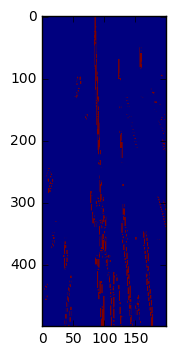

Using sliding window


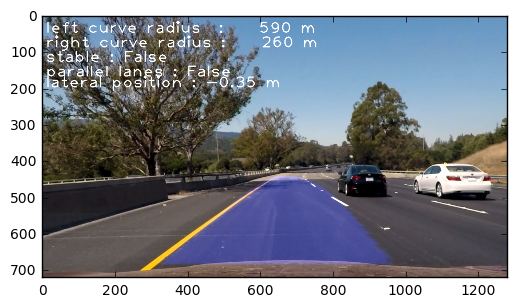

In [86]:

image = plt.imread('./test_images/test6.jpg')
plt.clf()
plt.imshow((binary_warped))
plt.show()
result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

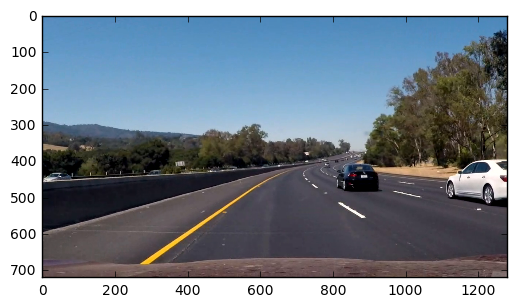

Using sliding window


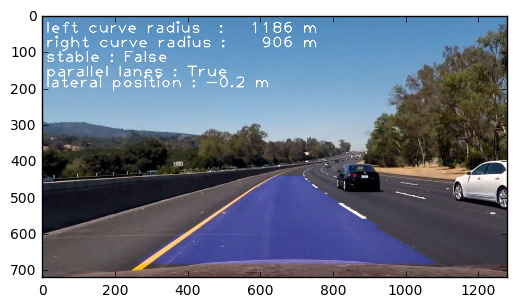

In [87]:
# Extract difficult image from extra challenge
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(43)
plt.clf()
plt.imshow(image)
plt.show()

result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

In [88]:
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
video_output = './output_images/project_video.mp4'

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['coeffs_stable'] = [0.5, 0.3, 0.2]
Filter.value['coeffs_unstable'] = [0.6, 0.35, 0.05]
white_clip = clip1.fl_image(process_image)

%time white_clip.write_videofile(video_output, audio=False)

Using sliding window
[MoviePy] >>>> Building video ./output_images/project_video.mp4
[MoviePy] Writing video ./output_images/project_video.mp4






  0%|          | 0/1261 [00:00<?, ?it/s]



  0%|          | 2/1261 [00:00<01:14, 16.86it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 2046
print(right_lane_inds.shape[0]) 2046
Can use curve mask
print(left_lane_inds.shape[0]) 2120
print(right_lane_inds.shape[0]) 2120






  0%|          | 4/1261 [00:00<01:15, 16.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1993
print(right_lane_inds.shape[0]) 1993






  0%|          | 6/1261 [00:00<01:12, 17.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1937
print(right_lane_inds.shape[0]) 1937
Can use curve mask
print(left_lane_inds.shape[0]) 1857
print(right_lane_inds.shape[0]) 1857
Can use curve mask
print(left_lane_inds.shape[0]) 1816
print(right_lane_inds.shape[0]) 1816






  1%|          | 8/1261 [00:00<01:14, 16.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1888
print(right_lane_inds.shape[0]) 1888






  1%|          | 10/1261 [00:00<01:11, 17.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2004
print(right_lane_inds.shape[0]) 2004
Can use curve mask
print(left_lane_inds.shape[0]) 2037
print(right_lane_inds.shape[0]) 2037
Can use curve mask
print(left_lane_inds.shape[0]) 2046
print(right_lane_inds.shape[0]) 2046






  1%|          | 12/1261 [00:00<01:08, 18.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2242
print(right_lane_inds.shape[0]) 2242






  1%|          | 14/1261 [00:00<01:10, 17.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2062
print(right_lane_inds.shape[0]) 2062
Can use curve mask
print(left_lane_inds.shape[0]) 1872
print(right_lane_inds.shape[0]) 1872
Can use curve mask
print(left_lane_inds.shape[0]) 1928
print(right_lane_inds.shape[0]) 1928






  1%|▏         | 16/1261 [00:00<01:11, 17.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1824
print(right_lane_inds.shape[0]) 1824






  1%|▏         | 18/1261 [00:01<01:14, 16.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1809
print(right_lane_inds.shape[0]) 1809
Can use curve mask
print(left_lane_inds.shape[0]) 1759
print(right_lane_inds.shape[0]) 1759
Can use curve mask






  2%|▏         | 20/1261 [00:01<01:14, 16.65it/s]

print(left_lane_inds.shape[0]) 1777
print(right_lane_inds.shape[0]) 1777
Can use curve mask
print(left_lane_inds.shape[0]) 1790
print(right_lane_inds.shape[0]) 1790


Can use curve mask
print(left_lane_inds.shape[0]) 1905
print(right_lane_inds.shape[0]) 1905
Can use curve mask
print(left_lane_inds.shape[0]) 2056
print(right_lane_inds.shape[0]) 2056






  2%|▏         | 22/1261 [00:01<01:17, 15.97it/s]



  2%|▏         | 24/1261 [00:01<01:16, 16.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2163
print(right_lane_inds.shape[0]) 2163
Can use curve mask
print(left_lane_inds.shape[0]) 2068
print(right_lane_inds.shape[0]) 2068


Can use curve mask
print(left_lane_inds.shape[0]) 2052
print(right_lane_inds.shape[0]) 2052
Can use curve mask
print(left_lane_inds.shape[0]) 2043
print(right_lane_inds.shape[0]) 2043
Can use curve mask
print(left_lane_inds.shape[0]) 2028
print(right_lane_inds.shape[0]) 2028






  2%|▏         | 27/1261 [00:01<01:11, 17.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2100
print(right_lane_inds.shape[0]) 2100






  2%|▏         | 29/1261 [00:01<01:19, 15.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2051
print(right_lane_inds.shape[0]) 2051
Can use curve mask
print(left_lane_inds.shape[0]) 1953
print(right_lane_inds.shape[0]) 1953
Can use curve mask
print(left_lane_inds.shape[0]) 1925
print(right_lane_inds.shape[0]) 1925






  3%|▎         | 32/1261 [00:01<01:15, 16.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1730
print(right_lane_inds.shape[0]) 1730






  3%|▎         | 34/1261 [00:02<01:15, 16.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1746
print(right_lane_inds.shape[0]) 1746
Can use curve mask
print(left_lane_inds.shape[0]) 1692
print(right_lane_inds.shape[0]) 1692
Can use curve mask
print(left_lane_inds.shape[0]) 1721
print(right_lane_inds.shape[0]) 1721






  3%|▎         | 36/1261 [00:02<01:12, 16.92it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1756
print(right_lane_inds.shape[0]) 1756






  3%|▎         | 38/1261 [00:02<01:12, 16.76it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1763
print(right_lane_inds.shape[0]) 1763
Can use curve mask
print(left_lane_inds.shape[0]) 1785
print(right_lane_inds.shape[0]) 1785
Can use curve mask
print(left_lane_inds.shape[0]) 1839
print(right_lane_inds.shape[0]) 1839






  3%|▎         | 40/1261 [00:02<01:15, 16.22it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1829
print(right_lane_inds.shape[0]) 1829






  3%|▎         | 42/1261 [00:02<01:18, 15.48it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1852
print(right_lane_inds.shape[0]) 1852
Can use curve mask
print(left_lane_inds.shape[0]) 1930
print(right_lane_inds.shape[0]) 1930






  3%|▎         | 44/1261 [00:02<01:42, 11.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1895
print(right_lane_inds.shape[0]) 1895
Can use curve mask
print(left_lane_inds.shape[0]) 1883
print(right_lane_inds.shape[0]) 1883
Can use curve mask
print(left_lane_inds.shape[0]) 1897
print(right_lane_inds.shape[0]) 1897
Can use curve mask
print(left_lane_inds.shape[0]) 1975
print(right_lane_inds.shape[0]) 1975






  4%|▎         | 46/1261 [00:02<01:33, 12.98it/s]



  4%|▍         | 48/1261 [00:03<01:30, 13.47it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1941
print(right_lane_inds.shape[0]) 1941
Can use curve mask
print(left_lane_inds.shape[0]) 1933
print(right_lane_inds.shape[0]) 1933
Can use curve mask
print(left_lane_inds.shape[0]) 1978
print(right_lane_inds.shape[0]) 1978






  4%|▍         | 50/1261 [00:03<01:32, 13.16it/s]



  4%|▍         | 52/1261 [00:03<01:25, 14.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2047
print(right_lane_inds.shape[0]) 2047
Can use curve mask
print(left_lane_inds.shape[0]) 1969
print(right_lane_inds.shape[0]) 1969
Can use curve mask
print(left_lane_inds.shape[0]) 1935
print(right_lane_inds.shape[0]) 1935






  4%|▍         | 54/1261 [00:03<01:34, 12.83it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2012
print(right_lane_inds.shape[0]) 2012
Can use curve mask
print(left_lane_inds.shape[0]) 1919
print(right_lane_inds.shape[0]) 1919
Can use curve mask
print(left_lane_inds.shape[0]) 1957
print(right_lane_inds.shape[0]) 1957






  4%|▍         | 56/1261 [00:03<01:31, 13.20it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1906
print(right_lane_inds.shape[0]) 1906






  5%|▍         | 58/1261 [00:04<02:12,  9.11it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1818
print(right_lane_inds.shape[0]) 1818
Can use curve mask
print(left_lane_inds.shape[0]) 1801
print(right_lane_inds.shape[0]) 1801






  5%|▍         | 60/1261 [00:04<02:03,  9.72it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1763
print(right_lane_inds.shape[0]) 1763
Can use curve mask
print(left_lane_inds.shape[0]) 1814
print(right_lane_inds.shape[0]) 1814
Can use curve mask
print(left_lane_inds.shape[0]) 1842
print(right_lane_inds.shape[0]) 1842






  5%|▍         | 62/1261 [00:04<01:55, 10.40it/s]



  5%|▌         | 64/1261 [00:04<01:51, 10.75it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1774
print(right_lane_inds.shape[0]) 1774
Can use curve mask
print(left_lane_inds.shape[0]) 1691
print(right_lane_inds.shape[0]) 1691
Can use curve mask
print(left_lane_inds.shape[0]) 1627
print(right_lane_inds.shape[0]) 1627






  5%|▌         | 66/1261 [00:04<01:45, 11.35it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1684
print(right_lane_inds.shape[0]) 1684
Can use curve mask
print(left_lane_inds.shape[0]) 1673
print(right_lane_inds.shape[0]) 1673
Can use curve mask
print(left_lane_inds.shape[0]) 1758
print(right_lane_inds.shape[0]) 1758






  5%|▌         | 68/1261 [00:04<01:38, 12.17it/s]



  6%|▌         | 70/1261 [00:04<01:38, 12.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1790
print(right_lane_inds.shape[0]) 1790
Can use curve mask
print(left_lane_inds.shape[0]) 1631
print(right_lane_inds.shape[0]) 1631
Can use curve mask
print(left_lane_inds.shape[0]) 1722
print(right_lane_inds.shape[0]) 1722






  6%|▌         | 72/1261 [00:05<01:38, 12.07it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1780
print(right_lane_inds.shape[0]) 1780
Can use curve mask
print(left_lane_inds.shape[0]) 1789
print(right_lane_inds.shape[0]) 1789
Can use curve mask
print(left_lane_inds.shape[0]) 1807
print(right_lane_inds.shape[0]) 1807






  6%|▌         | 74/1261 [00:05<01:35, 12.41it/s]



  6%|▌         | 76/1261 [00:05<01:31, 12.97it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1815
print(right_lane_inds.shape[0]) 1815
Can use curve mask
print(left_lane_inds.shape[0]) 1891
print(right_lane_inds.shape[0]) 1891
Can use curve mask
print(left_lane_inds.shape[0]) 1807
print(right_lane_inds.shape[0]) 1807
Can use curve mask
print(left_lane_inds.shape[0]) 1937
print(right_lane_inds.shape[0]) 1937






  6%|▌         | 78/1261 [00:05<01:28, 13.34it/s]



  6%|▋         | 80/1261 [00:05<01:30, 13.10it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2005
print(right_lane_inds.shape[0]) 2005
Can use curve mask
print(left_lane_inds.shape[0]) 2081
print(right_lane_inds.shape[0]) 2081
Can use curve mask
print(left_lane_inds.shape[0]) 2059
print(right_lane_inds.shape[0]) 2059






  7%|▋         | 82/1261 [00:05<01:33, 12.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1960
print(right_lane_inds.shape[0]) 1960
Can use curve mask
print(left_lane_inds.shape[0]) 1972
print(right_lane_inds.shape[0]) 1972
Can use curve mask
print(left_lane_inds.shape[0]) 2056
print(right_lane_inds.shape[0]) 2056






  7%|▋         | 84/1261 [00:06<01:30, 12.96it/s]



  7%|▋         | 86/1261 [00:06<01:26, 13.56it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2180
print(right_lane_inds.shape[0]) 2180
Can use curve mask
print(left_lane_inds.shape[0]) 2101
print(right_lane_inds.shape[0]) 2101
Can use curve mask
print(left_lane_inds.shape[0]) 2145
print(right_lane_inds.shape[0]) 2145






  7%|▋         | 88/1261 [00:06<01:24, 13.83it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1941
print(right_lane_inds.shape[0]) 1941
Can use curve mask
print(left_lane_inds.shape[0]) 1897
print(right_lane_inds.shape[0]) 1897
Can use curve mask
print(left_lane_inds.shape[0]) 1791
print(right_lane_inds.shape[0]) 1791






  7%|▋         | 90/1261 [00:06<01:24, 13.87it/s]



  7%|▋         | 92/1261 [00:06<01:28, 13.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1767
print(right_lane_inds.shape[0]) 1767
Can use curve mask
print(left_lane_inds.shape[0]) 1763
print(right_lane_inds.shape[0]) 1763
Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799






  7%|▋         | 94/1261 [00:06<01:33, 12.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1678
print(right_lane_inds.shape[0]) 1678
Can use curve mask
print(left_lane_inds.shape[0]) 1665
print(right_lane_inds.shape[0]) 1665
Can use curve mask
print(left_lane_inds.shape[0]) 1692
print(right_lane_inds.shape[0]) 1692






  8%|▊         | 96/1261 [00:07<01:47, 10.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1675
print(right_lane_inds.shape[0]) 1675
Can use curve mask
print(left_lane_inds.shape[0]) 1693
print(right_lane_inds.shape[0]) 1693






  8%|▊         | 98/1261 [00:07<02:06,  9.18it/s]



  8%|▊         | 99/1261 [00:07<02:09,  9.00it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1811
print(right_lane_inds.shape[0]) 1811
Can use curve mask
print(left_lane_inds.shape[0]) 1768
print(right_lane_inds.shape[0]) 1768
Can use curve mask
print(left_lane_inds.shape[0]) 1834
print(right_lane_inds.shape[0]) 1834






  8%|▊         | 101/1261 [00:07<01:58,  9.77it/s]



  8%|▊         | 103/1261 [00:07<01:45, 10.98it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1778
print(right_lane_inds.shape[0]) 1778
Can use curve mask
print(left_lane_inds.shape[0]) 1770
print(right_lane_inds.shape[0]) 1770
Can use curve mask
print(left_lane_inds.shape[0]) 1904
print(right_lane_inds.shape[0]) 1904






  8%|▊         | 105/1261 [00:07<01:37, 11.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1865
print(right_lane_inds.shape[0]) 1865
Can use curve mask
print(left_lane_inds.shape[0]) 1965
print(right_lane_inds.shape[0]) 1965
Can use curve mask
print(left_lane_inds.shape[0]) 2069
print(right_lane_inds.shape[0]) 2069
Can use curve mask
print(left_lane_inds.shape[0]) 2050
print(right_lane_inds.shape[0]) 2050






  8%|▊         | 107/1261 [00:08<01:33, 12.32it/s]



  9%|▊         | 109/1261 [00:08<01:43, 11.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1910
print(right_lane_inds.shape[0]) 1910
Can use curve mask
print(left_lane_inds.shape[0]) 1973
print(right_lane_inds.shape[0]) 1973
Can use curve mask
print(left_lane_inds.shape[0]) 1954
print(right_lane_inds.shape[0]) 1954






  9%|▉         | 111/1261 [00:08<01:39, 11.61it/s]



  9%|▉         | 113/1261 [00:08<01:40, 11.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1949
print(right_lane_inds.shape[0]) 1949
Can use curve mask
print(left_lane_inds.shape[0]) 2039
print(right_lane_inds.shape[0]) 2039
Can use curve mask
print(left_lane_inds.shape[0]) 1861
print(right_lane_inds.shape[0]) 1861






  9%|▉         | 115/1261 [00:08<01:33, 12.20it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1854
print(right_lane_inds.shape[0]) 1854
Can use curve mask
print(left_lane_inds.shape[0]) 1837
print(right_lane_inds.shape[0]) 1837
Can use curve mask
print(left_lane_inds.shape[0]) 1815
print(right_lane_inds.shape[0]) 1815






  9%|▉         | 117/1261 [00:08<01:29, 12.78it/s]



  9%|▉         | 119/1261 [00:09<01:31, 12.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1825
print(right_lane_inds.shape[0]) 1825
Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799
Can use curve mask
print(left_lane_inds.shape[0]) 1776
print(right_lane_inds.shape[0]) 1776






 10%|▉         | 121/1261 [00:09<01:25, 13.28it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1746
print(right_lane_inds.shape[0]) 1746
Can use curve mask
print(left_lane_inds.shape[0]) 1779
print(right_lane_inds.shape[0]) 1779
Can use curve mask
print(left_lane_inds.shape[0]) 1857
print(right_lane_inds.shape[0]) 1857






 10%|▉         | 123/1261 [00:09<01:24, 13.49it/s]



 10%|▉         | 125/1261 [00:09<01:23, 13.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1944
print(right_lane_inds.shape[0]) 1944
Can use curve mask
print(left_lane_inds.shape[0]) 1971
print(right_lane_inds.shape[0]) 1971
Can use curve mask
print(left_lane_inds.shape[0]) 1983
print(right_lane_inds.shape[0]) 1983






 10%|█         | 127/1261 [00:09<01:43, 11.00it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1783
print(right_lane_inds.shape[0]) 1783
Can use curve mask
print(left_lane_inds.shape[0]) 1876
print(right_lane_inds.shape[0]) 1876
Can use curve mask
print(left_lane_inds.shape[0]) 1858
print(right_lane_inds.shape[0]) 1858






 10%|█         | 129/1261 [00:09<01:42, 11.03it/s]



 10%|█         | 131/1261 [00:10<01:41, 11.12it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1852
print(right_lane_inds.shape[0]) 1852
Can use curve mask
print(left_lane_inds.shape[0]) 2001
print(right_lane_inds.shape[0]) 2001
Can use curve mask
print(left_lane_inds.shape[0]) 2036
print(right_lane_inds.shape[0]) 2036






 11%|█         | 133/1261 [00:10<01:35, 11.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1850
print(right_lane_inds.shape[0]) 1850
Can use curve mask
print(left_lane_inds.shape[0]) 1806
print(right_lane_inds.shape[0]) 1806
Can use curve mask
print(left_lane_inds.shape[0]) 1781
print(right_lane_inds.shape[0]) 1781






 11%|█         | 135/1261 [00:10<01:31, 12.26it/s]



 11%|█         | 137/1261 [00:10<01:34, 11.90it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1805
print(right_lane_inds.shape[0]) 1805
Can use curve mask
print(left_lane_inds.shape[0]) 1823
print(right_lane_inds.shape[0]) 1823
Can use curve mask
print(left_lane_inds.shape[0]) 1813
print(right_lane_inds.shape[0]) 1813






 11%|█         | 139/1261 [00:10<01:36, 11.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1876
print(right_lane_inds.shape[0]) 1876
Can use curve mask
print(left_lane_inds.shape[0]) 1860
print(right_lane_inds.shape[0]) 1860
Can use curve mask
print(left_lane_inds.shape[0]) 1925
print(right_lane_inds.shape[0]) 1925






 11%|█         | 141/1261 [00:10<01:35, 11.68it/s]



 11%|█▏        | 143/1261 [00:11<01:32, 12.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1947
print(right_lane_inds.shape[0]) 1947
Can use curve mask
print(left_lane_inds.shape[0]) 1919
print(right_lane_inds.shape[0]) 1919
Can use curve mask
print(left_lane_inds.shape[0]) 1911
print(right_lane_inds.shape[0]) 1911






 11%|█▏        | 145/1261 [00:11<01:35, 11.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1948
print(right_lane_inds.shape[0]) 1948
Can use curve mask
print(left_lane_inds.shape[0]) 1790
print(right_lane_inds.shape[0]) 1790
Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799






 12%|█▏        | 147/1261 [00:11<01:29, 12.45it/s]



 12%|█▏        | 149/1261 [00:11<01:27, 12.71it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1747
print(right_lane_inds.shape[0]) 1747
Can use curve mask
print(left_lane_inds.shape[0]) 1829
print(right_lane_inds.shape[0]) 1829
Can use curve mask
print(left_lane_inds.shape[0]) 1844
print(right_lane_inds.shape[0]) 1844






 12%|█▏        | 151/1261 [00:11<01:29, 12.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799
Can use curve mask
print(left_lane_inds.shape[0]) 1787
print(right_lane_inds.shape[0]) 1787
Can use curve mask
print(left_lane_inds.shape[0]) 1832
print(right_lane_inds.shape[0]) 1832
Can use curve mask






 12%|█▏        | 153/1261 [00:11<01:22, 13.47it/s]



 12%|█▏        | 155/1261 [00:11<01:20, 13.67it/s]

print(left_lane_inds.shape[0]) 1837
print(right_lane_inds.shape[0]) 1837
Can use curve mask
print(left_lane_inds.shape[0]) 1869
print(right_lane_inds.shape[0]) 1869
Can use curve mask
print(left_lane_inds.shape[0]) 1820
print(right_lane_inds.shape[0]) 1820
Can use curve mask
print(left_lane_inds.shape[0]) 1819
print(right_lane_inds.shape[0]) 1819






 12%|█▏        | 157/1261 [00:12<01:19, 13.84it/s]



 13%|█▎        | 159/1261 [00:12<01:20, 13.75it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1680
print(right_lane_inds.shape[0]) 1680
Can use curve mask
print(left_lane_inds.shape[0]) 1551
print(right_lane_inds.shape[0]) 1551
Can use curve mask
print(left_lane_inds.shape[0]) 1641
print(right_lane_inds.shape[0]) 1641






 13%|█▎        | 161/1261 [00:12<01:24, 13.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1621
print(right_lane_inds.shape[0]) 1621
Can use curve mask
print(left_lane_inds.shape[0]) 1681
print(right_lane_inds.shape[0]) 1681
Can use curve mask
print(left_lane_inds.shape[0]) 1719
print(right_lane_inds.shape[0]) 1719






 13%|█▎        | 163/1261 [00:12<01:24, 13.04it/s]



 13%|█▎        | 165/1261 [00:12<01:22, 13.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1607
print(right_lane_inds.shape[0]) 1607
Can use curve mask
print(left_lane_inds.shape[0]) 1664
print(right_lane_inds.shape[0]) 1664
Can use curve mask
print(left_lane_inds.shape[0]) 1734
print(right_lane_inds.shape[0]) 1734






 13%|█▎        | 167/1261 [00:12<01:23, 13.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1739
print(right_lane_inds.shape[0]) 1739
Can use curve mask
print(left_lane_inds.shape[0]) 1718
print(right_lane_inds.shape[0]) 1718
Can use curve mask
print(left_lane_inds.shape[0]) 1709
print(right_lane_inds.shape[0]) 1709






 13%|█▎        | 169/1261 [00:13<01:22, 13.17it/s]



 14%|█▎        | 171/1261 [00:13<01:20, 13.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1656
print(right_lane_inds.shape[0]) 1656
Can use curve mask
print(left_lane_inds.shape[0]) 1672
print(right_lane_inds.shape[0]) 1672
Can use curve mask
print(left_lane_inds.shape[0]) 1618
print(right_lane_inds.shape[0]) 1618






 14%|█▎        | 173/1261 [00:13<01:21, 13.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1657
print(right_lane_inds.shape[0]) 1657
Can use curve mask
print(left_lane_inds.shape[0]) 1643
print(right_lane_inds.shape[0]) 1643
Can use curve mask
print(left_lane_inds.shape[0]) 1683
print(right_lane_inds.shape[0]) 1683






 14%|█▍        | 175/1261 [00:13<01:21, 13.30it/s]



 14%|█▍        | 177/1261 [00:13<01:20, 13.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1745
print(right_lane_inds.shape[0]) 1745
Can use curve mask
print(left_lane_inds.shape[0]) 1798
print(right_lane_inds.shape[0]) 1798
Can use curve mask
print(left_lane_inds.shape[0]) 1724
print(right_lane_inds.shape[0]) 1724






 14%|█▍        | 179/1261 [00:13<01:18, 13.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1702
print(right_lane_inds.shape[0]) 1702
Can use curve mask
print(left_lane_inds.shape[0]) 1699
print(right_lane_inds.shape[0]) 1699
Can use curve mask
print(left_lane_inds.shape[0]) 1707
print(right_lane_inds.shape[0]) 1707






 14%|█▍        | 181/1261 [00:13<01:20, 13.42it/s]



 15%|█▍        | 183/1261 [00:14<01:19, 13.62it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1646
print(right_lane_inds.shape[0]) 1646
Can use curve mask
print(left_lane_inds.shape[0]) 1497
print(right_lane_inds.shape[0]) 1497
Can use curve mask
print(left_lane_inds.shape[0]) 1471
print(right_lane_inds.shape[0]) 1471






 15%|█▍        | 185/1261 [00:14<01:21, 13.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1531
print(right_lane_inds.shape[0]) 1531
Can use curve mask
print(left_lane_inds.shape[0]) 1518
print(right_lane_inds.shape[0]) 1518
Can use curve mask
print(left_lane_inds.shape[0]) 1791
print(right_lane_inds.shape[0]) 1791






 15%|█▍        | 187/1261 [00:14<01:20, 13.39it/s]



 15%|█▍        | 189/1261 [00:14<01:23, 12.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1807
print(right_lane_inds.shape[0]) 1807
Can use curve mask
print(left_lane_inds.shape[0]) 1846
print(right_lane_inds.shape[0]) 1846
Can use curve mask
print(left_lane_inds.shape[0]) 1794
print(right_lane_inds.shape[0]) 1794






 15%|█▌        | 191/1261 [00:14<01:20, 13.26it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1701
print(right_lane_inds.shape[0]) 1701
Can use curve mask
print(left_lane_inds.shape[0]) 1727
print(right_lane_inds.shape[0]) 1727
Can use curve mask
print(left_lane_inds.shape[0]) 1561
print(right_lane_inds.shape[0]) 1561
Can use curve mask
print(left_lane_inds.shape[0]) 1644
print(right_lane_inds.shape[0]) 1644






 15%|█▌        | 193/1261 [00:14<01:14, 14.24it/s]



 15%|█▌        | 195/1261 [00:14<01:18, 13.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1447
print(right_lane_inds.shape[0]) 1447
Can use curve mask
print(left_lane_inds.shape[0]) 1345
print(right_lane_inds.shape[0]) 1345
Can use curve mask
print(left_lane_inds.shape[0]) 1402
print(right_lane_inds.shape[0]) 1402






 16%|█▌        | 197/1261 [00:15<01:19, 13.38it/s]



 16%|█▌        | 199/1261 [00:15<01:19, 13.36it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1630
print(right_lane_inds.shape[0]) 1630
Can use curve mask
print(left_lane_inds.shape[0]) 1811
print(right_lane_inds.shape[0]) 1811
Can use curve mask
print(left_lane_inds.shape[0]) 2003
print(right_lane_inds.shape[0]) 2003






 16%|█▌        | 201/1261 [00:15<01:25, 12.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1991
print(right_lane_inds.shape[0]) 1991
Can use curve mask
print(left_lane_inds.shape[0]) 2168
print(right_lane_inds.shape[0]) 2168
Can use curve mask
print(left_lane_inds.shape[0]) 2013
print(right_lane_inds.shape[0]) 2013






 16%|█▌        | 203/1261 [00:15<01:24, 12.51it/s]



 16%|█▋        | 205/1261 [00:15<01:21, 12.94it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799
Can use curve mask
print(left_lane_inds.shape[0]) 1792
print(right_lane_inds.shape[0]) 1792
Can use curve mask
print(left_lane_inds.shape[0]) 1777
print(right_lane_inds.shape[0]) 1777






 16%|█▋        | 207/1261 [00:15<01:18, 13.37it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1719
print(right_lane_inds.shape[0]) 1719
Can use curve mask
print(left_lane_inds.shape[0]) 1612
print(right_lane_inds.shape[0]) 1612
Can use curve mask
print(left_lane_inds.shape[0]) 1582
print(right_lane_inds.shape[0]) 1582






 17%|█▋        | 209/1261 [00:16<01:16, 13.67it/s]



 17%|█▋        | 211/1261 [00:16<01:14, 14.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1568
print(right_lane_inds.shape[0]) 1568
Can use curve mask
print(left_lane_inds.shape[0]) 1605
print(right_lane_inds.shape[0]) 1605
Can use curve mask
print(left_lane_inds.shape[0]) 1821
print(right_lane_inds.shape[0]) 1821






 17%|█▋        | 213/1261 [00:16<01:16, 13.74it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1747
print(right_lane_inds.shape[0]) 1747
Can use curve mask
print(left_lane_inds.shape[0]) 1796
print(right_lane_inds.shape[0]) 1796
Can use curve mask
print(left_lane_inds.shape[0]) 1751
print(right_lane_inds.shape[0]) 1751






 17%|█▋        | 215/1261 [00:16<01:17, 13.45it/s]



 17%|█▋        | 217/1261 [00:16<01:18, 13.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1645
print(right_lane_inds.shape[0]) 1645
Can use curve mask
print(left_lane_inds.shape[0]) 1645
print(right_lane_inds.shape[0]) 1645
Can use curve mask
print(left_lane_inds.shape[0]) 1618
print(right_lane_inds.shape[0]) 1618






 17%|█▋        | 219/1261 [00:16<01:21, 12.79it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1642
print(right_lane_inds.shape[0]) 1642
Can use curve mask
print(left_lane_inds.shape[0]) 1524
print(right_lane_inds.shape[0]) 1524
Can use curve mask
print(left_lane_inds.shape[0]) 1657
print(right_lane_inds.shape[0]) 1657






 18%|█▊        | 221/1261 [00:16<01:21, 12.73it/s]



 18%|█▊        | 223/1261 [00:17<01:17, 13.37it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1597
print(right_lane_inds.shape[0]) 1597
Can use curve mask
print(left_lane_inds.shape[0]) 1660
print(right_lane_inds.shape[0]) 1660
Can use curve mask
print(left_lane_inds.shape[0]) 1723
print(right_lane_inds.shape[0]) 1723






 18%|█▊        | 225/1261 [00:17<01:17, 13.29it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1771
print(right_lane_inds.shape[0]) 1771
Can use curve mask
print(left_lane_inds.shape[0]) 1698
print(right_lane_inds.shape[0]) 1698
Can use curve mask
print(left_lane_inds.shape[0]) 1800
print(right_lane_inds.shape[0]) 1800






 18%|█▊        | 227/1261 [00:17<01:17, 13.36it/s]



 18%|█▊        | 229/1261 [00:17<01:17, 13.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1777
print(right_lane_inds.shape[0]) 1777
Can use curve mask
print(left_lane_inds.shape[0]) 1783
print(right_lane_inds.shape[0]) 1783
Can use curve mask
print(left_lane_inds.shape[0]) 1835
print(right_lane_inds.shape[0]) 1835






 18%|█▊        | 231/1261 [00:17<01:18, 13.15it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1773
print(right_lane_inds.shape[0]) 1773
Can use curve mask
print(left_lane_inds.shape[0]) 1787
print(right_lane_inds.shape[0]) 1787
Can use curve mask
print(left_lane_inds.shape[0]) 1738
print(right_lane_inds.shape[0]) 1738






 18%|█▊        | 233/1261 [00:17<01:21, 12.56it/s]



 19%|█▊        | 235/1261 [00:18<01:21, 12.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1845
print(right_lane_inds.shape[0]) 1845
Can use curve mask
print(left_lane_inds.shape[0]) 1892
print(right_lane_inds.shape[0]) 1892
Can use curve mask
print(left_lane_inds.shape[0]) 1897
print(right_lane_inds.shape[0]) 1897






 19%|█▉        | 237/1261 [00:18<01:19, 12.94it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1956
print(right_lane_inds.shape[0]) 1956
Can use curve mask
print(left_lane_inds.shape[0]) 2097
print(right_lane_inds.shape[0]) 2097
Can use curve mask
print(left_lane_inds.shape[0]) 2045
print(right_lane_inds.shape[0]) 2045






 19%|█▉        | 239/1261 [00:18<01:18, 12.98it/s]



 19%|█▉        | 241/1261 [00:18<01:18, 13.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2149
print(right_lane_inds.shape[0]) 2149
Can use curve mask
print(left_lane_inds.shape[0]) 2070
print(right_lane_inds.shape[0]) 2070
Can use curve mask
print(left_lane_inds.shape[0]) 2238
print(right_lane_inds.shape[0]) 2238






 19%|█▉        | 243/1261 [00:18<01:16, 13.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2078
print(right_lane_inds.shape[0]) 2078
Can use curve mask
print(left_lane_inds.shape[0]) 2155
print(right_lane_inds.shape[0]) 2155
Can use curve mask
print(left_lane_inds.shape[0]) 1960
print(right_lane_inds.shape[0]) 1960
Can use curve mask
print(left_lane_inds.shape[0]) 2122
print(right_lane_inds.shape[0]) 2122






 19%|█▉        | 245/1261 [00:18<01:13, 13.78it/s]



 20%|█▉        | 247/1261 [00:18<01:15, 13.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2170
print(right_lane_inds.shape[0]) 2170
Can use curve mask
print(left_lane_inds.shape[0]) 2231
print(right_lane_inds.shape[0]) 2231
Can use curve mask
print(left_lane_inds.shape[0]) 2211
print(right_lane_inds.shape[0]) 2211






 20%|█▉        | 249/1261 [00:19<01:14, 13.64it/s]



 20%|█▉        | 251/1261 [00:19<01:14, 13.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2330
print(right_lane_inds.shape[0]) 2330
Can use curve mask
print(left_lane_inds.shape[0]) 2262
print(right_lane_inds.shape[0]) 2262
Can use curve mask
print(left_lane_inds.shape[0]) 2151
print(right_lane_inds.shape[0]) 2151






 20%|██        | 253/1261 [00:19<01:13, 13.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2361
print(right_lane_inds.shape[0]) 2361
Can use curve mask
print(left_lane_inds.shape[0]) 2461
print(right_lane_inds.shape[0]) 2461
Can use curve mask
print(left_lane_inds.shape[0]) 2306
print(right_lane_inds.shape[0]) 2306






 20%|██        | 255/1261 [00:19<01:15, 13.28it/s]



 20%|██        | 257/1261 [00:19<01:13, 13.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2445
print(right_lane_inds.shape[0]) 2445
Can use curve mask
print(left_lane_inds.shape[0]) 2320
print(right_lane_inds.shape[0]) 2320
Can use curve mask
print(left_lane_inds.shape[0]) 2411
print(right_lane_inds.shape[0]) 2411






 21%|██        | 259/1261 [00:19<01:18, 12.79it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2369
print(right_lane_inds.shape[0]) 2369
Can use curve mask
print(left_lane_inds.shape[0]) 2230
print(right_lane_inds.shape[0]) 2230
Can use curve mask
print(left_lane_inds.shape[0]) 2383
print(right_lane_inds.shape[0]) 2383






 21%|██        | 261/1261 [00:19<01:16, 13.00it/s]



 21%|██        | 263/1261 [00:20<01:14, 13.45it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2383
print(right_lane_inds.shape[0]) 2383
Can use curve mask
print(left_lane_inds.shape[0]) 2367
print(right_lane_inds.shape[0]) 2367
Can use curve mask
print(left_lane_inds.shape[0]) 2332
print(right_lane_inds.shape[0]) 2332






 21%|██        | 265/1261 [00:20<01:14, 13.35it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2429
print(right_lane_inds.shape[0]) 2429
Can use curve mask
print(left_lane_inds.shape[0]) 2354
print(right_lane_inds.shape[0]) 2354
Can use curve mask
print(left_lane_inds.shape[0]) 2285
print(right_lane_inds.shape[0]) 2285






 21%|██        | 267/1261 [00:20<01:14, 13.28it/s]



 21%|██▏       | 269/1261 [00:20<01:16, 13.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2308
print(right_lane_inds.shape[0]) 2308
Can use curve mask
print(left_lane_inds.shape[0]) 2332
print(right_lane_inds.shape[0]) 2332
Can use curve mask
print(left_lane_inds.shape[0]) 2321
print(right_lane_inds.shape[0]) 2321






 21%|██▏       | 271/1261 [00:20<01:12, 13.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2400
print(right_lane_inds.shape[0]) 2400
Can use curve mask
print(left_lane_inds.shape[0]) 2478
print(right_lane_inds.shape[0]) 2478
Can use curve mask
print(left_lane_inds.shape[0]) 2604
print(right_lane_inds.shape[0]) 2604






 22%|██▏       | 273/1261 [00:20<01:14, 13.23it/s]



 22%|██▏       | 275/1261 [00:21<01:15, 13.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2579
print(right_lane_inds.shape[0]) 2579
Can use curve mask
print(left_lane_inds.shape[0]) 2722
print(right_lane_inds.shape[0]) 2722
Can use curve mask
print(left_lane_inds.shape[0]) 2656
print(right_lane_inds.shape[0]) 2656






 22%|██▏       | 277/1261 [00:21<01:13, 13.36it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2551
print(right_lane_inds.shape[0]) 2551
Can use curve mask
print(left_lane_inds.shape[0]) 2420
print(right_lane_inds.shape[0]) 2420
Can use curve mask
print(left_lane_inds.shape[0]) 2423
print(right_lane_inds.shape[0]) 2423






 22%|██▏       | 279/1261 [00:21<01:14, 13.10it/s]



 22%|██▏       | 281/1261 [00:21<01:14, 13.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2569
print(right_lane_inds.shape[0]) 2569
Can use curve mask
print(left_lane_inds.shape[0]) 2534
print(right_lane_inds.shape[0]) 2534
Can use curve mask
print(left_lane_inds.shape[0]) 2574
print(right_lane_inds.shape[0]) 2574






 22%|██▏       | 283/1261 [00:21<01:14, 13.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2674
print(right_lane_inds.shape[0]) 2674
Can use curve mask
print(left_lane_inds.shape[0]) 2527
print(right_lane_inds.shape[0]) 2527
Can use curve mask
print(left_lane_inds.shape[0]) 2569
print(right_lane_inds.shape[0]) 2569






 23%|██▎       | 285/1261 [00:21<01:12, 13.46it/s]



 23%|██▎       | 287/1261 [00:21<01:17, 12.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2381
print(right_lane_inds.shape[0]) 2381
Can use curve mask
print(left_lane_inds.shape[0]) 2418
print(right_lane_inds.shape[0]) 2418
Can use curve mask
print(left_lane_inds.shape[0]) 2305
print(right_lane_inds.shape[0]) 2305






 23%|██▎       | 289/1261 [00:22<01:19, 12.24it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2214
print(right_lane_inds.shape[0]) 2214
Can use curve mask
print(left_lane_inds.shape[0]) 2462
print(right_lane_inds.shape[0]) 2462
Can use curve mask
print(left_lane_inds.shape[0]) 2486
print(right_lane_inds.shape[0]) 2486






 23%|██▎       | 291/1261 [00:22<01:15, 12.76it/s]



 23%|██▎       | 293/1261 [00:22<01:11, 13.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2613
print(right_lane_inds.shape[0]) 2613
Can use curve mask
print(left_lane_inds.shape[0]) 2708
print(right_lane_inds.shape[0]) 2708
Can use curve mask
print(left_lane_inds.shape[0]) 2586
print(right_lane_inds.shape[0]) 2586






 23%|██▎       | 295/1261 [00:22<01:13, 13.09it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2877
print(right_lane_inds.shape[0]) 2877
Can use curve mask
print(left_lane_inds.shape[0]) 2612
print(right_lane_inds.shape[0]) 2612
Can use curve mask
print(left_lane_inds.shape[0]) 2824
print(right_lane_inds.shape[0]) 2824
Can use curve mask
print(left_lane_inds.shape[0]) 2844
print(right_lane_inds.shape[0]) 2844






 24%|██▎       | 297/1261 [00:22<01:09, 13.92it/s]



 24%|██▎       | 299/1261 [00:22<01:07, 14.22it/s]



 24%|██▍       | 301/1261 [00:22<01:06, 14.45it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2843
print(right_lane_inds.shape[0]) 2843
Can use curve mask
print(left_lane_inds.shape[0]) 2747
print(right_lane_inds.shape[0]) 2747
Can use curve mask
print(left_lane_inds.shape[0]) 2673
print(right_lane_inds.shape[0]) 2673
Can use curve mask
print(left_lane_inds.shape[0]) 2813
print(right_lane_inds.shape[0]) 2813






 24%|██▍       | 303/1261 [00:23<01:06, 14.47it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2370
print(right_lane_inds.shape[0]) 2370
Can use curve mask
print(left_lane_inds.shape[0]) 2310
print(right_lane_inds.shape[0]) 2310
Can use curve mask
print(left_lane_inds.shape[0]) 2329
print(right_lane_inds.shape[0]) 2329






 24%|██▍       | 305/1261 [00:23<01:09, 13.73it/s]



 24%|██▍       | 307/1261 [00:23<01:13, 13.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2189
print(right_lane_inds.shape[0]) 2189
Can use curve mask
print(left_lane_inds.shape[0]) 2353
print(right_lane_inds.shape[0]) 2353
Can use curve mask
print(left_lane_inds.shape[0]) 2257
print(right_lane_inds.shape[0]) 2257


Can use curve mask
print(left_lane_inds.shape[0]) 2579
print(right_lane_inds.shape[0]) 2579
Can use curve mask
print(left_lane_inds.shape[0]) 2712
print(right_lane_inds.shape[0]) 2712






 25%|██▍       | 309/1261 [00:23<01:29, 10.64it/s]



 25%|██▍       | 311/1261 [00:23<01:25, 11.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2621
print(right_lane_inds.shape[0]) 2621
Can use curve mask
print(left_lane_inds.shape[0]) 2528
print(right_lane_inds.shape[0]) 2528
Can use curve mask
print(left_lane_inds.shape[0]) 2461
print(right_lane_inds.shape[0]) 2461






 25%|██▍       | 313/1261 [00:24<01:23, 11.35it/s]



 25%|██▍       | 315/1261 [00:24<01:18, 12.12it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2284
print(right_lane_inds.shape[0]) 2284
Can use curve mask
print(left_lane_inds.shape[0]) 2117
print(right_lane_inds.shape[0]) 2117
Can use curve mask
print(left_lane_inds.shape[0]) 1993
print(right_lane_inds.shape[0]) 1993






 25%|██▌       | 317/1261 [00:24<01:17, 12.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2090
print(right_lane_inds.shape[0]) 2090
Can use curve mask
print(left_lane_inds.shape[0]) 2234
print(right_lane_inds.shape[0]) 2234
Can use curve mask
print(left_lane_inds.shape[0]) 2437
print(right_lane_inds.shape[0]) 2437






 25%|██▌       | 319/1261 [00:24<01:11, 13.25it/s]



 25%|██▌       | 321/1261 [00:24<01:11, 13.15it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2582
print(right_lane_inds.shape[0]) 2582
Can use curve mask
print(left_lane_inds.shape[0]) 2099
print(right_lane_inds.shape[0]) 2099
Can use curve mask
print(left_lane_inds.shape[0]) 2073
print(right_lane_inds.shape[0]) 2073






 26%|██▌       | 323/1261 [00:24<01:10, 13.26it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2070
print(right_lane_inds.shape[0]) 2070
Can use curve mask
print(left_lane_inds.shape[0]) 2076
print(right_lane_inds.shape[0]) 2076
Can use curve mask
print(left_lane_inds.shape[0]) 2363
print(right_lane_inds.shape[0]) 2363






 26%|██▌       | 325/1261 [00:24<01:11, 13.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2080
print(right_lane_inds.shape[0]) 2080
Can use curve mask
print(left_lane_inds.shape[0]) 2078
print(right_lane_inds.shape[0]) 2078
Can use curve mask
print(left_lane_inds.shape[0]) 2290
print(right_lane_inds.shape[0]) 2290






 26%|██▌       | 327/1261 [00:25<01:17, 12.11it/s]



 26%|██▌       | 329/1261 [00:25<01:13, 12.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2138
print(right_lane_inds.shape[0]) 2138
Can use curve mask
print(left_lane_inds.shape[0]) 1855
print(right_lane_inds.shape[0]) 1855
Can use curve mask
print(left_lane_inds.shape[0]) 2269
print(right_lane_inds.shape[0]) 2269
Can use curve mask
print(left_lane_inds.shape[0]) 2301
print(right_lane_inds.shape[0]) 2301






 26%|██▌       | 331/1261 [00:25<01:08, 13.63it/s]



 26%|██▋       | 333/1261 [00:25<01:14, 12.39it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1993
print(right_lane_inds.shape[0]) 1993
Can use curve mask
print(left_lane_inds.shape[0]) 2089
print(right_lane_inds.shape[0]) 2089
Can use curve mask
print(left_lane_inds.shape[0]) 1966
print(right_lane_inds.shape[0]) 1966






 27%|██▋       | 335/1261 [00:25<01:14, 12.36it/s]



 27%|██▋       | 337/1261 [00:25<01:13, 12.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1967
print(right_lane_inds.shape[0]) 1967
Can use curve mask
print(left_lane_inds.shape[0]) 2055
print(right_lane_inds.shape[0]) 2055
Can use curve mask
print(left_lane_inds.shape[0]) 1966
print(right_lane_inds.shape[0]) 1966






 27%|██▋       | 339/1261 [00:26<01:13, 12.48it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1838
print(right_lane_inds.shape[0]) 1838
Can use curve mask
print(left_lane_inds.shape[0]) 1979
print(right_lane_inds.shape[0]) 1979
Can use curve mask
print(left_lane_inds.shape[0]) 2038
print(right_lane_inds.shape[0]) 2038






 27%|██▋       | 341/1261 [00:26<01:13, 12.48it/s]



 27%|██▋       | 343/1261 [00:26<01:09, 13.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2090
print(right_lane_inds.shape[0]) 2090
Can use curve mask
print(left_lane_inds.shape[0]) 1897
print(right_lane_inds.shape[0]) 1897
Can use curve mask
print(left_lane_inds.shape[0]) 1965
print(right_lane_inds.shape[0]) 1965






 27%|██▋       | 345/1261 [00:26<01:12, 12.70it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2009
print(right_lane_inds.shape[0]) 2009
Can use curve mask
print(left_lane_inds.shape[0]) 1936
print(right_lane_inds.shape[0]) 1936
Can use curve mask
print(left_lane_inds.shape[0]) 1695
print(right_lane_inds.shape[0]) 1695






 28%|██▊       | 347/1261 [00:26<01:10, 12.92it/s]



 28%|██▊       | 349/1261 [00:26<01:08, 13.39it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1699
print(right_lane_inds.shape[0]) 1699
Can use curve mask
print(left_lane_inds.shape[0]) 1664
print(right_lane_inds.shape[0]) 1664
Can use curve mask
print(left_lane_inds.shape[0]) 1677
print(right_lane_inds.shape[0]) 1677
Can use curve mask
print(left_lane_inds.shape[0]) 1746
print(right_lane_inds.shape[0]) 1746






 28%|██▊       | 351/1261 [00:26<01:07, 13.53it/s]



 28%|██▊       | 353/1261 [00:27<01:09, 13.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1639
print(right_lane_inds.shape[0]) 1639
Can use curve mask
print(left_lane_inds.shape[0]) 1672
print(right_lane_inds.shape[0]) 1672
Using sliding window






 28%|██▊       | 355/1261 [00:27<01:10, 12.87it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1667
print(right_lane_inds.shape[0]) 1667
Using sliding window
Using sliding window






 28%|██▊       | 357/1261 [00:27<01:13, 12.38it/s]



 28%|██▊       | 359/1261 [00:27<01:12, 12.36it/s]

Using sliding window
Using sliding window
Using sliding window






 29%|██▊       | 361/1261 [00:27<01:08, 13.15it/s]

Using sliding window
Using sliding window
Using sliding window






 29%|██▉       | 363/1261 [00:27<01:09, 13.01it/s]



 29%|██▉       | 365/1261 [00:28<01:07, 13.27it/s]

Using sliding window
Using sliding window
Using sliding window






 29%|██▉       | 367/1261 [00:28<01:06, 13.45it/s]

Using sliding window
Using sliding window
Using sliding window






 29%|██▉       | 369/1261 [00:28<01:07, 13.25it/s]



 29%|██▉       | 371/1261 [00:28<01:01, 14.49it/s]

Using sliding window
Using sliding window
Using sliding window
Using sliding window






 30%|██▉       | 373/1261 [00:28<01:00, 14.59it/s]



 30%|██▉       | 375/1261 [00:28<00:59, 14.78it/s]

Using sliding window
Using sliding window
Using sliding window
Using sliding window






 30%|██▉       | 377/1261 [00:28<01:01, 14.31it/s]



 30%|███       | 379/1261 [00:28<01:05, 13.51it/s]

Using sliding window
Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 2175
print(right_lane_inds.shape[0]) 2175






 30%|███       | 381/1261 [00:29<01:03, 13.95it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2070
print(right_lane_inds.shape[0]) 2070
Can use curve mask
print(left_lane_inds.shape[0]) 1945
print(right_lane_inds.shape[0]) 1945
Can use curve mask
print(left_lane_inds.shape[0]) 2127
print(right_lane_inds.shape[0]) 2127






 30%|███       | 383/1261 [00:29<01:03, 13.73it/s]



 31%|███       | 385/1261 [00:29<01:01, 14.24it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2061
print(right_lane_inds.shape[0]) 2061
Can use curve mask
print(left_lane_inds.shape[0]) 2130
print(right_lane_inds.shape[0]) 2130
Can use curve mask
print(left_lane_inds.shape[0]) 2305
print(right_lane_inds.shape[0]) 2305






 31%|███       | 387/1261 [00:29<01:09, 12.56it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2211
print(right_lane_inds.shape[0]) 2211
Can use curve mask
print(left_lane_inds.shape[0]) 2092
print(right_lane_inds.shape[0]) 2092
Can use curve mask
print(left_lane_inds.shape[0]) 1926
print(right_lane_inds.shape[0]) 1926






 31%|███       | 389/1261 [00:29<01:06, 13.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2289
print(right_lane_inds.shape[0]) 2289
Can use curve mask
print(left_lane_inds.shape[0]) 2269
print(right_lane_inds.shape[0]) 2269
Can use curve mask
print(left_lane_inds.shape[0]) 2114
print(right_lane_inds.shape[0]) 2114






 31%|███       | 391/1261 [00:29<01:11, 12.22it/s]



 31%|███       | 393/1261 [00:30<01:11, 12.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2459
print(right_lane_inds.shape[0]) 2459
Can use curve mask
print(left_lane_inds.shape[0]) 2032
print(right_lane_inds.shape[0]) 2032
Can use curve mask
print(left_lane_inds.shape[0]) 2233
print(right_lane_inds.shape[0]) 2233






 31%|███▏      | 395/1261 [00:30<01:07, 12.74it/s]



 31%|███▏      | 397/1261 [00:30<01:08, 12.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2263
print(right_lane_inds.shape[0]) 2263
Can use curve mask
print(left_lane_inds.shape[0]) 2320
print(right_lane_inds.shape[0]) 2320
Can use curve mask
print(left_lane_inds.shape[0]) 2544
print(right_lane_inds.shape[0]) 2544






 32%|███▏      | 399/1261 [00:30<01:05, 13.07it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2511
print(right_lane_inds.shape[0]) 2511
Can use curve mask
print(left_lane_inds.shape[0]) 2384
print(right_lane_inds.shape[0]) 2384
Can use curve mask
print(left_lane_inds.shape[0]) 2466
print(right_lane_inds.shape[0]) 2466
Can use curve mask






 32%|███▏      | 401/1261 [00:30<01:04, 13.36it/s]



 32%|███▏      | 403/1261 [00:30<01:03, 13.55it/s]

print(left_lane_inds.shape[0]) 2386
print(right_lane_inds.shape[0]) 2386
Can use curve mask
print(left_lane_inds.shape[0]) 2358
print(right_lane_inds.shape[0]) 2358
Can use curve mask
print(left_lane_inds.shape[0]) 2387
print(right_lane_inds.shape[0]) 2387






 32%|███▏      | 405/1261 [00:30<01:01, 13.93it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2368
print(right_lane_inds.shape[0]) 2368
Can use curve mask
print(left_lane_inds.shape[0]) 2241
print(right_lane_inds.shape[0]) 2241
Can use curve mask
print(left_lane_inds.shape[0]) 2258
print(right_lane_inds.shape[0]) 2258






 32%|███▏      | 407/1261 [00:31<01:01, 13.89it/s]



 32%|███▏      | 409/1261 [00:31<01:01, 13.84it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2273
print(right_lane_inds.shape[0]) 2273
Can use curve mask
print(left_lane_inds.shape[0]) 2322
print(right_lane_inds.shape[0]) 2322
Can use curve mask
print(left_lane_inds.shape[0]) 2292
print(right_lane_inds.shape[0]) 2292






 33%|███▎      | 411/1261 [00:31<01:01, 13.92it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2286
print(right_lane_inds.shape[0]) 2286
Can use curve mask
print(left_lane_inds.shape[0]) 2322
print(right_lane_inds.shape[0]) 2322
Can use curve mask
print(left_lane_inds.shape[0]) 2305
print(right_lane_inds.shape[0]) 2305
Can use curve mask
print(left_lane_inds.shape[0]) 2323
print(right_lane_inds.shape[0]) 2323






 33%|███▎      | 413/1261 [00:31<00:59, 14.15it/s]



 33%|███▎      | 415/1261 [00:31<00:55, 15.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2178
print(right_lane_inds.shape[0]) 2178
Can use curve mask
print(left_lane_inds.shape[0]) 2178
print(right_lane_inds.shape[0]) 2178
Can use curve mask
print(left_lane_inds.shape[0]) 2179
print(right_lane_inds.shape[0]) 2179
Can use curve mask
print(left_lane_inds.shape[0]) 2379
print(right_lane_inds.shape[0]) 2379






 33%|███▎      | 417/1261 [00:31<00:56, 15.04it/s]



 33%|███▎      | 419/1261 [00:31<01:03, 13.33it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2194
print(right_lane_inds.shape[0]) 2194
Can use curve mask
print(left_lane_inds.shape[0]) 2264
print(right_lane_inds.shape[0]) 2264






 33%|███▎      | 421/1261 [00:32<01:06, 12.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2181
print(right_lane_inds.shape[0]) 2181
Can use curve mask
print(left_lane_inds.shape[0]) 2244
print(right_lane_inds.shape[0]) 2244
Can use curve mask
print(left_lane_inds.shape[0]) 2005
print(right_lane_inds.shape[0]) 2005






 34%|███▎      | 423/1261 [00:32<01:06, 12.66it/s]



 34%|███▎      | 425/1261 [00:32<01:09, 12.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2412
print(right_lane_inds.shape[0]) 2412
Can use curve mask
print(left_lane_inds.shape[0]) 2421
print(right_lane_inds.shape[0]) 2421
Can use curve mask
print(left_lane_inds.shape[0]) 2244
print(right_lane_inds.shape[0]) 2244






 34%|███▍      | 427/1261 [00:32<01:06, 12.56it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2208
print(right_lane_inds.shape[0]) 2208
Can use curve mask
print(left_lane_inds.shape[0]) 2122
print(right_lane_inds.shape[0]) 2122
Can use curve mask
print(left_lane_inds.shape[0]) 2027
print(right_lane_inds.shape[0]) 2027






 34%|███▍      | 429/1261 [00:32<01:03, 13.02it/s]



 34%|███▍      | 431/1261 [00:32<01:04, 12.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1944
print(right_lane_inds.shape[0]) 1944
Can use curve mask
print(left_lane_inds.shape[0]) 1866
print(right_lane_inds.shape[0]) 1866
Using sliding window






 34%|███▍      | 433/1261 [00:33<01:01, 13.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2113
print(right_lane_inds.shape[0]) 2113
Can use curve mask
print(left_lane_inds.shape[0]) 2149
print(right_lane_inds.shape[0]) 2149
Can use curve mask
print(left_lane_inds.shape[0]) 2508
print(right_lane_inds.shape[0]) 2508






 34%|███▍      | 435/1261 [00:33<01:01, 13.39it/s]



 35%|███▍      | 437/1261 [00:33<01:01, 13.41it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2263
print(right_lane_inds.shape[0]) 2263
Can use curve mask
print(left_lane_inds.shape[0]) 1950
print(right_lane_inds.shape[0]) 1950
Can use curve mask
print(left_lane_inds.shape[0]) 2195
print(right_lane_inds.shape[0]) 2195






 35%|███▍      | 439/1261 [00:33<01:04, 12.84it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2346
print(right_lane_inds.shape[0]) 2346
Can use curve mask
print(left_lane_inds.shape[0]) 2138
print(right_lane_inds.shape[0]) 2138
Can use curve mask
print(left_lane_inds.shape[0]) 1985
print(right_lane_inds.shape[0]) 1985






 35%|███▍      | 441/1261 [00:33<01:06, 12.29it/s]



 35%|███▌      | 443/1261 [00:33<01:01, 13.22it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1978
print(right_lane_inds.shape[0]) 1978
Can use curve mask
print(left_lane_inds.shape[0]) 2029
print(right_lane_inds.shape[0]) 2029
Can use curve mask
print(left_lane_inds.shape[0]) 2124
print(right_lane_inds.shape[0]) 2124






 35%|███▌      | 445/1261 [00:33<01:00, 13.48it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2229
print(right_lane_inds.shape[0]) 2229
Can use curve mask
print(left_lane_inds.shape[0]) 2308
print(right_lane_inds.shape[0]) 2308
Can use curve mask
print(left_lane_inds.shape[0]) 2405
print(right_lane_inds.shape[0]) 2405
Can use curve mask
print(left_lane_inds.shape[0]) 2317
print(right_lane_inds.shape[0]) 2317






 35%|███▌      | 447/1261 [00:34<00:58, 13.92it/s]



 36%|███▌      | 449/1261 [00:34<00:58, 13.76it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2343
print(right_lane_inds.shape[0]) 2343
Can use curve mask
print(left_lane_inds.shape[0]) 2435
print(right_lane_inds.shape[0]) 2435
Can use curve mask
print(left_lane_inds.shape[0]) 2274
print(right_lane_inds.shape[0]) 2274






 36%|███▌      | 451/1261 [00:34<00:59, 13.53it/s]



 36%|███▌      | 453/1261 [00:34<00:59, 13.61it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2399
print(right_lane_inds.shape[0]) 2399
Can use curve mask
print(left_lane_inds.shape[0]) 2297
print(right_lane_inds.shape[0]) 2297
Can use curve mask
print(left_lane_inds.shape[0]) 2370
print(right_lane_inds.shape[0]) 2370
Can use curve mask
print(left_lane_inds.shape[0]) 2096
print(right_lane_inds.shape[0]) 2096






 36%|███▌      | 455/1261 [00:34<00:59, 13.49it/s]



 36%|███▌      | 457/1261 [00:34<01:02, 12.82it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2135
print(right_lane_inds.shape[0]) 2135
Can use curve mask
print(left_lane_inds.shape[0]) 2063
print(right_lane_inds.shape[0]) 2063
Can use curve mask
print(left_lane_inds.shape[0]) 2000
print(right_lane_inds.shape[0]) 2000






 36%|███▋      | 459/1261 [00:35<01:06, 12.00it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2062
print(right_lane_inds.shape[0]) 2062
Can use curve mask
print(left_lane_inds.shape[0]) 2096
print(right_lane_inds.shape[0]) 2096
Can use curve mask
print(left_lane_inds.shape[0]) 2072
print(right_lane_inds.shape[0]) 2072
Can use curve mask
print(left_lane_inds.shape[0]) 2035
print(right_lane_inds.shape[0]) 2035






 37%|███▋      | 461/1261 [00:35<01:21,  9.80it/s]



 37%|███▋      | 463/1261 [00:35<01:13, 10.82it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2230
print(right_lane_inds.shape[0]) 2230
Can use curve mask
print(left_lane_inds.shape[0]) 2172
print(right_lane_inds.shape[0]) 2172
Can use curve mask
print(left_lane_inds.shape[0]) 2018
print(right_lane_inds.shape[0]) 2018
Can use curve mask
print(left_lane_inds.shape[0]) 2004
print(right_lane_inds.shape[0]) 2004






 37%|███▋      | 465/1261 [00:35<01:06, 12.02it/s]



 37%|███▋      | 467/1261 [00:35<01:06, 11.99it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2025
print(right_lane_inds.shape[0]) 2025
Can use curve mask
print(left_lane_inds.shape[0]) 2032
print(right_lane_inds.shape[0]) 2032
Can use curve mask
print(left_lane_inds.shape[0]) 2075
print(right_lane_inds.shape[0]) 2075






 37%|███▋      | 469/1261 [00:35<01:02, 12.73it/s]



 37%|███▋      | 471/1261 [00:36<01:03, 12.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2116
print(right_lane_inds.shape[0]) 2116
Can use curve mask
print(left_lane_inds.shape[0]) 2180
print(right_lane_inds.shape[0]) 2180
Can use curve mask
print(left_lane_inds.shape[0]) 2073
print(right_lane_inds.shape[0]) 2073






 38%|███▊      | 473/1261 [00:36<01:01, 12.71it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2003
print(right_lane_inds.shape[0]) 2003
Can use curve mask
print(left_lane_inds.shape[0]) 2124
print(right_lane_inds.shape[0]) 2124
Can use curve mask
print(left_lane_inds.shape[0]) 2043
print(right_lane_inds.shape[0]) 2043
Can use curve mask
print(left_lane_inds.shape[0]) 2003
print(right_lane_inds.shape[0]) 2003






 38%|███▊      | 475/1261 [00:36<00:59, 13.30it/s]



 38%|███▊      | 477/1261 [00:36<00:57, 13.61it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1844
print(right_lane_inds.shape[0]) 1844
Using sliding window
Using sliding window






 38%|███▊      | 479/1261 [00:36<00:59, 13.08it/s]



 38%|███▊      | 481/1261 [00:36<01:01, 12.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2307
print(right_lane_inds.shape[0]) 2307
Using sliding window
Using sliding window






 38%|███▊      | 483/1261 [00:37<01:06, 11.77it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2091
print(right_lane_inds.shape[0]) 2091
Using sliding window
Using sliding window






 38%|███▊      | 485/1261 [00:37<01:04, 12.00it/s]



 39%|███▊      | 487/1261 [00:37<01:00, 12.74it/s]

Using sliding window
Using sliding window
Using sliding window






 39%|███▉      | 489/1261 [00:37<00:58, 13.09it/s]

Using sliding window
Using sliding window
Using sliding window






 39%|███▉      | 491/1261 [00:37<00:57, 13.43it/s]



 39%|███▉      | 493/1261 [00:37<00:57, 13.39it/s]

Using sliding window
Using sliding window
Using sliding window






 39%|███▉      | 495/1261 [00:37<00:54, 13.95it/s]

Using sliding window
Using sliding window
Using sliding window






 39%|███▉      | 497/1261 [00:38<00:56, 13.58it/s]



 40%|███▉      | 499/1261 [00:38<00:51, 14.73it/s]

Using sliding window
Using sliding window
Using sliding window
Using sliding window






 40%|███▉      | 501/1261 [00:38<00:51, 14.70it/s]



 40%|███▉      | 503/1261 [00:38<00:50, 14.95it/s]

Using sliding window
Using sliding window
Using sliding window






 40%|████      | 505/1261 [00:38<00:54, 13.75it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 2321
print(right_lane_inds.shape[0]) 2321
Using sliding window






 40%|████      | 507/1261 [00:38<00:54, 13.94it/s]



 40%|████      | 509/1261 [00:38<00:53, 14.05it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2375
print(right_lane_inds.shape[0]) 2375
Can use curve mask
print(left_lane_inds.shape[0]) 2304
print(right_lane_inds.shape[0]) 2304
Can use curve mask
print(left_lane_inds.shape[0]) 2429
print(right_lane_inds.shape[0]) 2429






 41%|████      | 511/1261 [00:39<00:52, 14.35it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2333
print(right_lane_inds.shape[0]) 2333
Can use curve mask
print(left_lane_inds.shape[0]) 2569
print(right_lane_inds.shape[0]) 2569
Can use curve mask
print(left_lane_inds.shape[0]) 2690
print(right_lane_inds.shape[0]) 2690
Can use curve mask
print(left_lane_inds.shape[0]) 3322
print(right_lane_inds.shape[0]) 3322






 41%|████      | 513/1261 [00:39<00:52, 14.27it/s]



 41%|████      | 515/1261 [00:39<00:50, 14.70it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3010
print(right_lane_inds.shape[0]) 3010
Can use curve mask
print(left_lane_inds.shape[0]) 3069
print(right_lane_inds.shape[0]) 3069
Can use curve mask
print(left_lane_inds.shape[0]) 3339
print(right_lane_inds.shape[0]) 3339






 41%|████      | 517/1261 [00:39<00:53, 13.95it/s]



 41%|████      | 519/1261 [00:39<00:51, 14.45it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3186
print(right_lane_inds.shape[0]) 3186
Can use curve mask
print(left_lane_inds.shape[0]) 3151
print(right_lane_inds.shape[0]) 3151
Can use curve mask
print(left_lane_inds.shape[0]) 3162
print(right_lane_inds.shape[0]) 3162






 41%|████▏     | 521/1261 [00:39<00:50, 14.75it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3127
print(right_lane_inds.shape[0]) 3127
Can use curve mask
print(left_lane_inds.shape[0]) 3196
print(right_lane_inds.shape[0]) 3196
Can use curve mask
print(left_lane_inds.shape[0]) 3096
print(right_lane_inds.shape[0]) 3096






 41%|████▏     | 523/1261 [00:39<00:52, 14.11it/s]



 42%|████▏     | 525/1261 [00:39<00:50, 14.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3258
print(right_lane_inds.shape[0]) 3258
Can use curve mask
print(left_lane_inds.shape[0]) 3376
print(right_lane_inds.shape[0]) 3376
Can use curve mask
print(left_lane_inds.shape[0]) 3763
print(right_lane_inds.shape[0]) 3763






 42%|████▏     | 527/1261 [00:40<00:53, 13.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3403
print(right_lane_inds.shape[0]) 3403
Can use curve mask
print(left_lane_inds.shape[0]) 3590
print(right_lane_inds.shape[0]) 3590
Can use curve mask
print(left_lane_inds.shape[0]) 3574
print(right_lane_inds.shape[0]) 3574






 42%|████▏     | 529/1261 [00:40<00:55, 13.13it/s]



 42%|████▏     | 531/1261 [00:40<00:53, 13.61it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3607
print(right_lane_inds.shape[0]) 3607
Can use curve mask
print(left_lane_inds.shape[0]) 4129
print(right_lane_inds.shape[0]) 4129
Can use curve mask
print(left_lane_inds.shape[0]) 4254
print(right_lane_inds.shape[0]) 4254
Can use curve mask
print(left_lane_inds.shape[0]) 4376
print(right_lane_inds.shape[0]) 4376






 42%|████▏     | 533/1261 [00:40<00:51, 14.22it/s]



 42%|████▏     | 535/1261 [00:40<00:54, 13.28it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4493
print(right_lane_inds.shape[0]) 4493
Can use curve mask
print(left_lane_inds.shape[0]) 4589
print(right_lane_inds.shape[0]) 4589
Can use curve mask
print(left_lane_inds.shape[0]) 4649
print(right_lane_inds.shape[0]) 4649






 43%|████▎     | 537/1261 [00:40<00:54, 13.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4514
print(right_lane_inds.shape[0]) 4514
Can use curve mask
print(left_lane_inds.shape[0]) 4500
print(right_lane_inds.shape[0]) 4500
Can use curve mask
print(left_lane_inds.shape[0]) 4563
print(right_lane_inds.shape[0]) 4563






 43%|████▎     | 539/1261 [00:41<00:55, 13.05it/s]



 43%|████▎     | 541/1261 [00:41<00:54, 13.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4704
print(right_lane_inds.shape[0]) 4704
Can use curve mask
print(left_lane_inds.shape[0]) 4680
print(right_lane_inds.shape[0]) 4680
Can use curve mask
print(left_lane_inds.shape[0]) 4997
print(right_lane_inds.shape[0]) 4997






 43%|████▎     | 543/1261 [00:41<00:54, 13.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5044
print(right_lane_inds.shape[0]) 5044
Can use curve mask
print(left_lane_inds.shape[0]) 5063
print(right_lane_inds.shape[0]) 5063






 43%|████▎     | 545/1261 [00:41<01:01, 11.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4984
print(right_lane_inds.shape[0]) 4984
Can use curve mask
print(left_lane_inds.shape[0]) 4933
print(right_lane_inds.shape[0]) 4933
Can use curve mask
print(left_lane_inds.shape[0]) 5055
print(right_lane_inds.shape[0]) 5055






 43%|████▎     | 547/1261 [00:41<00:58, 12.24it/s]



 44%|████▎     | 549/1261 [00:41<00:57, 12.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5311
print(right_lane_inds.shape[0]) 5311
Can use curve mask
print(left_lane_inds.shape[0]) 5257
print(right_lane_inds.shape[0]) 5257
Can use curve mask
print(left_lane_inds.shape[0]) 5363
print(right_lane_inds.shape[0]) 5363






 44%|████▎     | 551/1261 [00:42<00:56, 12.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5129
print(right_lane_inds.shape[0]) 5129
Can use curve mask
print(left_lane_inds.shape[0]) 5176
print(right_lane_inds.shape[0]) 5176
Can use curve mask
print(left_lane_inds.shape[0]) 5071
print(right_lane_inds.shape[0]) 5071






 44%|████▍     | 553/1261 [00:42<00:54, 13.02it/s]



 44%|████▍     | 555/1261 [00:42<00:54, 13.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5343
print(right_lane_inds.shape[0]) 5343
Can use curve mask
print(left_lane_inds.shape[0]) 5299
print(right_lane_inds.shape[0]) 5299
Can use curve mask
print(left_lane_inds.shape[0]) 5236
print(right_lane_inds.shape[0]) 5236






 44%|████▍     | 557/1261 [00:42<00:56, 12.41it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5519
print(right_lane_inds.shape[0]) 5519
Can use curve mask
print(left_lane_inds.shape[0]) 5700
print(right_lane_inds.shape[0]) 5700
Can use curve mask
print(left_lane_inds.shape[0]) 5679
print(right_lane_inds.shape[0]) 5679






 44%|████▍     | 559/1261 [00:42<00:56, 12.35it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5287
print(right_lane_inds.shape[0]) 5287
Can use curve mask
print(left_lane_inds.shape[0]) 5038
print(right_lane_inds.shape[0]) 5038
Can use curve mask
print(left_lane_inds.shape[0]) 4744
print(right_lane_inds.shape[0]) 4744






 44%|████▍     | 561/1261 [00:42<00:59, 11.76it/s]



 45%|████▍     | 563/1261 [00:43<01:00, 11.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4640
print(right_lane_inds.shape[0]) 4640
Can use curve mask
print(left_lane_inds.shape[0]) 4769
print(right_lane_inds.shape[0]) 4769
Can use curve mask
print(left_lane_inds.shape[0]) 5156
print(right_lane_inds.shape[0]) 5156






 45%|████▍     | 565/1261 [00:43<01:00, 11.42it/s]



 45%|████▍     | 567/1261 [00:43<01:01, 11.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5554
print(right_lane_inds.shape[0]) 5554
Can use curve mask
print(left_lane_inds.shape[0]) 5457
print(right_lane_inds.shape[0]) 5457
Can use curve mask
print(left_lane_inds.shape[0]) 5475
print(right_lane_inds.shape[0]) 5475






 45%|████▌     | 569/1261 [00:43<01:05, 10.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5565
print(right_lane_inds.shape[0]) 5565
Can use curve mask
print(left_lane_inds.shape[0]) 5537
print(right_lane_inds.shape[0]) 5537
Can use curve mask
print(left_lane_inds.shape[0]) 5452
print(right_lane_inds.shape[0]) 5452






 45%|████▌     | 571/1261 [00:43<01:01, 11.13it/s]



 45%|████▌     | 573/1261 [00:43<01:01, 11.21it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5109
print(right_lane_inds.shape[0]) 5109
Can use curve mask
print(left_lane_inds.shape[0]) 5053
print(right_lane_inds.shape[0]) 5053
Can use curve mask
print(left_lane_inds.shape[0]) 4912
print(right_lane_inds.shape[0]) 4912






 46%|████▌     | 575/1261 [00:44<00:59, 11.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4772
print(right_lane_inds.shape[0]) 4772
Can use curve mask
print(left_lane_inds.shape[0]) 4869
print(right_lane_inds.shape[0]) 4869
Can use curve mask
print(left_lane_inds.shape[0]) 4901
print(right_lane_inds.shape[0]) 4901






 46%|████▌     | 577/1261 [00:44<00:59, 11.48it/s]



 46%|████▌     | 579/1261 [00:44<01:00, 11.22it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4945
print(right_lane_inds.shape[0]) 4945
Can use curve mask
print(left_lane_inds.shape[0]) 4601
print(right_lane_inds.shape[0]) 4601
Can use curve mask
print(left_lane_inds.shape[0]) 4263
print(right_lane_inds.shape[0]) 4263






 46%|████▌     | 581/1261 [00:44<00:59, 11.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4248
print(right_lane_inds.shape[0]) 4248
Can use curve mask
print(left_lane_inds.shape[0]) 4176
print(right_lane_inds.shape[0]) 4176
Can use curve mask
print(left_lane_inds.shape[0]) 4478
print(right_lane_inds.shape[0]) 4478






 46%|████▌     | 583/1261 [00:44<01:01, 10.94it/s]



 46%|████▋     | 585/1261 [00:45<00:59, 11.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4055
print(right_lane_inds.shape[0]) 4055
Can use curve mask
print(left_lane_inds.shape[0]) 3694
print(right_lane_inds.shape[0]) 3694
Can use curve mask
print(left_lane_inds.shape[0]) 3827
print(right_lane_inds.shape[0]) 3827






 47%|████▋     | 587/1261 [00:45<01:01, 11.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3649
print(right_lane_inds.shape[0]) 3649
Can use curve mask
print(left_lane_inds.shape[0]) 3549
print(right_lane_inds.shape[0]) 3549
Can use curve mask
print(left_lane_inds.shape[0]) 3579
print(right_lane_inds.shape[0]) 3579






 47%|████▋     | 589/1261 [00:45<00:58, 11.58it/s]



 47%|████▋     | 591/1261 [00:45<00:57, 11.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3583
print(right_lane_inds.shape[0]) 3583
Can use curve mask
print(left_lane_inds.shape[0]) 3428
print(right_lane_inds.shape[0]) 3428
Can use curve mask
print(left_lane_inds.shape[0]) 3451
print(right_lane_inds.shape[0]) 3451






 47%|████▋     | 593/1261 [00:45<00:55, 12.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3370
print(right_lane_inds.shape[0]) 3370
Can use curve mask
print(left_lane_inds.shape[0]) 3296
print(right_lane_inds.shape[0]) 3296
Can use curve mask
print(left_lane_inds.shape[0]) 3344
print(right_lane_inds.shape[0]) 3344






 47%|████▋     | 595/1261 [00:45<00:57, 11.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3351
print(right_lane_inds.shape[0]) 3351
Can use curve mask
print(left_lane_inds.shape[0]) 3268
print(right_lane_inds.shape[0]) 3268






 47%|████▋     | 597/1261 [00:46<01:00, 10.92it/s]



 48%|████▊     | 599/1261 [00:46<00:59, 11.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3291
print(right_lane_inds.shape[0]) 3291
Can use curve mask
print(left_lane_inds.shape[0]) 3064
print(right_lane_inds.shape[0]) 3064
Can use curve mask
print(left_lane_inds.shape[0]) 3069
print(right_lane_inds.shape[0]) 3069






 48%|████▊     | 601/1261 [00:46<00:55, 11.99it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2833
print(right_lane_inds.shape[0]) 2833
Can use curve mask
print(left_lane_inds.shape[0]) 2822
print(right_lane_inds.shape[0]) 2822
Can use curve mask
print(left_lane_inds.shape[0]) 2966
print(right_lane_inds.shape[0]) 2966






 48%|████▊     | 603/1261 [00:46<00:53, 12.28it/s]



 48%|████▊     | 605/1261 [00:46<00:55, 11.77it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2895
print(right_lane_inds.shape[0]) 2895
Can use curve mask
print(left_lane_inds.shape[0]) 2795
print(right_lane_inds.shape[0]) 2795
Can use curve mask
print(left_lane_inds.shape[0]) 2707
print(right_lane_inds.shape[0]) 2707


Can use curve mask
print(left_lane_inds.shape[0]) 2410
print(right_lane_inds.shape[0]) 2410






 48%|████▊     | 607/1261 [00:47<01:22,  7.94it/s]



 48%|████▊     | 608/1261 [00:47<01:26,  7.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1972
print(right_lane_inds.shape[0]) 1972
Can use curve mask
print(left_lane_inds.shape[0]) 2033
print(right_lane_inds.shape[0]) 2033






 48%|████▊     | 609/1261 [00:47<01:44,  6.24it/s]



 48%|████▊     | 610/1261 [00:47<01:43,  6.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2150
print(right_lane_inds.shape[0]) 2150
Can use curve mask
print(left_lane_inds.shape[0]) 1989
print(right_lane_inds.shape[0]) 1989






 49%|████▊     | 612/1261 [00:47<01:32,  7.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1906
print(right_lane_inds.shape[0]) 1906
Can use curve mask
print(left_lane_inds.shape[0]) 1719
print(right_lane_inds.shape[0]) 1719
Can use curve mask
print(left_lane_inds.shape[0]) 1624
print(right_lane_inds.shape[0]) 1624






 49%|████▊     | 614/1261 [00:48<01:26,  7.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1466
print(right_lane_inds.shape[0]) 1466
Can use curve mask
print(left_lane_inds.shape[0]) 1417
print(right_lane_inds.shape[0]) 1417






 49%|████▉     | 616/1261 [00:48<01:27,  7.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1405
print(right_lane_inds.shape[0]) 1405
Can use curve mask
print(left_lane_inds.shape[0]) 1275
print(right_lane_inds.shape[0]) 1275






 49%|████▉     | 618/1261 [00:48<01:31,  7.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1191
print(right_lane_inds.shape[0]) 1191
Can use curve mask
print(left_lane_inds.shape[0]) 1188
print(right_lane_inds.shape[0]) 1188






 49%|████▉     | 620/1261 [00:48<01:24,  7.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1175
print(right_lane_inds.shape[0]) 1175
Can use curve mask
print(left_lane_inds.shape[0]) 1158
print(right_lane_inds.shape[0]) 1158






 49%|████▉     | 622/1261 [00:49<01:19,  8.01it/s]



 49%|████▉     | 624/1261 [00:49<01:11,  8.93it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1082
print(right_lane_inds.shape[0]) 1082
Can use curve mask
print(left_lane_inds.shape[0]) 1164
print(right_lane_inds.shape[0]) 1164
Can use curve mask
print(left_lane_inds.shape[0]) 1196
print(right_lane_inds.shape[0]) 1196






 50%|████▉     | 626/1261 [00:49<01:12,  8.72it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1134
print(right_lane_inds.shape[0]) 1134
Can use curve mask
print(left_lane_inds.shape[0]) 1215
print(right_lane_inds.shape[0]) 1215






 50%|████▉     | 628/1261 [00:49<01:10,  9.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1129
print(right_lane_inds.shape[0]) 1129
Can use curve mask
print(left_lane_inds.shape[0]) 1073
print(right_lane_inds.shape[0]) 1073






 50%|████▉     | 630/1261 [00:49<01:02, 10.03it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1148
print(right_lane_inds.shape[0]) 1148
Can use curve mask
print(left_lane_inds.shape[0]) 1255
print(right_lane_inds.shape[0]) 1255
Can use curve mask
print(left_lane_inds.shape[0]) 1401
print(right_lane_inds.shape[0]) 1401






 50%|█████     | 632/1261 [00:50<01:05,  9.55it/s]



 50%|█████     | 634/1261 [00:50<01:02, 10.09it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1429
print(right_lane_inds.shape[0]) 1429
Can use curve mask
print(left_lane_inds.shape[0]) 1489
print(right_lane_inds.shape[0]) 1489
Can use curve mask
print(left_lane_inds.shape[0]) 1487
print(right_lane_inds.shape[0]) 1487






 50%|█████     | 636/1261 [00:50<00:59, 10.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1431
print(right_lane_inds.shape[0]) 1431
Can use curve mask
print(left_lane_inds.shape[0]) 1428
print(right_lane_inds.shape[0]) 1428
Can use curve mask
print(left_lane_inds.shape[0]) 1314
print(right_lane_inds.shape[0]) 1314






 51%|█████     | 638/1261 [00:50<00:57, 10.77it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1292
print(right_lane_inds.shape[0]) 1292
Can use curve mask
print(left_lane_inds.shape[0]) 1337
print(right_lane_inds.shape[0]) 1337






 51%|█████     | 640/1261 [00:50<01:04,  9.62it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1424
print(right_lane_inds.shape[0]) 1424
Can use curve mask
print(left_lane_inds.shape[0]) 1465
print(right_lane_inds.shape[0]) 1465






 51%|█████     | 642/1261 [00:51<01:10,  8.74it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1567
print(right_lane_inds.shape[0]) 1567
Can use curve mask
print(left_lane_inds.shape[0]) 1607
print(right_lane_inds.shape[0]) 1607






 51%|█████     | 644/1261 [00:51<01:17,  7.94it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1628
print(right_lane_inds.shape[0]) 1628






 51%|█████     | 645/1261 [00:51<01:35,  6.47it/s]



 51%|█████     | 646/1261 [00:51<01:33,  6.56it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1698
print(right_lane_inds.shape[0]) 1698
Can use curve mask
print(left_lane_inds.shape[0]) 1570
print(right_lane_inds.shape[0]) 1570


Can use curve mask
print(left_lane_inds.shape[0]) 1637
print(right_lane_inds.shape[0]) 1637






 51%|█████▏    | 648/1261 [00:52<01:32,  6.61it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1659
print(right_lane_inds.shape[0]) 1659






 51%|█████▏    | 649/1261 [00:52<01:46,  5.76it/s]



 52%|█████▏    | 650/1261 [00:52<01:34,  6.45it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1680
print(right_lane_inds.shape[0]) 1680
Can use curve mask
print(left_lane_inds.shape[0]) 1808
print(right_lane_inds.shape[0]) 1808






 52%|█████▏    | 651/1261 [00:52<01:41,  6.00it/s]



 52%|█████▏    | 653/1261 [00:52<01:23,  7.32it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1735
print(right_lane_inds.shape[0]) 1735
Can use curve mask
print(left_lane_inds.shape[0]) 1741
print(right_lane_inds.shape[0]) 1741
Can use curve mask
print(left_lane_inds.shape[0]) 1765
print(right_lane_inds.shape[0]) 1765






 52%|█████▏    | 654/1261 [00:53<01:37,  6.21it/s]



 52%|█████▏    | 655/1261 [00:53<01:38,  6.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1693
print(right_lane_inds.shape[0]) 1693
Can use curve mask
print(left_lane_inds.shape[0]) 1598
print(right_lane_inds.shape[0]) 1598






 52%|█████▏    | 657/1261 [00:53<01:27,  6.89it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1628
print(right_lane_inds.shape[0]) 1628
Can use curve mask
print(left_lane_inds.shape[0]) 1541
print(right_lane_inds.shape[0]) 1541






 52%|█████▏    | 658/1261 [00:53<01:21,  7.42it/s]



 52%|█████▏    | 659/1261 [00:53<01:23,  7.25it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1594
print(right_lane_inds.shape[0]) 1594
Can use curve mask
print(left_lane_inds.shape[0]) 1599
print(right_lane_inds.shape[0]) 1599






 52%|█████▏    | 660/1261 [00:53<01:16,  7.89it/s]



 52%|█████▏    | 661/1261 [00:53<01:25,  7.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1673
print(right_lane_inds.shape[0]) 1673
Can use curve mask
print(left_lane_inds.shape[0]) 1876
print(right_lane_inds.shape[0]) 1876






 52%|█████▏    | 662/1261 [00:54<01:18,  7.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1925
print(right_lane_inds.shape[0]) 1925
Can use curve mask
print(left_lane_inds.shape[0]) 1992
print(right_lane_inds.shape[0]) 1992






 53%|█████▎    | 664/1261 [00:54<01:15,  7.91it/s]



 53%|█████▎    | 665/1261 [00:54<01:11,  8.36it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1953
print(right_lane_inds.shape[0]) 1953
Can use curve mask
print(left_lane_inds.shape[0]) 1940
print(right_lane_inds.shape[0]) 1940
Can use curve mask
print(left_lane_inds.shape[0]) 1764
print(right_lane_inds.shape[0]) 1764






 53%|█████▎    | 667/1261 [00:54<01:07,  8.78it/s]



 53%|█████▎    | 669/1261 [00:54<01:02,  9.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1752
print(right_lane_inds.shape[0]) 1752
Can use curve mask
print(left_lane_inds.shape[0]) 1829
print(right_lane_inds.shape[0]) 1829
Can use curve mask
print(left_lane_inds.shape[0]) 1747
print(right_lane_inds.shape[0]) 1747






 53%|█████▎    | 671/1261 [00:54<00:58, 10.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1748
print(right_lane_inds.shape[0]) 1748
Can use curve mask
print(left_lane_inds.shape[0]) 1771
print(right_lane_inds.shape[0]) 1771






 53%|█████▎    | 673/1261 [00:55<01:05,  8.95it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1750
print(right_lane_inds.shape[0]) 1750
Can use curve mask
print(left_lane_inds.shape[0]) 1779
print(right_lane_inds.shape[0]) 1779






 53%|█████▎    | 674/1261 [00:55<01:07,  8.76it/s]



 54%|█████▎    | 675/1261 [00:55<01:13,  7.95it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1815
print(right_lane_inds.shape[0]) 1815
Can use curve mask
print(left_lane_inds.shape[0]) 1984
print(right_lane_inds.shape[0]) 1984






 54%|█████▎    | 677/1261 [00:55<01:09,  8.44it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1840
print(right_lane_inds.shape[0]) 1840
Can use curve mask
print(left_lane_inds.shape[0]) 1795
print(right_lane_inds.shape[0]) 1795
Can use curve mask
print(left_lane_inds.shape[0]) 1921
print(right_lane_inds.shape[0]) 1921






 54%|█████▍    | 679/1261 [00:55<01:03,  9.21it/s]



 54%|█████▍    | 681/1261 [00:56<01:00,  9.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1805
print(right_lane_inds.shape[0]) 1805
Can use curve mask
print(left_lane_inds.shape[0]) 1924
print(right_lane_inds.shape[0]) 1924
Can use curve mask
print(left_lane_inds.shape[0]) 1841
print(right_lane_inds.shape[0]) 1841






 54%|█████▍    | 683/1261 [00:56<00:59,  9.73it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1880
print(right_lane_inds.shape[0]) 1880
Can use curve mask
print(left_lane_inds.shape[0]) 1774
print(right_lane_inds.shape[0]) 1774
Can use curve mask
print(left_lane_inds.shape[0]) 1765
print(right_lane_inds.shape[0]) 1765






 54%|█████▍    | 685/1261 [00:56<00:55, 10.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1782
print(right_lane_inds.shape[0]) 1782
Can use curve mask
print(left_lane_inds.shape[0]) 1980
print(right_lane_inds.shape[0]) 1980






 54%|█████▍    | 687/1261 [00:56<00:55, 10.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1928
print(right_lane_inds.shape[0]) 1928
Can use curve mask
print(left_lane_inds.shape[0]) 1989
print(right_lane_inds.shape[0]) 1989






 55%|█████▍    | 689/1261 [00:56<00:58,  9.70it/s]



 55%|█████▍    | 691/1261 [00:57<00:53, 10.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1802
print(right_lane_inds.shape[0]) 1802
Can use curve mask
print(left_lane_inds.shape[0]) 1857
print(right_lane_inds.shape[0]) 1857
Can use curve mask
print(left_lane_inds.shape[0]) 1895
print(right_lane_inds.shape[0]) 1895






 55%|█████▍    | 693/1261 [00:57<01:01,  9.26it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1742
print(right_lane_inds.shape[0]) 1742
Can use curve mask
print(left_lane_inds.shape[0]) 1680
print(right_lane_inds.shape[0]) 1680






 55%|█████▌    | 694/1261 [00:57<01:03,  8.96it/s]



 55%|█████▌    | 695/1261 [00:57<01:12,  7.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1704
print(right_lane_inds.shape[0]) 1704
Can use curve mask
print(left_lane_inds.shape[0]) 1649
print(right_lane_inds.shape[0]) 1649






 55%|█████▌    | 696/1261 [00:57<01:25,  6.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1707
print(right_lane_inds.shape[0]) 1707
Can use curve mask
print(left_lane_inds.shape[0]) 1793
print(right_lane_inds.shape[0]) 1793






 55%|█████▌    | 697/1261 [00:57<01:29,  6.30it/s]



 55%|█████▌    | 698/1261 [00:58<01:39,  5.65it/s]



 55%|█████▌    | 699/1261 [00:58<01:29,  6.26it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1709
print(right_lane_inds.shape[0]) 1709
Can use curve mask
print(left_lane_inds.shape[0]) 1710
print(right_lane_inds.shape[0]) 1710
Can use curve mask
print(left_lane_inds.shape[0]) 1671
print(right_lane_inds.shape[0]) 1671






 56%|█████▌    | 701/1261 [00:58<01:15,  7.39it/s]



 56%|█████▌    | 703/1261 [00:58<01:04,  8.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1724
print(right_lane_inds.shape[0]) 1724
Can use curve mask
print(left_lane_inds.shape[0]) 1686
print(right_lane_inds.shape[0]) 1686
Can use curve mask
print(left_lane_inds.shape[0]) 1616
print(right_lane_inds.shape[0]) 1616






 56%|█████▌    | 705/1261 [00:58<00:56,  9.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1662
print(right_lane_inds.shape[0]) 1662
Can use curve mask
print(left_lane_inds.shape[0]) 1563
print(right_lane_inds.shape[0]) 1563
Can use curve mask
print(left_lane_inds.shape[0]) 1583
print(right_lane_inds.shape[0]) 1583






 56%|█████▌    | 707/1261 [00:58<00:53, 10.31it/s]



 56%|█████▌    | 709/1261 [00:59<00:51, 10.82it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1665
print(right_lane_inds.shape[0]) 1665
Can use curve mask
print(left_lane_inds.shape[0]) 1672
print(right_lane_inds.shape[0]) 1672
Can use curve mask
print(left_lane_inds.shape[0]) 1742
print(right_lane_inds.shape[0]) 1742






 56%|█████▋    | 711/1261 [00:59<00:47, 11.55it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1862
print(right_lane_inds.shape[0]) 1862
Can use curve mask
print(left_lane_inds.shape[0]) 1916
print(right_lane_inds.shape[0]) 1916
Can use curve mask
print(left_lane_inds.shape[0]) 1854
print(right_lane_inds.shape[0]) 1854






 57%|█████▋    | 713/1261 [00:59<00:44, 12.37it/s]



 57%|█████▋    | 715/1261 [00:59<00:43, 12.69it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1852
print(right_lane_inds.shape[0]) 1852
Can use curve mask
print(left_lane_inds.shape[0]) 1718
print(right_lane_inds.shape[0]) 1718
Can use curve mask
print(left_lane_inds.shape[0]) 1606
print(right_lane_inds.shape[0]) 1606






 57%|█████▋    | 717/1261 [00:59<00:40, 13.42it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1595
print(right_lane_inds.shape[0]) 1595
Can use curve mask
print(left_lane_inds.shape[0]) 1607
print(right_lane_inds.shape[0]) 1607
Can use curve mask
print(left_lane_inds.shape[0]) 1565
print(right_lane_inds.shape[0]) 1565






 57%|█████▋    | 719/1261 [00:59<00:39, 13.82it/s]



 57%|█████▋    | 721/1261 [00:59<00:39, 13.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1627
print(right_lane_inds.shape[0]) 1627
Can use curve mask
print(left_lane_inds.shape[0]) 1631
print(right_lane_inds.shape[0]) 1631
Can use curve mask
print(left_lane_inds.shape[0]) 1719
print(right_lane_inds.shape[0]) 1719






 57%|█████▋    | 723/1261 [01:00<00:44, 12.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1762
print(right_lane_inds.shape[0]) 1762
Can use curve mask
print(left_lane_inds.shape[0]) 1749
print(right_lane_inds.shape[0]) 1749
Can use curve mask
print(left_lane_inds.shape[0]) 1806
print(right_lane_inds.shape[0]) 1806






 57%|█████▋    | 725/1261 [01:00<00:41, 12.90it/s]



 58%|█████▊    | 727/1261 [01:00<00:40, 13.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1745
print(right_lane_inds.shape[0]) 1745
Can use curve mask
print(left_lane_inds.shape[0]) 1683
print(right_lane_inds.shape[0]) 1683
Can use curve mask
print(left_lane_inds.shape[0]) 1646
print(right_lane_inds.shape[0]) 1646






 58%|█████▊    | 729/1261 [01:00<00:39, 13.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1661
print(right_lane_inds.shape[0]) 1661
Can use curve mask
print(left_lane_inds.shape[0]) 1707
print(right_lane_inds.shape[0]) 1707
Can use curve mask
print(left_lane_inds.shape[0]) 1665
print(right_lane_inds.shape[0]) 1665






 58%|█████▊    | 731/1261 [01:00<00:38, 13.81it/s]



 58%|█████▊    | 733/1261 [01:00<00:38, 13.88it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1658
print(right_lane_inds.shape[0]) 1658
Can use curve mask
print(left_lane_inds.shape[0]) 1679
print(right_lane_inds.shape[0]) 1679
Can use curve mask
print(left_lane_inds.shape[0]) 1683
print(right_lane_inds.shape[0]) 1683






 58%|█████▊    | 735/1261 [01:00<00:38, 13.65it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1649
print(right_lane_inds.shape[0]) 1649
Can use curve mask
print(left_lane_inds.shape[0]) 1722
print(right_lane_inds.shape[0]) 1722
Can use curve mask
print(left_lane_inds.shape[0]) 1691
print(right_lane_inds.shape[0]) 1691






 58%|█████▊    | 737/1261 [01:01<00:43, 12.11it/s]



 59%|█████▊    | 739/1261 [01:01<00:39, 13.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1784
print(right_lane_inds.shape[0]) 1784
Can use curve mask
print(left_lane_inds.shape[0]) 1766
print(right_lane_inds.shape[0]) 1766
Can use curve mask
print(left_lane_inds.shape[0]) 1645
print(right_lane_inds.shape[0]) 1645
Can use curve mask
print(left_lane_inds.shape[0]) 1620
print(right_lane_inds.shape[0]) 1620






 59%|█████▉    | 741/1261 [01:01<00:39, 13.16it/s]



 59%|█████▉    | 743/1261 [01:01<00:40, 12.74it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1610
print(right_lane_inds.shape[0]) 1610
Can use curve mask
print(left_lane_inds.shape[0]) 1690
print(right_lane_inds.shape[0]) 1690
Can use curve mask
print(left_lane_inds.shape[0]) 1675
print(right_lane_inds.shape[0]) 1675






 59%|█████▉    | 745/1261 [01:01<00:39, 12.96it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1728
print(right_lane_inds.shape[0]) 1728
Can use curve mask
print(left_lane_inds.shape[0]) 1673
print(right_lane_inds.shape[0]) 1673
Can use curve mask
print(left_lane_inds.shape[0]) 1708
print(right_lane_inds.shape[0]) 1708






 59%|█████▉    | 747/1261 [01:01<00:39, 12.99it/s]



 59%|█████▉    | 749/1261 [01:02<00:38, 13.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1661
print(right_lane_inds.shape[0]) 1661
Can use curve mask
print(left_lane_inds.shape[0]) 1686
print(right_lane_inds.shape[0]) 1686
Can use curve mask
print(left_lane_inds.shape[0]) 1638
print(right_lane_inds.shape[0]) 1638






 60%|█████▉    | 751/1261 [01:02<00:38, 13.23it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1603
print(right_lane_inds.shape[0]) 1603
Can use curve mask
print(left_lane_inds.shape[0]) 1624
print(right_lane_inds.shape[0]) 1624
Can use curve mask
print(left_lane_inds.shape[0]) 1566
print(right_lane_inds.shape[0]) 1566






 60%|█████▉    | 753/1261 [01:02<00:37, 13.55it/s]



 60%|█████▉    | 755/1261 [01:02<00:37, 13.64it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1523
print(right_lane_inds.shape[0]) 1523
Can use curve mask
print(left_lane_inds.shape[0]) 1584
print(right_lane_inds.shape[0]) 1584
Can use curve mask
print(left_lane_inds.shape[0]) 1599
print(right_lane_inds.shape[0]) 1599






 60%|██████    | 757/1261 [01:02<00:39, 12.90it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1583
print(right_lane_inds.shape[0]) 1583
Can use curve mask
print(left_lane_inds.shape[0]) 1607
print(right_lane_inds.shape[0]) 1607
Can use curve mask
print(left_lane_inds.shape[0]) 1561
print(right_lane_inds.shape[0]) 1561






 60%|██████    | 759/1261 [01:02<00:38, 13.00it/s]



 60%|██████    | 761/1261 [01:02<00:38, 13.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1547
print(right_lane_inds.shape[0]) 1547
Can use curve mask
print(left_lane_inds.shape[0]) 1640
print(right_lane_inds.shape[0]) 1640
Can use curve mask
print(left_lane_inds.shape[0]) 1667
print(right_lane_inds.shape[0]) 1667






 61%|██████    | 763/1261 [01:03<00:36, 13.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1591
print(right_lane_inds.shape[0]) 1591
Can use curve mask
print(left_lane_inds.shape[0]) 1566
print(right_lane_inds.shape[0]) 1566
Can use curve mask
print(left_lane_inds.shape[0]) 1553
print(right_lane_inds.shape[0]) 1553






 61%|██████    | 765/1261 [01:03<00:37, 13.30it/s]



 61%|██████    | 767/1261 [01:03<00:37, 13.24it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1598
print(right_lane_inds.shape[0]) 1598
Can use curve mask
print(left_lane_inds.shape[0]) 1602
print(right_lane_inds.shape[0]) 1602
Can use curve mask
print(left_lane_inds.shape[0]) 1623
print(right_lane_inds.shape[0]) 1623






 61%|██████    | 769/1261 [01:03<00:37, 13.23it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1639
print(right_lane_inds.shape[0]) 1639
Can use curve mask
print(left_lane_inds.shape[0]) 1657
print(right_lane_inds.shape[0]) 1657
Can use curve mask
print(left_lane_inds.shape[0]) 1667
print(right_lane_inds.shape[0]) 1667
Can use curve mask
print(left_lane_inds.shape[0]) 1671
print(right_lane_inds.shape[0]) 1671






 61%|██████    | 771/1261 [01:03<00:35, 13.63it/s]



 61%|██████▏   | 773/1261 [01:03<00:38, 12.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1708
print(right_lane_inds.shape[0]) 1708
Can use curve mask
print(left_lane_inds.shape[0]) 1812
print(right_lane_inds.shape[0]) 1812
Can use curve mask
print(left_lane_inds.shape[0]) 1795
print(right_lane_inds.shape[0]) 1795






 61%|██████▏   | 775/1261 [01:04<00:37, 12.90it/s]



 62%|██████▏   | 777/1261 [01:04<00:36, 13.27it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1755
print(right_lane_inds.shape[0]) 1755
Can use curve mask
print(left_lane_inds.shape[0]) 1598
print(right_lane_inds.shape[0]) 1598
Can use curve mask
print(left_lane_inds.shape[0]) 1676
print(right_lane_inds.shape[0]) 1676
Can use curve mask
print(left_lane_inds.shape[0]) 1701
print(right_lane_inds.shape[0]) 1701






 62%|██████▏   | 779/1261 [01:04<00:36, 13.07it/s]



 62%|██████▏   | 781/1261 [01:04<00:34, 14.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1747
print(right_lane_inds.shape[0]) 1747
Can use curve mask
print(left_lane_inds.shape[0]) 1713
print(right_lane_inds.shape[0]) 1713
Can use curve mask
print(left_lane_inds.shape[0]) 1858
print(right_lane_inds.shape[0]) 1858






 62%|██████▏   | 783/1261 [01:04<00:38, 12.47it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1851
print(right_lane_inds.shape[0]) 1851
Can use curve mask
print(left_lane_inds.shape[0]) 1880
print(right_lane_inds.shape[0]) 1880
Can use curve mask
print(left_lane_inds.shape[0]) 1966
print(right_lane_inds.shape[0]) 1966






 62%|██████▏   | 785/1261 [01:04<00:37, 12.83it/s]



 62%|██████▏   | 787/1261 [01:04<00:35, 13.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1879
print(right_lane_inds.shape[0]) 1879
Can use curve mask
print(left_lane_inds.shape[0]) 1809
print(right_lane_inds.shape[0]) 1809
Can use curve mask
print(left_lane_inds.shape[0]) 1898
print(right_lane_inds.shape[0]) 1898
Can use curve mask
print(left_lane_inds.shape[0]) 1657
print(right_lane_inds.shape[0]) 1657






 63%|██████▎   | 789/1261 [01:05<00:35, 13.45it/s]



 63%|██████▎   | 791/1261 [01:05<00:34, 13.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1774
print(right_lane_inds.shape[0]) 1774
Can use curve mask
print(left_lane_inds.shape[0]) 1792
print(right_lane_inds.shape[0]) 1792
Can use curve mask
print(left_lane_inds.shape[0]) 1806
print(right_lane_inds.shape[0]) 1806






 63%|██████▎   | 793/1261 [01:05<00:37, 12.62it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1724
print(right_lane_inds.shape[0]) 1724
Can use curve mask
print(left_lane_inds.shape[0]) 1758
print(right_lane_inds.shape[0]) 1758
Can use curve mask
print(left_lane_inds.shape[0]) 1781
print(right_lane_inds.shape[0]) 1781






 63%|██████▎   | 795/1261 [01:05<00:35, 13.17it/s]



 63%|██████▎   | 797/1261 [01:05<00:33, 13.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1741
print(right_lane_inds.shape[0]) 1741
Can use curve mask
print(left_lane_inds.shape[0]) 1735
print(right_lane_inds.shape[0]) 1735
Can use curve mask
print(left_lane_inds.shape[0]) 1811
print(right_lane_inds.shape[0]) 1811






 63%|██████▎   | 799/1261 [01:05<00:32, 14.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1770
print(right_lane_inds.shape[0]) 1770
Can use curve mask
print(left_lane_inds.shape[0]) 1547
print(right_lane_inds.shape[0]) 1547
Can use curve mask
print(left_lane_inds.shape[0]) 1711
print(right_lane_inds.shape[0]) 1711






 64%|██████▎   | 801/1261 [01:05<00:33, 13.76it/s]



 64%|██████▎   | 803/1261 [01:06<00:34, 13.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1708
print(right_lane_inds.shape[0]) 1708
Can use curve mask
print(left_lane_inds.shape[0]) 1760
print(right_lane_inds.shape[0]) 1760
Can use curve mask
print(left_lane_inds.shape[0]) 1769
print(right_lane_inds.shape[0]) 1769






 64%|██████▍   | 805/1261 [01:06<00:35, 12.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1663
print(right_lane_inds.shape[0]) 1663
Can use curve mask
print(left_lane_inds.shape[0]) 1495
print(right_lane_inds.shape[0]) 1495
Can use curve mask
print(left_lane_inds.shape[0]) 1604
print(right_lane_inds.shape[0]) 1604






 64%|██████▍   | 807/1261 [01:06<00:36, 12.42it/s]



 64%|██████▍   | 809/1261 [01:06<00:35, 12.65it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1586
print(right_lane_inds.shape[0]) 1586
Can use curve mask
print(left_lane_inds.shape[0]) 1472
print(right_lane_inds.shape[0]) 1472
Can use curve mask
print(left_lane_inds.shape[0]) 1688
print(right_lane_inds.shape[0]) 1688






 64%|██████▍   | 811/1261 [01:06<00:34, 12.88it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1758
print(right_lane_inds.shape[0]) 1758
Can use curve mask
print(left_lane_inds.shape[0]) 1833
print(right_lane_inds.shape[0]) 1833
Can use curve mask
print(left_lane_inds.shape[0]) 1860
print(right_lane_inds.shape[0]) 1860






 64%|██████▍   | 813/1261 [01:06<00:34, 13.06it/s]



 65%|██████▍   | 815/1261 [01:07<00:32, 13.74it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1692
print(right_lane_inds.shape[0]) 1692
Can use curve mask
print(left_lane_inds.shape[0]) 1575
print(right_lane_inds.shape[0]) 1575
Can use curve mask
print(left_lane_inds.shape[0]) 1646
print(right_lane_inds.shape[0]) 1646






 65%|██████▍   | 817/1261 [01:07<00:32, 13.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1606
print(right_lane_inds.shape[0]) 1606
Can use curve mask
print(left_lane_inds.shape[0]) 1514
print(right_lane_inds.shape[0]) 1514
Can use curve mask
print(left_lane_inds.shape[0]) 1610
print(right_lane_inds.shape[0]) 1610






 65%|██████▍   | 819/1261 [01:07<00:32, 13.68it/s]



 65%|██████▌   | 821/1261 [01:07<00:33, 13.24it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1703
print(right_lane_inds.shape[0]) 1703
Can use curve mask
print(left_lane_inds.shape[0]) 1727
print(right_lane_inds.shape[0]) 1727
Can use curve mask
print(left_lane_inds.shape[0]) 1591
print(right_lane_inds.shape[0]) 1591






 65%|██████▌   | 823/1261 [01:07<00:32, 13.37it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1656
print(right_lane_inds.shape[0]) 1656
Can use curve mask
print(left_lane_inds.shape[0]) 1578
print(right_lane_inds.shape[0]) 1578
Can use curve mask
print(left_lane_inds.shape[0]) 1518
print(right_lane_inds.shape[0]) 1518






 65%|██████▌   | 825/1261 [01:07<00:32, 13.39it/s]



 66%|██████▌   | 827/1261 [01:07<00:32, 13.30it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1501
print(right_lane_inds.shape[0]) 1501
Can use curve mask
print(left_lane_inds.shape[0]) 1586
print(right_lane_inds.shape[0]) 1586
Can use curve mask
print(left_lane_inds.shape[0]) 1547
print(right_lane_inds.shape[0]) 1547






 66%|██████▌   | 829/1261 [01:08<00:32, 13.11it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1601
print(right_lane_inds.shape[0]) 1601
Can use curve mask
print(left_lane_inds.shape[0]) 1641
print(right_lane_inds.shape[0]) 1641
Can use curve mask
print(left_lane_inds.shape[0]) 1749
print(right_lane_inds.shape[0]) 1749






 66%|██████▌   | 831/1261 [01:08<00:32, 13.06it/s]



 66%|██████▌   | 833/1261 [01:08<00:32, 13.09it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1718
print(right_lane_inds.shape[0]) 1718
Can use curve mask
print(left_lane_inds.shape[0]) 1659
print(right_lane_inds.shape[0]) 1659
Can use curve mask
print(left_lane_inds.shape[0]) 1619
print(right_lane_inds.shape[0]) 1619






 66%|██████▌   | 835/1261 [01:08<00:32, 13.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1710
print(right_lane_inds.shape[0]) 1710
Can use curve mask
print(left_lane_inds.shape[0]) 1634
print(right_lane_inds.shape[0]) 1634
Can use curve mask
print(left_lane_inds.shape[0]) 1573
print(right_lane_inds.shape[0]) 1573






 66%|██████▋   | 837/1261 [01:08<00:32, 13.05it/s]



 67%|██████▋   | 839/1261 [01:08<00:33, 12.53it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1767
print(right_lane_inds.shape[0]) 1767
Can use curve mask
print(left_lane_inds.shape[0]) 1570
print(right_lane_inds.shape[0]) 1570
Can use curve mask
print(left_lane_inds.shape[0]) 1617
print(right_lane_inds.shape[0]) 1617






 67%|██████▋   | 841/1261 [01:09<00:32, 13.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1659
print(right_lane_inds.shape[0]) 1659
Can use curve mask
print(left_lane_inds.shape[0]) 1776
print(right_lane_inds.shape[0]) 1776
Can use curve mask
print(left_lane_inds.shape[0]) 1756
print(right_lane_inds.shape[0]) 1756






 67%|██████▋   | 843/1261 [01:09<00:32, 12.85it/s]



 67%|██████▋   | 845/1261 [01:09<00:31, 13.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1854
print(right_lane_inds.shape[0]) 1854
Can use curve mask
print(left_lane_inds.shape[0]) 1708
print(right_lane_inds.shape[0]) 1708
Can use curve mask
print(left_lane_inds.shape[0]) 1640
print(right_lane_inds.shape[0]) 1640






 67%|██████▋   | 847/1261 [01:09<00:32, 12.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1563
print(right_lane_inds.shape[0]) 1563
Can use curve mask
print(left_lane_inds.shape[0]) 1558
print(right_lane_inds.shape[0]) 1558
Can use curve mask
print(left_lane_inds.shape[0]) 1681
print(right_lane_inds.shape[0]) 1681






 67%|██████▋   | 849/1261 [01:09<00:33, 12.36it/s]



 67%|██████▋   | 851/1261 [01:09<00:31, 13.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1687
print(right_lane_inds.shape[0]) 1687
Can use curve mask
print(left_lane_inds.shape[0]) 1608
print(right_lane_inds.shape[0]) 1608
Can use curve mask
print(left_lane_inds.shape[0]) 1637
print(right_lane_inds.shape[0]) 1637






 68%|██████▊   | 853/1261 [01:09<00:31, 13.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1697
print(right_lane_inds.shape[0]) 1697
Can use curve mask
print(left_lane_inds.shape[0]) 1697
print(right_lane_inds.shape[0]) 1697
Can use curve mask
print(left_lane_inds.shape[0]) 1680
print(right_lane_inds.shape[0]) 1680






 68%|██████▊   | 855/1261 [01:10<00:31, 12.71it/s]



 68%|██████▊   | 857/1261 [01:10<00:33, 12.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1743
print(right_lane_inds.shape[0]) 1743
Can use curve mask
print(left_lane_inds.shape[0]) 1745
print(right_lane_inds.shape[0]) 1745
Can use curve mask
print(left_lane_inds.shape[0]) 1748
print(right_lane_inds.shape[0]) 1748






 68%|██████▊   | 859/1261 [01:10<00:31, 12.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1694
print(right_lane_inds.shape[0]) 1694
Can use curve mask
print(left_lane_inds.shape[0]) 1621
print(right_lane_inds.shape[0]) 1621
Can use curve mask
print(left_lane_inds.shape[0]) 1721
print(right_lane_inds.shape[0]) 1721






 68%|██████▊   | 861/1261 [01:10<00:30, 12.99it/s]



 68%|██████▊   | 863/1261 [01:10<00:30, 12.90it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1766
print(right_lane_inds.shape[0]) 1766
Can use curve mask
print(left_lane_inds.shape[0]) 1892
print(right_lane_inds.shape[0]) 1892
Can use curve mask
print(left_lane_inds.shape[0]) 1825
print(right_lane_inds.shape[0]) 1825






 69%|██████▊   | 865/1261 [01:10<00:29, 13.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1815
print(right_lane_inds.shape[0]) 1815
Can use curve mask
print(left_lane_inds.shape[0]) 1796
print(right_lane_inds.shape[0]) 1796
Can use curve mask
print(left_lane_inds.shape[0]) 1776
print(right_lane_inds.shape[0]) 1776






 69%|██████▉   | 867/1261 [01:11<00:31, 12.60it/s]



 69%|██████▉   | 869/1261 [01:11<00:30, 12.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1906
print(right_lane_inds.shape[0]) 1906
Can use curve mask
print(left_lane_inds.shape[0]) 2024
print(right_lane_inds.shape[0]) 2024
Can use curve mask
print(left_lane_inds.shape[0]) 1934
print(right_lane_inds.shape[0]) 1934






 69%|██████▉   | 871/1261 [01:11<00:30, 12.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1953
print(right_lane_inds.shape[0]) 1953
Can use curve mask
print(left_lane_inds.shape[0]) 1903
print(right_lane_inds.shape[0]) 1903
Can use curve mask
print(left_lane_inds.shape[0]) 1893
print(right_lane_inds.shape[0]) 1893
Can use curve mask
print(left_lane_inds.shape[0]) 1927
print(right_lane_inds.shape[0]) 1927






 69%|██████▉   | 873/1261 [01:11<00:29, 13.17it/s]



 69%|██████▉   | 875/1261 [01:11<00:29, 12.97it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1822
print(right_lane_inds.shape[0]) 1822
Can use curve mask
print(left_lane_inds.shape[0]) 1660
print(right_lane_inds.shape[0]) 1660
Can use curve mask
print(left_lane_inds.shape[0]) 1787
print(right_lane_inds.shape[0]) 1787






 70%|██████▉   | 877/1261 [01:11<00:28, 13.44it/s]



 70%|██████▉   | 879/1261 [01:12<00:30, 12.65it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1770
print(right_lane_inds.shape[0]) 1770
Can use curve mask
print(left_lane_inds.shape[0]) 1876
print(right_lane_inds.shape[0]) 1876
Can use curve mask
print(left_lane_inds.shape[0]) 1837
print(right_lane_inds.shape[0]) 1837






 70%|██████▉   | 881/1261 [01:12<00:29, 12.70it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2018
print(right_lane_inds.shape[0]) 2018
Can use curve mask
print(left_lane_inds.shape[0]) 1882
print(right_lane_inds.shape[0]) 1882
Can use curve mask
print(left_lane_inds.shape[0]) 1845
print(right_lane_inds.shape[0]) 1845






 70%|███████   | 883/1261 [01:12<00:29, 12.93it/s]



 70%|███████   | 885/1261 [01:12<00:30, 12.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1731
print(right_lane_inds.shape[0]) 1731
Can use curve mask
print(left_lane_inds.shape[0]) 1781
print(right_lane_inds.shape[0]) 1781
Can use curve mask
print(left_lane_inds.shape[0]) 1760
print(right_lane_inds.shape[0]) 1760






 70%|███████   | 887/1261 [01:12<00:30, 12.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1841
print(right_lane_inds.shape[0]) 1841
Can use curve mask
print(left_lane_inds.shape[0]) 1756
print(right_lane_inds.shape[0]) 1756
Can use curve mask
print(left_lane_inds.shape[0]) 1873
print(right_lane_inds.shape[0]) 1873






 70%|███████   | 889/1261 [01:12<00:30, 12.25it/s]



 71%|███████   | 891/1261 [01:12<00:28, 12.99it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1891
print(right_lane_inds.shape[0]) 1891
Can use curve mask
print(left_lane_inds.shape[0]) 1941
print(right_lane_inds.shape[0]) 1941
Can use curve mask
print(left_lane_inds.shape[0]) 1869
print(right_lane_inds.shape[0]) 1869






 71%|███████   | 893/1261 [01:13<00:27, 13.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1827
print(right_lane_inds.shape[0]) 1827
Can use curve mask
print(left_lane_inds.shape[0]) 1848
print(right_lane_inds.shape[0]) 1848
Can use curve mask
print(left_lane_inds.shape[0]) 1809
print(right_lane_inds.shape[0]) 1809






 71%|███████   | 895/1261 [01:13<00:27, 13.53it/s]



 71%|███████   | 897/1261 [01:13<00:26, 13.55it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1990
print(right_lane_inds.shape[0]) 1990
Can use curve mask
print(left_lane_inds.shape[0]) 1816
print(right_lane_inds.shape[0]) 1816
Can use curve mask
print(left_lane_inds.shape[0]) 1777
print(right_lane_inds.shape[0]) 1777






 71%|███████▏  | 899/1261 [01:13<00:26, 13.54it/s]



 71%|███████▏  | 901/1261 [01:13<00:25, 14.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1788
print(right_lane_inds.shape[0]) 1788
Can use curve mask
print(left_lane_inds.shape[0]) 1695
print(right_lane_inds.shape[0]) 1695
Can use curve mask
print(left_lane_inds.shape[0]) 1695
print(right_lane_inds.shape[0]) 1695
Can use curve mask
print(left_lane_inds.shape[0]) 1748
print(right_lane_inds.shape[0]) 1748






 72%|███████▏  | 903/1261 [01:13<00:26, 13.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1722
print(right_lane_inds.shape[0]) 1722
Can use curve mask
print(left_lane_inds.shape[0]) 1889
print(right_lane_inds.shape[0]) 1889
Can use curve mask
print(left_lane_inds.shape[0]) 1833
print(right_lane_inds.shape[0]) 1833






 72%|███████▏  | 905/1261 [01:13<00:26, 13.21it/s]



 72%|███████▏  | 907/1261 [01:14<00:26, 13.33it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1868
print(right_lane_inds.shape[0]) 1868
Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1635
print(right_lane_inds.shape[0]) 1635






 72%|███████▏  | 909/1261 [01:14<00:26, 13.31it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1729
print(right_lane_inds.shape[0]) 1729
Can use curve mask
print(left_lane_inds.shape[0]) 1840
print(right_lane_inds.shape[0]) 1840






 72%|███████▏  | 911/1261 [01:14<00:25, 13.99it/s]



 72%|███████▏  | 913/1261 [01:14<00:25, 13.85it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1758
print(right_lane_inds.shape[0]) 1758
Can use curve mask
print(left_lane_inds.shape[0]) 1725
print(right_lane_inds.shape[0]) 1725
Can use curve mask
print(left_lane_inds.shape[0]) 1802
print(right_lane_inds.shape[0]) 1802






 73%|███████▎  | 915/1261 [01:14<00:26, 13.15it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1860
print(right_lane_inds.shape[0]) 1860
Can use curve mask
print(left_lane_inds.shape[0]) 1994
print(right_lane_inds.shape[0]) 1994
Can use curve mask
print(left_lane_inds.shape[0]) 1964
print(right_lane_inds.shape[0]) 1964






 73%|███████▎  | 917/1261 [01:14<00:26, 12.98it/s]



 73%|███████▎  | 919/1261 [01:15<00:25, 13.48it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1916
print(right_lane_inds.shape[0]) 1916
Can use curve mask
print(left_lane_inds.shape[0]) 1810
print(right_lane_inds.shape[0]) 1810
Can use curve mask
print(left_lane_inds.shape[0]) 1653
print(right_lane_inds.shape[0]) 1653






 73%|███████▎  | 921/1261 [01:15<00:24, 13.81it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1793
print(right_lane_inds.shape[0]) 1793
Can use curve mask
print(left_lane_inds.shape[0]) 1684
print(right_lane_inds.shape[0]) 1684
Can use curve mask
print(left_lane_inds.shape[0]) 1717
print(right_lane_inds.shape[0]) 1717






 73%|███████▎  | 923/1261 [01:15<00:24, 13.75it/s]



 73%|███████▎  | 925/1261 [01:15<00:24, 13.62it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1791
print(right_lane_inds.shape[0]) 1791
Can use curve mask
print(left_lane_inds.shape[0]) 1750
print(right_lane_inds.shape[0]) 1750
Can use curve mask
print(left_lane_inds.shape[0]) 1814
print(right_lane_inds.shape[0]) 1814






 74%|███████▎  | 927/1261 [01:15<00:24, 13.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1871
print(right_lane_inds.shape[0]) 1871
Can use curve mask
print(left_lane_inds.shape[0]) 1854
print(right_lane_inds.shape[0]) 1854
Can use curve mask
print(left_lane_inds.shape[0]) 1857
print(right_lane_inds.shape[0]) 1857






 74%|███████▎  | 929/1261 [01:15<00:25, 12.82it/s]



 74%|███████▍  | 931/1261 [01:15<00:24, 13.28it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1660
print(right_lane_inds.shape[0]) 1660
Can use curve mask
print(left_lane_inds.shape[0]) 1606
print(right_lane_inds.shape[0]) 1606
Can use curve mask
print(left_lane_inds.shape[0]) 1730
print(right_lane_inds.shape[0]) 1730






 74%|███████▍  | 933/1261 [01:16<00:25, 12.69it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1690
print(right_lane_inds.shape[0]) 1690
Can use curve mask
print(left_lane_inds.shape[0]) 1610
print(right_lane_inds.shape[0]) 1610
Can use curve mask
print(left_lane_inds.shape[0]) 1685
print(right_lane_inds.shape[0]) 1685






 74%|███████▍  | 935/1261 [01:16<00:24, 13.21it/s]



 74%|███████▍  | 937/1261 [01:16<00:23, 13.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1520
print(right_lane_inds.shape[0]) 1520
Can use curve mask
print(left_lane_inds.shape[0]) 1475
print(right_lane_inds.shape[0]) 1475
Can use curve mask
print(left_lane_inds.shape[0]) 1583
print(right_lane_inds.shape[0]) 1583






 74%|███████▍  | 939/1261 [01:16<00:23, 13.85it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1512
print(right_lane_inds.shape[0]) 1512
Can use curve mask
print(left_lane_inds.shape[0]) 1510
print(right_lane_inds.shape[0]) 1510
Can use curve mask
print(left_lane_inds.shape[0]) 1531
print(right_lane_inds.shape[0]) 1531






 75%|███████▍  | 941/1261 [01:16<00:23, 13.39it/s]



 75%|███████▍  | 943/1261 [01:16<00:23, 13.32it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1476
print(right_lane_inds.shape[0]) 1476
Can use curve mask
print(left_lane_inds.shape[0]) 1495
print(right_lane_inds.shape[0]) 1495
Can use curve mask
print(left_lane_inds.shape[0]) 1505
print(right_lane_inds.shape[0]) 1505






 75%|███████▍  | 945/1261 [01:16<00:24, 12.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1576
print(right_lane_inds.shape[0]) 1576
Can use curve mask
print(left_lane_inds.shape[0]) 1517
print(right_lane_inds.shape[0]) 1517
Can use curve mask
print(left_lane_inds.shape[0]) 1563
print(right_lane_inds.shape[0]) 1563






 75%|███████▌  | 947/1261 [01:17<00:24, 12.92it/s]



 75%|███████▌  | 949/1261 [01:17<00:23, 13.52it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1606
print(right_lane_inds.shape[0]) 1606
Can use curve mask
print(left_lane_inds.shape[0]) 1734
print(right_lane_inds.shape[0]) 1734
Can use curve mask
print(left_lane_inds.shape[0]) 1644
print(right_lane_inds.shape[0]) 1644






 75%|███████▌  | 951/1261 [01:17<00:24, 12.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1716
print(right_lane_inds.shape[0]) 1716
Can use curve mask
print(left_lane_inds.shape[0]) 1615
print(right_lane_inds.shape[0]) 1615
Can use curve mask
print(left_lane_inds.shape[0]) 1678
print(right_lane_inds.shape[0]) 1678






 76%|███████▌  | 953/1261 [01:17<00:24, 12.65it/s]



 76%|███████▌  | 955/1261 [01:17<00:23, 13.09it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1744
print(right_lane_inds.shape[0]) 1744
Can use curve mask
print(left_lane_inds.shape[0]) 1755
print(right_lane_inds.shape[0]) 1755
Can use curve mask
print(left_lane_inds.shape[0]) 1904
print(right_lane_inds.shape[0]) 1904






 76%|███████▌  | 957/1261 [01:17<00:23, 13.15it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2130
print(right_lane_inds.shape[0]) 2130
Can use curve mask
print(left_lane_inds.shape[0]) 2240
print(right_lane_inds.shape[0]) 2240
Can use curve mask
print(left_lane_inds.shape[0]) 2481
print(right_lane_inds.shape[0]) 2481






 76%|███████▌  | 959/1261 [01:18<00:22, 13.15it/s]



 76%|███████▌  | 961/1261 [01:18<00:23, 12.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2436
print(right_lane_inds.shape[0]) 2436
Can use curve mask
print(left_lane_inds.shape[0]) 2922
print(right_lane_inds.shape[0]) 2922
Can use curve mask
print(left_lane_inds.shape[0]) 3535
print(right_lane_inds.shape[0]) 3535






 76%|███████▋  | 963/1261 [01:18<00:23, 12.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3526
print(right_lane_inds.shape[0]) 3526
Can use curve mask
print(left_lane_inds.shape[0]) 3653
print(right_lane_inds.shape[0]) 3653
Can use curve mask
print(left_lane_inds.shape[0]) 3516
print(right_lane_inds.shape[0]) 3516






 77%|███████▋  | 965/1261 [01:18<00:22, 12.95it/s]



 77%|███████▋  | 967/1261 [01:18<00:23, 12.77it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3877
print(right_lane_inds.shape[0]) 3877
Can use curve mask
print(left_lane_inds.shape[0]) 3981
print(right_lane_inds.shape[0]) 3981
Can use curve mask
print(left_lane_inds.shape[0]) 4111
print(right_lane_inds.shape[0]) 4111






 77%|███████▋  | 969/1261 [01:18<00:22, 13.22it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4516
print(right_lane_inds.shape[0]) 4516
Can use curve mask
print(left_lane_inds.shape[0]) 4539
print(right_lane_inds.shape[0]) 4539
Can use curve mask
print(left_lane_inds.shape[0]) 4842
print(right_lane_inds.shape[0]) 4842






 77%|███████▋  | 971/1261 [01:18<00:20, 13.94it/s]



 77%|███████▋  | 973/1261 [01:19<00:21, 13.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5020
print(right_lane_inds.shape[0]) 5020
Can use curve mask
print(left_lane_inds.shape[0]) 5532
print(right_lane_inds.shape[0]) 5532
Can use curve mask
print(left_lane_inds.shape[0]) 5776
print(right_lane_inds.shape[0]) 5776






 77%|███████▋  | 975/1261 [01:19<00:21, 13.42it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 6078
print(right_lane_inds.shape[0]) 6078
Can use curve mask
print(left_lane_inds.shape[0]) 6201
print(right_lane_inds.shape[0]) 6201
Can use curve mask
print(left_lane_inds.shape[0]) 6564
print(right_lane_inds.shape[0]) 6564






 77%|███████▋  | 977/1261 [01:19<00:20, 13.55it/s]



 78%|███████▊  | 979/1261 [01:19<00:21, 13.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 6344
print(right_lane_inds.shape[0]) 6344
Can use curve mask
print(left_lane_inds.shape[0]) 7045
print(right_lane_inds.shape[0]) 7045
Can use curve mask
print(left_lane_inds.shape[0]) 7190
print(right_lane_inds.shape[0]) 7190






 78%|███████▊  | 981/1261 [01:19<00:20, 13.56it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 7343
print(right_lane_inds.shape[0]) 7343
Can use curve mask
print(left_lane_inds.shape[0]) 7634
print(right_lane_inds.shape[0]) 7634
Can use curve mask
print(left_lane_inds.shape[0]) 7743
print(right_lane_inds.shape[0]) 7743






 78%|███████▊  | 983/1261 [01:19<00:21, 12.89it/s]



 78%|███████▊  | 985/1261 [01:19<00:20, 13.42it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 7801
print(right_lane_inds.shape[0]) 7801
Can use curve mask
print(left_lane_inds.shape[0]) 8208
print(right_lane_inds.shape[0]) 8208
Can use curve mask
print(left_lane_inds.shape[0]) 8785
print(right_lane_inds.shape[0]) 8785
Can use curve mask
print(left_lane_inds.shape[0]) 8833
print(right_lane_inds.shape[0]) 8833






 78%|███████▊  | 987/1261 [01:20<00:20, 13.41it/s]



 78%|███████▊  | 989/1261 [01:20<00:20, 13.22it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 9408
print(right_lane_inds.shape[0]) 9408
Can use curve mask
print(left_lane_inds.shape[0]) 9179
print(right_lane_inds.shape[0]) 9179
Can use curve mask
print(left_lane_inds.shape[0]) 9152
print(right_lane_inds.shape[0]) 9152






 79%|███████▊  | 991/1261 [01:20<00:21, 12.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 9125
print(right_lane_inds.shape[0]) 9125
Can use curve mask
print(left_lane_inds.shape[0]) 9382
print(right_lane_inds.shape[0]) 9382
Can use curve mask
print(left_lane_inds.shape[0]) 9208
print(right_lane_inds.shape[0]) 9208






 79%|███████▊  | 993/1261 [01:20<00:20, 13.00it/s]



 79%|███████▉  | 995/1261 [01:20<00:20, 12.81it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 9123
print(right_lane_inds.shape[0]) 9123
Can use curve mask
print(left_lane_inds.shape[0]) 8951
print(right_lane_inds.shape[0]) 8951
Can use curve mask
print(left_lane_inds.shape[0]) 8850
print(right_lane_inds.shape[0]) 8850






 79%|███████▉  | 997/1261 [01:20<00:20, 12.90it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 8982
print(right_lane_inds.shape[0]) 8982
Can use curve mask
print(left_lane_inds.shape[0]) 8895
print(right_lane_inds.shape[0]) 8895
Can use curve mask
print(left_lane_inds.shape[0]) 9193
print(right_lane_inds.shape[0]) 9193






 79%|███████▉  | 999/1261 [01:21<00:20, 12.87it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 8365
print(right_lane_inds.shape[0]) 8365
Can use curve mask
print(left_lane_inds.shape[0]) 8277
print(right_lane_inds.shape[0]) 8277
Can use curve mask
print(left_lane_inds.shape[0]) 7940
print(right_lane_inds.shape[0]) 7940






 79%|███████▉  | 1001/1261 [01:21<00:21, 11.93it/s]



 80%|███████▉  | 1003/1261 [01:21<00:21, 12.02it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 7289
print(right_lane_inds.shape[0]) 7289
Can use curve mask
print(left_lane_inds.shape[0]) 6556
print(right_lane_inds.shape[0]) 6556
Can use curve mask
print(left_lane_inds.shape[0]) 6009
print(right_lane_inds.shape[0]) 6009






 80%|███████▉  | 1005/1261 [01:21<00:21, 11.92it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 6157
print(right_lane_inds.shape[0]) 6157
Can use curve mask
print(left_lane_inds.shape[0]) 6654
print(right_lane_inds.shape[0]) 6654
Can use curve mask
print(left_lane_inds.shape[0]) 6674
print(right_lane_inds.shape[0]) 6674






 80%|███████▉  | 1007/1261 [01:21<00:22, 11.33it/s]



 80%|████████  | 1009/1261 [01:22<00:22, 11.19it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 6013
print(right_lane_inds.shape[0]) 6013
Can use curve mask
print(left_lane_inds.shape[0]) 6035
print(right_lane_inds.shape[0]) 6035
Can use curve mask
print(left_lane_inds.shape[0]) 5714
print(right_lane_inds.shape[0]) 5714






 80%|████████  | 1011/1261 [01:22<00:22, 11.31it/s]



 80%|████████  | 1013/1261 [01:22<00:21, 11.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 5127
print(right_lane_inds.shape[0]) 5127
Can use curve mask
print(left_lane_inds.shape[0]) 4830
print(right_lane_inds.shape[0]) 4830
Can use curve mask
print(left_lane_inds.shape[0]) 4764
print(right_lane_inds.shape[0]) 4764






 80%|████████  | 1015/1261 [01:22<00:21, 11.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4531
print(right_lane_inds.shape[0]) 4531
Can use curve mask
print(left_lane_inds.shape[0]) 4259
print(right_lane_inds.shape[0]) 4259
Can use curve mask
print(left_lane_inds.shape[0]) 4090
print(right_lane_inds.shape[0]) 4090






 81%|████████  | 1017/1261 [01:22<00:23, 10.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 4086
print(right_lane_inds.shape[0]) 4086
Can use curve mask
print(left_lane_inds.shape[0]) 4050
print(right_lane_inds.shape[0]) 4050
Can use curve mask
print(left_lane_inds.shape[0]) 3849
print(right_lane_inds.shape[0]) 3849






 81%|████████  | 1019/1261 [01:22<00:23, 10.41it/s]



 81%|████████  | 1021/1261 [01:23<00:22, 10.74it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 3781
print(right_lane_inds.shape[0]) 3781
Can use curve mask
print(left_lane_inds.shape[0]) 3283
print(right_lane_inds.shape[0]) 3283
Can use curve mask
print(left_lane_inds.shape[0]) 3034
print(right_lane_inds.shape[0]) 3034






 81%|████████  | 1023/1261 [01:23<00:21, 11.16it/s]



 81%|████████▏ | 1025/1261 [01:23<00:21, 11.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2757
print(right_lane_inds.shape[0]) 2757
Can use curve mask
print(left_lane_inds.shape[0]) 2531
print(right_lane_inds.shape[0]) 2531
Can use curve mask
print(left_lane_inds.shape[0]) 2370
print(right_lane_inds.shape[0]) 2370






 81%|████████▏ | 1027/1261 [01:23<00:21, 10.69it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2184
print(right_lane_inds.shape[0]) 2184
Can use curve mask
print(left_lane_inds.shape[0]) 1889
print(right_lane_inds.shape[0]) 1889
Can use curve mask
print(left_lane_inds.shape[0]) 1614
print(right_lane_inds.shape[0]) 1614






 82%|████████▏ | 1029/1261 [01:23<00:20, 11.09it/s]



 82%|████████▏ | 1031/1261 [01:23<00:20, 11.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1499
print(right_lane_inds.shape[0]) 1499
Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1359
print(right_lane_inds.shape[0]) 1359






 82%|████████▏ | 1033/1261 [01:24<00:25,  8.91it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1105
print(right_lane_inds.shape[0]) 1105
Can use curve mask
print(left_lane_inds.shape[0]) 1030
print(right_lane_inds.shape[0]) 1030






 82%|████████▏ | 1034/1261 [01:24<00:32,  6.97it/s]



 82%|████████▏ | 1035/1261 [01:24<00:33,  6.68it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1032
print(right_lane_inds.shape[0]) 1032
Can use curve mask
print(left_lane_inds.shape[0]) 852
print(right_lane_inds.shape[0]) 852






 82%|████████▏ | 1036/1261 [01:24<00:34,  6.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 760
print(right_lane_inds.shape[0]) 760






 82%|████████▏ | 1037/1261 [01:25<00:37,  5.93it/s]



 82%|████████▏ | 1038/1261 [01:25<00:37,  5.98it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 757
print(right_lane_inds.shape[0]) 757
Can use curve mask
print(left_lane_inds.shape[0]) 811
print(right_lane_inds.shape[0]) 811






 82%|████████▏ | 1040/1261 [01:25<00:30,  7.24it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 864
print(right_lane_inds.shape[0]) 864
Can use curve mask
print(left_lane_inds.shape[0]) 883
print(right_lane_inds.shape[0]) 883
Can use curve mask
print(left_lane_inds.shape[0]) 891
print(right_lane_inds.shape[0]) 891






 83%|████████▎ | 1041/1261 [01:25<00:29,  7.54it/s]



 83%|████████▎ | 1043/1261 [01:25<00:25,  8.64it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 973
print(right_lane_inds.shape[0]) 973
Can use curve mask
print(left_lane_inds.shape[0]) 980
print(right_lane_inds.shape[0]) 980
Can use curve mask
print(left_lane_inds.shape[0]) 1008
print(right_lane_inds.shape[0]) 1008






 83%|████████▎ | 1045/1261 [01:25<00:23,  9.38it/s]



 83%|████████▎ | 1047/1261 [01:25<00:20, 10.48it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1038
print(right_lane_inds.shape[0]) 1038
Can use curve mask
print(left_lane_inds.shape[0]) 962
print(right_lane_inds.shape[0]) 962
Can use curve mask
print(left_lane_inds.shape[0]) 1031
print(right_lane_inds.shape[0]) 1031






 83%|████████▎ | 1049/1261 [01:26<00:18, 11.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1172
print(right_lane_inds.shape[0]) 1172
Can use curve mask
print(left_lane_inds.shape[0]) 1290
print(right_lane_inds.shape[0]) 1290
Can use curve mask
print(left_lane_inds.shape[0]) 1477
print(right_lane_inds.shape[0]) 1477






 83%|████████▎ | 1051/1261 [01:26<00:18, 11.35it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1454
print(right_lane_inds.shape[0]) 1454
Can use curve mask
print(left_lane_inds.shape[0]) 1518
print(right_lane_inds.shape[0]) 1518






 84%|████████▎ | 1053/1261 [01:26<00:19, 10.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1549
print(right_lane_inds.shape[0]) 1549
Can use curve mask
print(left_lane_inds.shape[0]) 1483
print(right_lane_inds.shape[0]) 1483
Can use curve mask
print(left_lane_inds.shape[0]) 1451
print(right_lane_inds.shape[0]) 1451






 84%|████████▎ | 1055/1261 [01:26<00:19, 10.72it/s]



 84%|████████▍ | 1057/1261 [01:26<00:17, 11.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1376
print(right_lane_inds.shape[0]) 1376
Can use curve mask
print(left_lane_inds.shape[0]) 1530
print(right_lane_inds.shape[0]) 1530






 84%|████████▍ | 1059/1261 [01:27<00:19, 10.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1524
print(right_lane_inds.shape[0]) 1524
Can use curve mask
print(left_lane_inds.shape[0]) 1534
print(right_lane_inds.shape[0]) 1534
Can use curve mask
print(left_lane_inds.shape[0]) 1416
print(right_lane_inds.shape[0]) 1416






 84%|████████▍ | 1061/1261 [01:27<00:18, 10.66it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1380
print(right_lane_inds.shape[0]) 1380
Can use curve mask
print(left_lane_inds.shape[0]) 1511
print(right_lane_inds.shape[0]) 1511
Can use curve mask
print(left_lane_inds.shape[0]) 1571
print(right_lane_inds.shape[0]) 1571






 84%|████████▍ | 1063/1261 [01:27<00:18, 10.69it/s]



 84%|████████▍ | 1065/1261 [01:27<00:19, 10.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1583
print(right_lane_inds.shape[0]) 1583
Can use curve mask
print(left_lane_inds.shape[0]) 1588
print(right_lane_inds.shape[0]) 1588






 85%|████████▍ | 1067/1261 [01:27<00:19,  9.88it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1675
print(right_lane_inds.shape[0]) 1675
Can use curve mask
print(left_lane_inds.shape[0]) 1521
print(right_lane_inds.shape[0]) 1521






 85%|████████▍ | 1069/1261 [01:28<00:20,  9.44it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1657
print(right_lane_inds.shape[0]) 1657
Can use curve mask
print(left_lane_inds.shape[0]) 1572
print(right_lane_inds.shape[0]) 1572






 85%|████████▍ | 1071/1261 [01:28<00:20,  9.47it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1431
print(right_lane_inds.shape[0]) 1431
Can use curve mask
print(left_lane_inds.shape[0]) 1647
print(right_lane_inds.shape[0]) 1647






 85%|████████▌ | 1073/1261 [01:28<00:19,  9.52it/s]

Using sliding window
Using sliding window






 85%|████████▌ | 1075/1261 [01:28<00:19,  9.67it/s]

Using sliding window
Using sliding window
Using sliding window






 85%|████████▌ | 1077/1261 [01:28<00:19,  9.62it/s]



 86%|████████▌ | 1079/1261 [01:29<00:17, 10.25it/s]

Using sliding window
Using sliding window
Using sliding window






 86%|████████▌ | 1081/1261 [01:29<00:17, 10.18it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1929
print(right_lane_inds.shape[0]) 1929






 86%|████████▌ | 1083/1261 [01:29<00:17, 10.10it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1737
print(right_lane_inds.shape[0]) 1737
Can use curve mask
print(left_lane_inds.shape[0]) 1763
print(right_lane_inds.shape[0]) 1763






 86%|████████▌ | 1085/1261 [01:29<00:17, 10.10it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1918
print(right_lane_inds.shape[0]) 1918
Can use curve mask
print(left_lane_inds.shape[0]) 1966
print(right_lane_inds.shape[0]) 1966






 86%|████████▌ | 1087/1261 [01:29<00:16, 10.25it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2238
print(right_lane_inds.shape[0]) 2238
Can use curve mask
print(left_lane_inds.shape[0]) 1942
print(right_lane_inds.shape[0]) 1942






 86%|████████▋ | 1089/1261 [01:30<00:17,  9.84it/s]



 86%|████████▋ | 1090/1261 [01:30<00:17,  9.83it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2046
print(right_lane_inds.shape[0]) 2046
Can use curve mask
print(left_lane_inds.shape[0]) 1935
print(right_lane_inds.shape[0]) 1935






 87%|████████▋ | 1091/1261 [01:30<00:17,  9.71it/s]



 87%|████████▋ | 1093/1261 [01:30<00:16, 10.16it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1990
print(right_lane_inds.shape[0]) 1990
Can use curve mask
print(left_lane_inds.shape[0]) 1945
print(right_lane_inds.shape[0]) 1945
Can use curve mask
print(left_lane_inds.shape[0]) 1880
print(right_lane_inds.shape[0]) 1880






 87%|████████▋ | 1095/1261 [01:30<00:16,  9.98it/s]

Using sliding window
Using sliding window
Using sliding window






 87%|████████▋ | 1097/1261 [01:30<00:16, 10.00it/s]



 87%|████████▋ | 1099/1261 [01:31<00:15, 10.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1937
print(right_lane_inds.shape[0]) 1937
Can use curve mask
print(left_lane_inds.shape[0]) 1953
print(right_lane_inds.shape[0]) 1953
Can use curve mask
print(left_lane_inds.shape[0]) 1881
print(right_lane_inds.shape[0]) 1881






 87%|████████▋ | 1101/1261 [01:31<00:14, 11.22it/s]

Using sliding window
Using sliding window
Using sliding window






 87%|████████▋ | 1103/1261 [01:31<00:14, 10.76it/s]



 88%|████████▊ | 1105/1261 [01:31<00:13, 11.31it/s]

Using sliding window
Using sliding window
Using sliding window






 88%|████████▊ | 1107/1261 [01:31<00:12, 11.86it/s]

Using sliding window
Using sliding window
Using sliding window






 88%|████████▊ | 1109/1261 [01:31<00:12, 12.18it/s]



 88%|████████▊ | 1111/1261 [01:32<00:11, 12.63it/s]

Using sliding window
Using sliding window
Using sliding window






 88%|████████▊ | 1113/1261 [01:32<00:11, 12.76it/s]

Using sliding window
Using sliding window
Using sliding window






 88%|████████▊ | 1115/1261 [01:32<00:11, 12.92it/s]



 89%|████████▊ | 1117/1261 [01:32<00:11, 12.85it/s]

Using sliding window
Using sliding window
Using sliding window






 89%|████████▊ | 1119/1261 [01:32<00:11, 12.65it/s]

Using sliding window
Using sliding window
Using sliding window






 89%|████████▉ | 1121/1261 [01:32<00:10, 13.02it/s]



 89%|████████▉ | 1123/1261 [01:32<00:10, 12.63it/s]

Using sliding window
Using sliding window
Using sliding window






 89%|████████▉ | 1125/1261 [01:33<00:10, 12.98it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1710
print(right_lane_inds.shape[0]) 1710
Using sliding window






 89%|████████▉ | 1127/1261 [01:33<00:10, 12.46it/s]



 90%|████████▉ | 1129/1261 [01:33<00:11, 11.95it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1694
print(right_lane_inds.shape[0]) 1694
Can use curve mask
print(left_lane_inds.shape[0]) 1787
print(right_lane_inds.shape[0]) 1787
Can use curve mask
print(left_lane_inds.shape[0]) 1643
print(right_lane_inds.shape[0]) 1643






 90%|████████▉ | 1131/1261 [01:33<00:10, 12.26it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1783
print(right_lane_inds.shape[0]) 1783
Can use curve mask
print(left_lane_inds.shape[0]) 1610
print(right_lane_inds.shape[0]) 1610






 90%|████████▉ | 1133/1261 [01:33<00:11, 11.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1669
print(right_lane_inds.shape[0]) 1669
Can use curve mask
print(left_lane_inds.shape[0]) 1491
print(right_lane_inds.shape[0]) 1491
Can use curve mask
print(left_lane_inds.shape[0]) 1679
print(right_lane_inds.shape[0]) 1679






 90%|█████████ | 1135/1261 [01:33<00:10, 11.59it/s]



 90%|█████████ | 1137/1261 [01:34<00:10, 12.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1740
print(right_lane_inds.shape[0]) 1740
Can use curve mask
print(left_lane_inds.shape[0]) 1799
print(right_lane_inds.shape[0]) 1799
Can use curve mask
print(left_lane_inds.shape[0]) 1770
print(right_lane_inds.shape[0]) 1770






 90%|█████████ | 1139/1261 [01:34<00:10, 11.52it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1776
print(right_lane_inds.shape[0]) 1776
Can use curve mask
print(left_lane_inds.shape[0]) 1873
print(right_lane_inds.shape[0]) 1873
Can use curve mask
print(left_lane_inds.shape[0]) 1944
print(right_lane_inds.shape[0]) 1944






 90%|█████████ | 1141/1261 [01:34<00:09, 12.05it/s]



 91%|█████████ | 1143/1261 [01:34<00:09, 12.46it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1878
print(right_lane_inds.shape[0]) 1878
Can use curve mask
print(left_lane_inds.shape[0]) 1713
print(right_lane_inds.shape[0]) 1713
Can use curve mask
print(left_lane_inds.shape[0]) 1715
print(right_lane_inds.shape[0]) 1715






 91%|█████████ | 1145/1261 [01:34<00:09, 12.20it/s]

Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1792
print(right_lane_inds.shape[0]) 1792
Using sliding window






 91%|█████████ | 1147/1261 [01:34<00:09, 12.11it/s]



 91%|█████████ | 1149/1261 [01:35<00:09, 12.14it/s]

Using sliding window
Using sliding window
Using sliding window






 91%|█████████▏| 1151/1261 [01:35<00:08, 12.63it/s]

Using sliding window
Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 1618
print(right_lane_inds.shape[0]) 1618






 91%|█████████▏| 1153/1261 [01:35<00:08, 12.79it/s]



 92%|█████████▏| 1155/1261 [01:35<00:08, 12.85it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1715
print(right_lane_inds.shape[0]) 1715
Can use curve mask
print(left_lane_inds.shape[0]) 1694
print(right_lane_inds.shape[0]) 1694
Can use curve mask
print(left_lane_inds.shape[0]) 1660
print(right_lane_inds.shape[0]) 1660






 92%|█████████▏| 1157/1261 [01:35<00:08, 11.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1680
print(right_lane_inds.shape[0]) 1680
Can use curve mask
print(left_lane_inds.shape[0]) 1887
print(right_lane_inds.shape[0]) 1887
Can use curve mask
print(left_lane_inds.shape[0]) 1843
print(right_lane_inds.shape[0]) 1843






 92%|█████████▏| 1159/1261 [01:35<00:08, 12.46it/s]



 92%|█████████▏| 1161/1261 [01:36<00:07, 12.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1891
print(right_lane_inds.shape[0]) 1891
Can use curve mask
print(left_lane_inds.shape[0]) 1881
print(right_lane_inds.shape[0]) 1881
Can use curve mask
print(left_lane_inds.shape[0]) 1759
print(right_lane_inds.shape[0]) 1759






 92%|█████████▏| 1163/1261 [01:36<00:07, 13.76it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1694
print(right_lane_inds.shape[0]) 1694
Can use curve mask
print(left_lane_inds.shape[0]) 1557
print(right_lane_inds.shape[0]) 1557
Can use curve mask
print(left_lane_inds.shape[0]) 1639
print(right_lane_inds.shape[0]) 1639






 92%|█████████▏| 1165/1261 [01:36<00:07, 13.35it/s]



 93%|█████████▎| 1167/1261 [01:36<00:07, 12.95it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1471
print(right_lane_inds.shape[0]) 1471
Can use curve mask
print(left_lane_inds.shape[0]) 1602
print(right_lane_inds.shape[0]) 1602
Can use curve mask
print(left_lane_inds.shape[0]) 1519
print(right_lane_inds.shape[0]) 1519






 93%|█████████▎| 1169/1261 [01:36<00:06, 13.20it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1568
print(right_lane_inds.shape[0]) 1568
Can use curve mask
print(left_lane_inds.shape[0]) 1629
print(right_lane_inds.shape[0]) 1629
Can use curve mask
print(left_lane_inds.shape[0]) 1744
print(right_lane_inds.shape[0]) 1744






 93%|█████████▎| 1171/1261 [01:36<00:06, 13.39it/s]



 93%|█████████▎| 1173/1261 [01:36<00:06, 13.67it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1781
print(right_lane_inds.shape[0]) 1781
Can use curve mask
print(left_lane_inds.shape[0]) 1813
print(right_lane_inds.shape[0]) 1813
Can use curve mask
print(left_lane_inds.shape[0]) 1771
print(right_lane_inds.shape[0]) 1771






 93%|█████████▎| 1175/1261 [01:37<00:06, 13.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1704
print(right_lane_inds.shape[0]) 1704
Can use curve mask
print(left_lane_inds.shape[0]) 1645
print(right_lane_inds.shape[0]) 1645
Can use curve mask
print(left_lane_inds.shape[0]) 1746
print(right_lane_inds.shape[0]) 1746






 93%|█████████▎| 1177/1261 [01:37<00:06, 13.56it/s]



 93%|█████████▎| 1179/1261 [01:37<00:06, 13.41it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1631
print(right_lane_inds.shape[0]) 1631
Can use curve mask
print(left_lane_inds.shape[0]) 1677
print(right_lane_inds.shape[0]) 1677
Can use curve mask
print(left_lane_inds.shape[0]) 1746
print(right_lane_inds.shape[0]) 1746






 94%|█████████▎| 1181/1261 [01:37<00:06, 13.11it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1758
print(right_lane_inds.shape[0]) 1758
Can use curve mask
print(left_lane_inds.shape[0]) 1757
print(right_lane_inds.shape[0]) 1757
Can use curve mask
print(left_lane_inds.shape[0]) 1830
print(right_lane_inds.shape[0]) 1830
Can use curve mask
print(left_lane_inds.shape[0]) 1911
print(right_lane_inds.shape[0]) 1911






 94%|█████████▍| 1183/1261 [01:37<00:05, 13.58it/s]



 94%|█████████▍| 1185/1261 [01:37<00:05, 13.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1829
print(right_lane_inds.shape[0]) 1829
Can use curve mask
print(left_lane_inds.shape[0]) 1675
print(right_lane_inds.shape[0]) 1675
Can use curve mask
print(left_lane_inds.shape[0]) 1722
print(right_lane_inds.shape[0]) 1722






 94%|█████████▍| 1187/1261 [01:37<00:05, 13.16it/s]



 94%|█████████▍| 1189/1261 [01:38<00:05, 13.06it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1698
print(right_lane_inds.shape[0]) 1698
Can use curve mask
print(left_lane_inds.shape[0]) 1793
print(right_lane_inds.shape[0]) 1793
Can use curve mask
print(left_lane_inds.shape[0]) 1665
print(right_lane_inds.shape[0]) 1665






 94%|█████████▍| 1191/1261 [01:38<00:05, 13.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1654
print(right_lane_inds.shape[0]) 1654
Can use curve mask
print(left_lane_inds.shape[0]) 1651
print(right_lane_inds.shape[0]) 1651
Can use curve mask
print(left_lane_inds.shape[0]) 1688
print(right_lane_inds.shape[0]) 1688






 95%|█████████▍| 1193/1261 [01:38<00:05, 12.70it/s]



 95%|█████████▍| 1195/1261 [01:38<00:05, 13.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1692
print(right_lane_inds.shape[0]) 1692
Can use curve mask
print(left_lane_inds.shape[0]) 1786
print(right_lane_inds.shape[0]) 1786
Can use curve mask
print(left_lane_inds.shape[0]) 1639
print(right_lane_inds.shape[0]) 1639






 95%|█████████▍| 1197/1261 [01:38<00:05, 12.55it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1648
print(right_lane_inds.shape[0]) 1648
Can use curve mask
print(left_lane_inds.shape[0]) 1575
print(right_lane_inds.shape[0]) 1575
Can use curve mask
print(left_lane_inds.shape[0]) 1563
print(right_lane_inds.shape[0]) 1563






 95%|█████████▌| 1199/1261 [01:38<00:05, 11.82it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1744
print(right_lane_inds.shape[0]) 1744
Can use curve mask
print(left_lane_inds.shape[0]) 1735
print(right_lane_inds.shape[0]) 1735
Can use curve mask
print(left_lane_inds.shape[0]) 1907
print(right_lane_inds.shape[0]) 1907






 95%|█████████▌| 1201/1261 [01:39<00:05, 11.48it/s]



 95%|█████████▌| 1203/1261 [01:39<00:04, 11.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1801
print(right_lane_inds.shape[0]) 1801
Can use curve mask
print(left_lane_inds.shape[0]) 1625
print(right_lane_inds.shape[0]) 1625






 96%|█████████▌| 1205/1261 [01:39<00:05, 11.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1690
print(right_lane_inds.shape[0]) 1690
Can use curve mask
print(left_lane_inds.shape[0]) 1721
print(right_lane_inds.shape[0]) 1721
Can use curve mask
print(left_lane_inds.shape[0]) 1528
print(right_lane_inds.shape[0]) 1528






 96%|█████████▌| 1207/1261 [01:39<00:04, 11.54it/s]



 96%|█████████▌| 1209/1261 [01:39<00:04, 12.33it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1568
print(right_lane_inds.shape[0]) 1568
Can use curve mask
print(left_lane_inds.shape[0]) 1631
print(right_lane_inds.shape[0]) 1631
Can use curve mask
print(left_lane_inds.shape[0]) 1672
print(right_lane_inds.shape[0]) 1672






 96%|█████████▌| 1211/1261 [01:39<00:03, 12.55it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1552
print(right_lane_inds.shape[0]) 1552
Can use curve mask
print(left_lane_inds.shape[0]) 1652
print(right_lane_inds.shape[0]) 1652
Using sliding window






 96%|█████████▌| 1213/1261 [01:40<00:05,  8.13it/s]



 96%|█████████▋| 1215/1261 [01:40<00:05,  9.03it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1785
print(right_lane_inds.shape[0]) 1785
Can use curve mask
print(left_lane_inds.shape[0]) 1814
print(right_lane_inds.shape[0]) 1814
Using sliding window






 97%|█████████▋| 1217/1261 [01:40<00:04,  9.42it/s]

Using sliding window
Using sliding window






 97%|█████████▋| 1219/1261 [01:40<00:04, 10.17it/s]

Using sliding window
Using sliding window
Using sliding window






 97%|█████████▋| 1221/1261 [01:41<00:03, 10.44it/s]



 97%|█████████▋| 1223/1261 [01:41<00:03, 10.91it/s]

Using sliding window
Using sliding window
Using sliding window






 97%|█████████▋| 1225/1261 [01:41<00:03, 11.19it/s]

Using sliding window
Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 2140
print(right_lane_inds.shape[0]) 2140
Can use curve mask
print(left_lane_inds.shape[0]) 2104
print(right_lane_inds.shape[0]) 2104






 97%|█████████▋| 1227/1261 [01:41<00:02, 12.32it/s]



 97%|█████████▋| 1229/1261 [01:41<00:02, 11.89it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2275
print(right_lane_inds.shape[0]) 2275
Can use curve mask
print(left_lane_inds.shape[0]) 2187
print(right_lane_inds.shape[0]) 2187
Can use curve mask
print(left_lane_inds.shape[0]) 2323
print(right_lane_inds.shape[0]) 2323






 98%|█████████▊| 1231/1261 [01:41<00:02, 12.20it/s]



 98%|█████████▊| 1233/1261 [01:42<00:02, 12.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2087
print(right_lane_inds.shape[0]) 2087
Can use curve mask
print(left_lane_inds.shape[0]) 2110
print(right_lane_inds.shape[0]) 2110
Can use curve mask
print(left_lane_inds.shape[0]) 1909
print(right_lane_inds.shape[0]) 1909






 98%|█████████▊| 1235/1261 [01:42<00:02, 12.20it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1990
print(right_lane_inds.shape[0]) 1990
Can use curve mask
print(left_lane_inds.shape[0]) 2107
print(right_lane_inds.shape[0]) 2107
Can use curve mask
print(left_lane_inds.shape[0]) 2084
print(right_lane_inds.shape[0]) 2084






 98%|█████████▊| 1237/1261 [01:42<00:01, 12.57it/s]



 98%|█████████▊| 1239/1261 [01:42<00:01, 12.84it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2112
print(right_lane_inds.shape[0]) 2112
Can use curve mask
print(left_lane_inds.shape[0]) 2145
print(right_lane_inds.shape[0]) 2145
Can use curve mask
print(left_lane_inds.shape[0]) 1911
print(right_lane_inds.shape[0]) 1911
Can use curve mask
print(left_lane_inds.shape[0]) 2218
print(right_lane_inds.shape[0]) 2218






 98%|█████████▊| 1241/1261 [01:42<00:01, 14.23it/s]



 99%|█████████▊| 1243/1261 [01:42<00:01, 14.01it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2049
print(right_lane_inds.shape[0]) 2049
Can use curve mask
print(left_lane_inds.shape[0]) 2112
print(right_lane_inds.shape[0]) 2112
Can use curve mask
print(left_lane_inds.shape[0]) 2029
print(right_lane_inds.shape[0]) 2029






 99%|█████████▊| 1245/1261 [01:42<00:01, 12.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 1966
print(right_lane_inds.shape[0]) 1966
Can use curve mask
print(left_lane_inds.shape[0]) 2179
print(right_lane_inds.shape[0]) 2179
Can use curve mask
print(left_lane_inds.shape[0]) 2112
print(right_lane_inds.shape[0]) 2112






 99%|█████████▉| 1247/1261 [01:43<00:01, 12.19it/s]



 99%|█████████▉| 1249/1261 [01:43<00:00, 12.41it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2180
print(right_lane_inds.shape[0]) 2180
Can use curve mask
print(left_lane_inds.shape[0]) 2282
print(right_lane_inds.shape[0]) 2282
Can use curve mask
print(left_lane_inds.shape[0]) 2363
print(right_lane_inds.shape[0]) 2363






 99%|█████████▉| 1251/1261 [01:43<00:00, 12.81it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2551
print(right_lane_inds.shape[0]) 2551
Can use curve mask
print(left_lane_inds.shape[0]) 2318
print(right_lane_inds.shape[0]) 2318
Can use curve mask
print(left_lane_inds.shape[0]) 2366
print(right_lane_inds.shape[0]) 2366






 99%|█████████▉| 1253/1261 [01:43<00:00, 13.15it/s]



100%|█████████▉| 1255/1261 [01:43<00:00, 13.54it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2539
print(right_lane_inds.shape[0]) 2539
Can use curve mask
print(left_lane_inds.shape[0]) 2339
print(right_lane_inds.shape[0]) 2339
Can use curve mask
print(left_lane_inds.shape[0]) 2562
print(right_lane_inds.shape[0]) 2562






100%|█████████▉| 1257/1261 [01:43<00:00, 13.80it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2396
print(right_lane_inds.shape[0]) 2396
Can use curve mask
print(left_lane_inds.shape[0]) 2167
print(right_lane_inds.shape[0]) 2167
Can use curve mask
print(left_lane_inds.shape[0]) 2425
print(right_lane_inds.shape[0]) 2425






100%|█████████▉| 1259/1261 [01:44<00:00, 13.78it/s]



100%|█████████▉| 1260/1261 [01:44<00:00, 12.11it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 2269
print(right_lane_inds.shape[0]) 2269
Can use curve mask
print(left_lane_inds.shape[0]) 2367
print(right_lane_inds.shape[0]) 2367
[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/project_video.mp4 

CPU times: user 8min 57s, sys: 1.22 s, total: 8min 59s
Wall time: 1min 44s


In [44]:
clip1 = VideoFileClip("challenge_video.mp4")
video_output = './output_images/challenge_video.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()

Filter.value['coeffs_stable'] = [0.5, 0.3, 0.2]
Filter.value['coeffs_unstable'] = [0.6, 0.35, 0.05]

%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video ./output_images/challenge_video.mp4
[MoviePy] Writing video ./output_images/challenge_video.mp4


 61%|██████    | 296/485 [00:22<00:13, 14.45it/s]

KeyboardInterrupt: 